In [295]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [296]:
# Read the datasets into DataFrames
df1 = pd.read_excel('C:/Users/israe/OneDrive/Desktop/stage/dataCustomerSegmentation.xlsx')
df2 = pd.read_excel('C:/Users/israe/OneDrive/Desktop/stage/facturesMat.xlsx')

# Perform the join based on different customer ID columns
merged_df = df1.merge(df2, left_on='CUSTNO', right_on='IdPropr', how='inner')

# Save the merged DataFrame to an Excel file
merged_df.to_excel('merged_dataset.xlsx', index=False)

In [297]:
merged_df

,Unnamed: 0,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,FAX,EMAIL,...,GpMrq_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,TypeFinanc,Qte,PRIXTTC,TypePaiement,TypeFinancement,Couleur
0,655,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,...,NaN,MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""
1,655,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,...,NaN,MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""
2,655,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,...,NaN,MITSUBISHI,L200,COMPTANT,COMPTANT,1,294999.996,COMPTANT,COMPTANT,"White pearl ""W54"""
3,656,40000455,Rogers,Alejandro,60300,BERKANE,Maroc,243.927.8042x79028,NaN,NaN,...,NaN,FORD,FIESTA,WAFASALAF,Crédit Classique,1,164000.004,Crédit,Crédit Classique,CHROME COPPER
4,673,12015740,Anderson,Robert,NaN,NaN,Maroc,+1-345-638-1141,NaN,NaN,...,NaN,OPEL,CROSSLAND X,NaN,COMPTANT,1,229000.008,COMPTANT,COMPTANT,Blanc glacier GAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120390,350996,32005024,Tucker,Eric,70000,LAAYOUNE,Maroc,+1-952-331-7118x34278,NaN,NaN,...,NaN,DFSK,K01,SOFAC,Crédit Classique,1,89000.004,Crédit,Crédit Classique,NaN
120391,351215,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,...,NaN,MITSUBISHI,L200,CONVENTION,Crédit Classique,1,190700.000,Crédit,Crédit Classique,Titanium Gray
120392,351215,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,...,NaN,MITSUBISHI FUSO,FK,CONVENTION,Crédit Classique,1,495000.000,Crédit,Crédit Classique,Z2835 - Blanc Mitsubishi
120393,351215,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,...,NaN,MITSUBISHI,L200,CONVENTION,Crédit Classique,1,204000.000,Crédit,Crédit Classique,Titanium Gray


In [298]:
#remove Unnamed column
merged_df.drop('Unnamed: 0',axis=1,inplace=True)
merged_df

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,FAX,EMAIL,DATECRE,...,GpMrq_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,TypeFinanc,Qte,PRIXTTC,TypePaiement,TypeFinancement,Couleur
0,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""
1,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""
2,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,MITSUBISHI,L200,COMPTANT,COMPTANT,1,294999.996,COMPTANT,COMPTANT,"White pearl ""W54"""
3,40000455,Rogers,Alejandro,60300,BERKANE,Maroc,243.927.8042x79028,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,FORD,FIESTA,WAFASALAF,Crédit Classique,1,164000.004,Crédit,Crédit Classique,CHROME COPPER
4,12015740,Anderson,Robert,NaN,NaN,Maroc,+1-345-638-1141,NaN,NaN,2016-02-24 00:00:00.000,...,NaN,OPEL,CROSSLAND X,NaN,COMPTANT,1,229000.008,COMPTANT,COMPTANT,Blanc glacier GAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120390,32005024,Tucker,Eric,70000,LAAYOUNE,Maroc,+1-952-331-7118x34278,NaN,NaN,2012-08-29 00:00:00.000,...,NaN,DFSK,K01,SOFAC,Crédit Classique,1,89000.004,Crédit,Crédit Classique,NaN
120391,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,2012-08-31 00:00:00.000,...,NaN,MITSUBISHI,L200,CONVENTION,Crédit Classique,1,190700.000,Crédit,Crédit Classique,Titanium Gray
120392,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,2012-08-31 00:00:00.000,...,NaN,MITSUBISHI FUSO,FK,CONVENTION,Crédit Classique,1,495000.000,Crédit,Crédit Classique,Z2835 - Blanc Mitsubishi
120393,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,NaN,NaN,2012-08-31 00:00:00.000,...,NaN,MITSUBISHI,L200,CONVENTION,Crédit Classique,1,204000.000,Crédit,Crédit Classique,Titanium Gray


In [299]:
print("Total records (rows) in the dataset : {}".format(merged_df.shape[0]))
print("Total records (features) in the dataset :{}".format(merged_df.shape[1]))

Total records (rows) in the dataset : 120395
Total records (features) in the dataset :39


In [300]:
merged_df.describe()

,CUSTNO,FAX,DATEMAJ,CLIENTSAVMAT,LEVELCLIENT,IDFactMat,DateFact,IdPropr,GpMrq_Vehi,Qte,PRIXTTC
count,1.203950e+05,0.0,0.0,0.0,0.0,120395.000000,120395,1.203950e+05,0.0,120395.0,1.203950e+05
mean,1.927601e+07,NaN,NaN,NaN,NaN,141738.431438,2020-09-15 08:14:59.439345408,1.927601e+07,NaN,1.0,2.197093e+05
min,1.000016e+06,NaN,NaN,NaN,NaN,58.000000,2018-01-02 00:00:00,1.000016e+06,NaN,1.0,0.000000e+00
25%,1.004234e+06,NaN,NaN,NaN,NaN,64628.500000,2019-05-29 00:00:00,1.004234e+06,NaN,1.0,1.610000e+05
50%,8.000551e+06,NaN,NaN,NaN,NaN,142694.000000,2020-11-27 00:00:00,8.000551e+06,NaN,1.0,2.100000e+05
75%,3.700330e+07,NaN,NaN,NaN,NaN,218086.500000,2021-12-03 00:00:00,3.700330e+07,NaN,1.0,2.570000e+05
max,8.900015e+07,NaN,NaN,NaN,NaN,284192.000000,2023-04-12 00:00:00,8.900015e+07,NaN,1.0,2.244000e+07
std,2.333293e+07,NaN,NaN,NaN,NaN,84925.386468,NaN,2.333293e+07,NaN,0.0,1.507709e+05


In [301]:
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120395 entries, 0 to 120394
Data columns (total 39 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   CUSTNO           120395 non-null  int64         
 1   NAMECLT          120395 non-null  object        
 2   FIRSTNAME        120395 non-null  object        
 3   ZIP              98347 non-null   object        
 4   CITY             102110 non-null  object        
 5   COUNTRY          120395 non-null  object        
 6   PHONE            120395 non-null  object        
 7   FAX              0 non-null       float64       
 8   EMAIL            54302 non-null   object        
 9   DATECRE          120375 non-null  object        
 10  BIRTHDATE        40690 non-null   object        
 11  CUSTTYPE         81050 non-null   object        
 12  CIVILITY         120395 non-null  object        
 13  DATEMAJ          0 non-null       float64       
 14  CLIENTSAVMAT     0 n

In [302]:
merged_df.describe().round()

,CUSTNO,FAX,DATEMAJ,CLIENTSAVMAT,LEVELCLIENT,IDFactMat,DateFact,IdPropr,GpMrq_Vehi,Qte,PRIXTTC
count,120395.0,0.0,0.0,0.0,0.0,120395.0,120395,120395.0,0.0,120395.0,120395.0
mean,19276007.0,NaN,NaN,NaN,NaN,141738.0,2020-09-15 08:14:59.439345408,19276007.0,NaN,1.0,219709.0
min,1000016.0,NaN,NaN,NaN,NaN,58.0,2018-01-02 00:00:00,1000016.0,NaN,1.0,0.0
25%,1004234.0,NaN,NaN,NaN,NaN,64628.0,2019-05-29 00:00:00,1004234.0,NaN,1.0,161000.0
50%,8000551.0,NaN,NaN,NaN,NaN,142694.0,2020-11-27 00:00:00,8000551.0,NaN,1.0,210000.0
75%,37003296.0,NaN,NaN,NaN,NaN,218086.0,2021-12-03 00:00:00,37003296.0,NaN,1.0,257000.0
max,89000150.0,NaN,NaN,NaN,NaN,284192.0,2023-04-12 00:00:00,89000150.0,NaN,1.0,22440000.0
std,23332933.0,NaN,NaN,NaN,NaN,84925.0,NaN,23332933.0,NaN,0.0,150771.0


In [200]:
df_num=merged_df.select_dtypes(include=[np.number])
num_cols=df_num.columns.values
print("The numeric columns are : {}".format(num_cols))

df_non_num=merged_df.select_dtypes(exclude=[np.number])
non_num_cols=df_non_num.columns.values
print("The non num columns are : {}".format(non_num_cols))

The numeric columns are : ['CUSTNO' 'FAX' 'DATEMAJ' 'CLIENTSAVMAT' 'LEVELCLIENT' 'IDFactMat'
 'IdPropr' 'GpMrq_Vehi' 'Qte' 'PRIXTTC']
The non num columns are : ['NAMECLT' 'FIRSTNAME' 'ZIP' 'CITY' 'COUNTRY' 'PHONE' 'EMAIL' 'DATECRE'
 'BIRTHDATE' 'CUSTTYPE' 'CIVILITY' 'REGION' 'GENDER' 'NomGroupe'
 'NomSociete' 'NomSite' 'DateFact' 'NewOccas' 'Ville_Proprio' 'TypePro'
 'famille_Vehi' 'Gam_Vehi' 'Mrq_Vehi' 'Model_Vehi' 'OrgFinanc'
 'TypeFinanc' 'TypePaiement' 'TypeFinancement' 'Couleur']


In [293]:
categorical_vars = merged_df.select_dtypes(include=['object'])  # Select categorical variables
numeric_vars = merged_df.select_dtypes(include=['number'])      # Select numeric variables

# Display categorical variables
print("Categorical Variables:")
print(categorical_vars.describe())

# Display numeric variables
print("\nNumeric Variables:")
print(numeric_vars.describe())

Categorical Variables:
       NAMECLT FIRSTNAME     ZIP        CITY COUNTRY                 PHONE  \
count   120395    120395  120395      120395  120395                120395   
unique    1000       690     632         237      11                 44644   
top     Snyder     Maria   20000  CASABLANCA   MAROC  001-761-920-2571x559   
freq     19143     19352   38333       70636  120174                 19065   

       CIVILITY            REGION   GENDER      NomGroupe  ...  \
count    120395            120395   120395         120395  ...   
unique       41                17        3              5  ...   
top         STE  Grand Casablanca  Unknown  Réseau Centre  ...   
freq      69330             69524    96021          34700  ...   

                       NomSite NewOccas famille_Vehi   Gam_Vehi Mrq_Vehi  \
count                   120395   120395       120379     120379   120395   
unique                      74        2           22         63       59   
top     Auto Hall Lalla Yac

In [303]:
merged_df['DATECRE'] = pd.to_datetime(merged_df['DATECRE'])

In [304]:
# Count the number of missing (invalid) date values
print(merged_df['DATECRE'].isna().sum())  
# Display rows with invalid date values
print(merged_df[merged_df['DATECRE'].isna()]) 

20
         CUSTNO NAMECLT FIRSTNAME    ZIP        CITY COUNTRY         PHONE  \
104783  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104784  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104785  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104786  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104787  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104788  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104789  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104790  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104791  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104792  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104793  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc  775-210-1530   
104794  1000680  Thomas    Jeremy  20290  CASABLANCA   Maroc 

In [305]:
merged_df['DATECRE'] = pd.to_datetime(merged_df['DATECRE'], errors='coerce')
print(merged_df['DATECRE'].dtype)

datetime64[ns]


In [306]:
mv=merged_df.isnull().sum()
mv

CUSTNO                  0
NAMECLT                 0
FIRSTNAME               0
ZIP                 22048
CITY                18285
COUNTRY                 0
PHONE                   0
FAX                120395
EMAIL               66093
DATECRE                20
BIRTHDATE           79705
CUSTTYPE            39345
CIVILITY                0
DATEMAJ            120395
CLIENTSAVMAT       120395
LEVELCLIENT        120395
REGION              19815
GENDER              96021
IDFactMat               0
NomGroupe               0
NomSociete              0
NomSite                 0
DateFact                0
NewOccas                0
IdPropr                 0
Ville_Proprio       27643
TypePro             58252
famille_Vehi           16
Gam_Vehi               16
GpMrq_Vehi         120395
Mrq_Vehi                0
Model_Vehi              0
OrgFinanc           50384
TypeFinanc          32148
Qte                     0
PRIXTTC                 0
TypePaiement        32148
TypeFinancement     32148
Couleur     

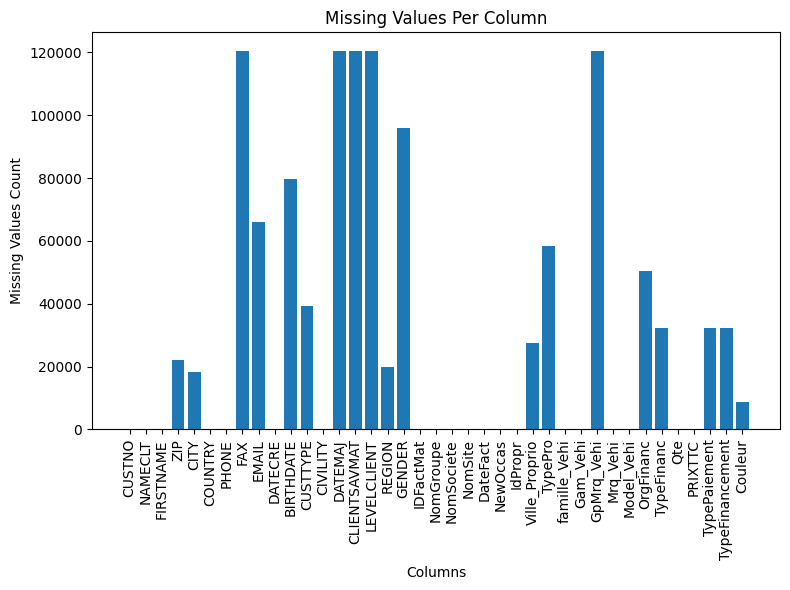

In [307]:
plt.figure(figsize=(8,6))
missVal=mv
plt.bar(missVal.index,missVal.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [206]:
mean_mv=merged_df.isnull().mean()*100
mean_mv

CUSTNO               0.000000
NAMECLT              0.000000
FIRSTNAME            0.000000
ZIP                 18.313053
CITY                15.187508
COUNTRY              0.000000
PHONE                0.000000
FAX                100.000000
EMAIL               54.896798
DATECRE              0.016612
BIRTHDATE           66.202915
CUSTTYPE            32.679929
CIVILITY             0.000000
DATEMAJ            100.000000
CLIENTSAVMAT       100.000000
LEVELCLIENT        100.000000
REGION              16.458325
GENDER              79.754973
IDFactMat            0.000000
NomGroupe            0.000000
NomSociete           0.000000
NomSite              0.000000
DateFact             0.000000
NewOccas             0.000000
IdPropr              0.000000
Ville_Proprio       22.960256
TypePro             48.384069
famille_Vehi         0.013290
Gam_Vehi             0.013290
GpMrq_Vehi         100.000000
Mrq_Vehi             0.000000
Model_Vehi           0.000000
OrgFinanc           41.848914
TypeFinanc

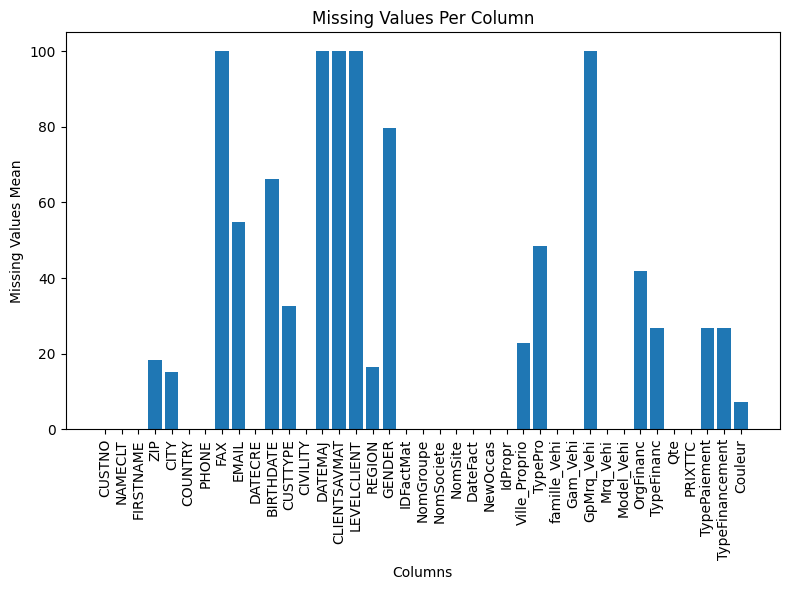

In [207]:
plt.figure(figsize=(8,6))
missValM=mean_mv
plt.bar(missValM.index,missValM.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Mean')
plt.title('Missing Values Per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [308]:
cols_to_drop=['FAX','DATEMAJ','LEVELCLIENT','CLIENTSAVMAT','EMAIL','CUSTTYPE','BIRTHDATE','GpMrq_Vehi']
merged_df.drop(columns=cols_to_drop, inplace=True)

In [309]:
merged_df.head(2)

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,TypeFinanc,Qte,PRIXTTC,TypePaiement,TypeFinancement,Couleur
0,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""
1,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,COMPTANT,1,340000.008,COMPTANT,COMPTANT,"White pearl ""W54"""


In [311]:
print("Total records (rows) in the dataset after dropping mv columns : {}".format(merged_df.shape[0]))
print("Total records (features) in the dataset after dropping mv columns:{}".format(merged_df.shape[1]))

Total records (rows) in the dataset after dropping mv columns : 120395
Total records (features) in the dataset after dropping mv columns:31


# DUPLICATIONS

In [211]:
merged_df.duplicated().sum()

0

# GENDER IMPUTATION

In [212]:
#merged_df['GENDER'].value_counts()

GENDER
Male      17189
Female     7185
Name: count, dtype: int64

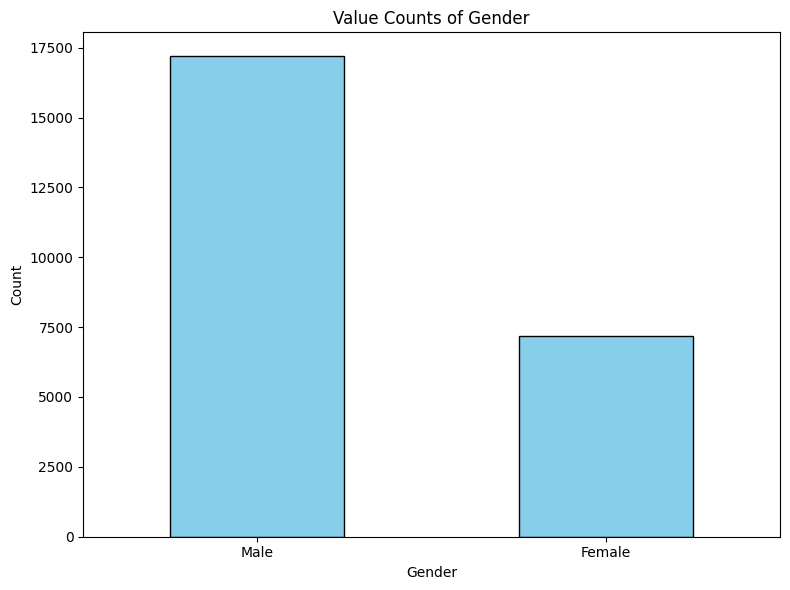

In [213]:
'''plt.figure(figsize=(8, 6))
merged_df['GENDER'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Value Counts of Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()'''

In [214]:
'''gender_percentage = merged_df['GENDER'].value_counts(normalize=True) * 100

print(gender_percentage)'''

GENDER
Male      70.521868
Female    29.478132
Name: proportion, dtype: float64


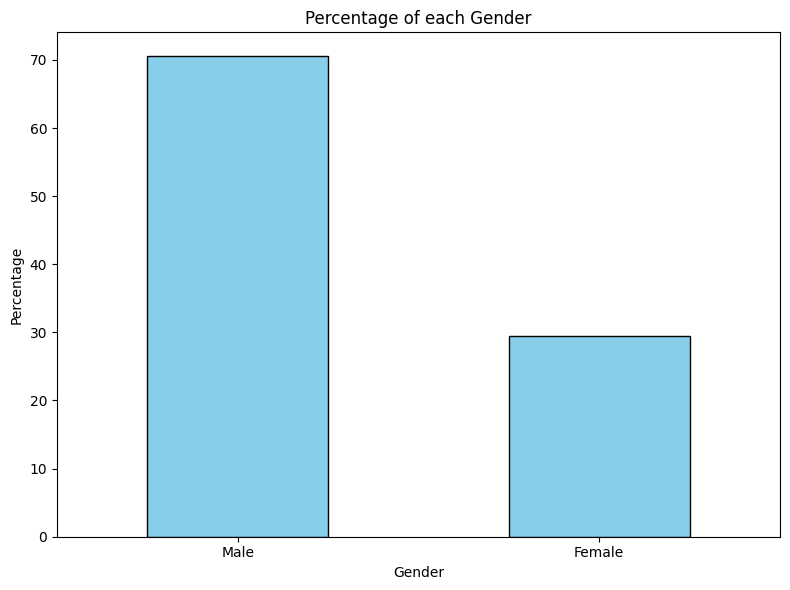

In [215]:
'''plt.figure(figsize=(8, 6))
gender_percentage.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of each Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()'''

In [216]:
'''merged_df['GENDER'].fillna('Unknown', inplace=True)
merged_df['GENDER']'''

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
           ...   
120390       Male
120391    Unknown
120392    Unknown
120393    Unknown
120394    Unknown
Name: GENDER, Length: 120395, dtype: object

In [217]:
#gender_percentage1 = merged_df['GENDER'].value_counts(normalize=True) * 100

#print(gender_percentage1)

GENDER
Unknown    79.754973
Male       14.277171
Female      5.967856
Name: proportion, dtype: float64


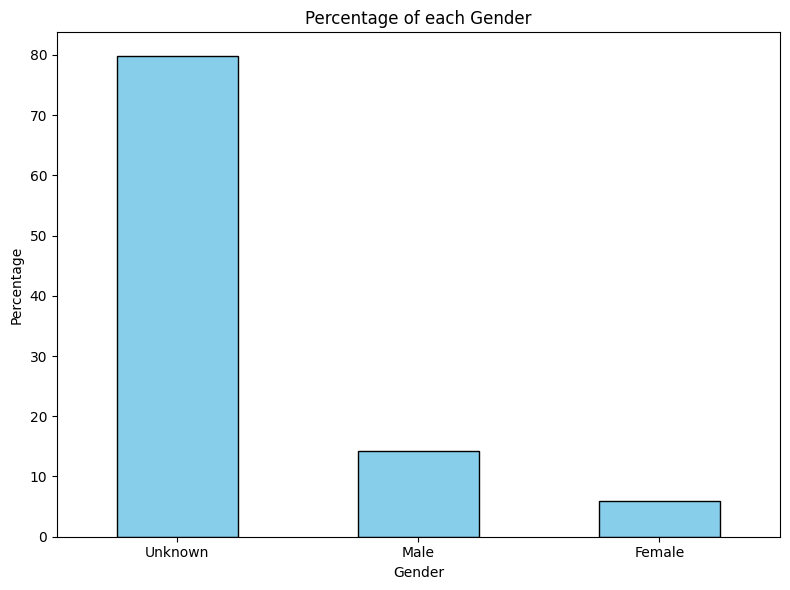

In [218]:
'''plt.figure(figsize=(8, 6))
gender_percentage1.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.title('Percentage of each Gender')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()'''

In [219]:
#merged_df['GENDER'].isnull().sum()

0

In [220]:
#merged_df.drop('TypePaiement',axis=1,inplace=True)

In [221]:
#merged_df.drop('TypeFinanc',axis=1,inplace=True)
#merged_df

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,TypePro,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur
0,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,NaN,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54"""
1,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,NaN,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54"""
2,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,NaN,VUL,PICK UP,MITSUBISHI,L200,COMPTANT,1,294999.996,COMPTANT,"White pearl ""W54"""
3,40000455,Rogers,Alejandro,60300,BERKANE,Maroc,243.927.8042x79028,2016-02-24,STE,l'Oriental,...,NaN,VP,CITADINES,FORD,FIESTA,WAFASALAF,1,164000.004,Crédit Classique,CHROME COPPER
4,12015740,Anderson,Robert,NaN,NaN,Maroc,+1-345-638-1141,2016-02-24,.,NaN,...,NaN,VP,SUV (4x4),OPEL,CROSSLAND X,NaN,1,229000.008,COMPTANT,Blanc glacier GAZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120390,32005024,Tucker,Eric,70000,LAAYOUNE,Maroc,+1-952-331-7118x34278,2012-08-29,MR,Laayoune- Boujdour - Sakia AlHamra,...,NaN,VUL,MINI PICK UP,DFSK,K01,SOFAC,1,89000.004,Crédit Classique,NaN
120391,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,NaN,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,190700.000,Crédit Classique,Titanium Gray
120392,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,NaN,Poids lourds FUSO,14T à 15T,MITSUBISHI FUSO,FK,CONVENTION,1,495000.000,Crédit Classique,Z2835 - Blanc Mitsubishi
120393,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,NaN,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,204000.000,Crédit Classique,Titanium Gray


In [222]:
# Calculate the percentage of missing values for each column
#missing_values_percentage = (merged_df.isnull().sum() / len(merged_df)) * 100
#missing_values_percentage

CUSTNO              0.000000
NAMECLT             0.000000
FIRSTNAME           0.000000
ZIP                18.313053
CITY               15.187508
COUNTRY             0.000000
PHONE               0.000000
DATECRE             0.016612
CIVILITY            0.000000
REGION             16.458325
GENDER              0.000000
IDFactMat           0.000000
NomGroupe           0.000000
NomSociete          0.000000
NomSite             0.000000
DateFact            0.000000
NewOccas            0.000000
IdPropr             0.000000
Ville_Proprio      22.960256
TypePro            48.384069
famille_Vehi        0.013290
Gam_Vehi            0.013290
Mrq_Vehi            0.000000
Model_Vehi          0.000000
OrgFinanc          41.848914
Qte                 0.000000
PRIXTTC             0.000000
TypeFinancement    26.702106
Couleur             7.112422
dtype: float64

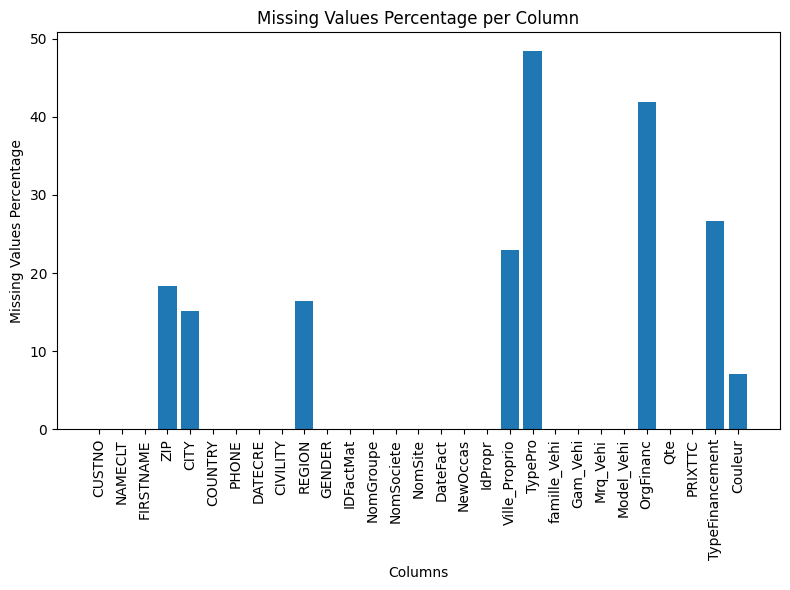

In [223]:
# Plot the missing values percentage
'''plt.figure(figsize=(8, 6))
plt.bar(missing_values_percentage.index, missing_values_percentage.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Percentage')
plt.title('Missing Values Percentage per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()'''

In [312]:
print("Total records (rows) in the dataset after dropping Missing Values columns with a high %  : {}".format(merged_df.shape[0]))
print("Total records (features) in the dataset after dropping Missing Values columns with a high % : {}".format(merged_df.shape[1]))

Total records (rows) in the dataset after dropping Missing Values columns with a high %  : 120395
Total records (features) in the dataset after dropping Missing Values columns with a high % : 31


In [313]:
mvp = (merged_df.isnull().sum() / len(merged_df)) * 100
mvp

CUSTNO              0.000000
NAMECLT             0.000000
FIRSTNAME           0.000000
ZIP                18.313053
CITY               15.187508
COUNTRY             0.000000
PHONE               0.000000
DATECRE             0.016612
CIVILITY            0.000000
REGION             16.458325
GENDER             79.754973
IDFactMat           0.000000
NomGroupe           0.000000
NomSociete          0.000000
NomSite             0.000000
DateFact            0.000000
NewOccas            0.000000
IdPropr             0.000000
Ville_Proprio      22.960256
TypePro            48.384069
famille_Vehi        0.013290
Gam_Vehi            0.013290
Mrq_Vehi            0.000000
Model_Vehi          0.000000
OrgFinanc          41.848914
TypeFinanc         26.702106
Qte                 0.000000
PRIXTTC             0.000000
TypePaiement       26.702106
TypeFinancement    26.702106
Couleur             7.112422
dtype: float64

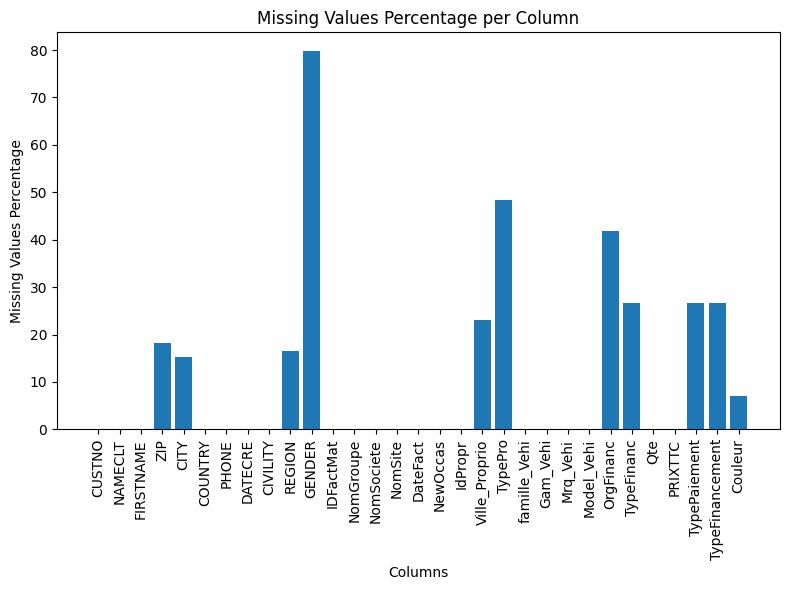

In [314]:
plt.figure(figsize=(8, 6))
plt.bar(mvp.index, mvp.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Percentage')
plt.title('Missing Values Percentage per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# CIVILITY EXPLORATORY

In [225]:
civility_count=merged_df['CIVILITY'].value_counts()
civility_count

CIVILITY
STE                          69330
MR                           17189
Particulier                  11805
MME                           6878
SociÃ©tÃ©                     5425
.                             4875
SARL                          1666
SociÃ©tÃ©s de crÃ©dit         1322
SA                             726
MLLE                           307
SociÃ©tÃ©s de Leasing          200
ADMINISTRATION                 193
SociÃ©tÃ©s de Location         120
ETS                             70
COMMUNE                         53
SociÃ©tÃ©s PrivÃ©es             38
ASSOCIA.                        30
LOC VOITURE                     28
COOPERATIVE                     28
MRS                             23
MR&MME                          18
ASSOCIATION                     12
DOCTEUR                         10
ENTREPRISE                       9
Personnel de la SociÃ©tÃ©        4
COMMUNE URBAINE                  4
E/SE                             3
GGE                              3
AUTRE      

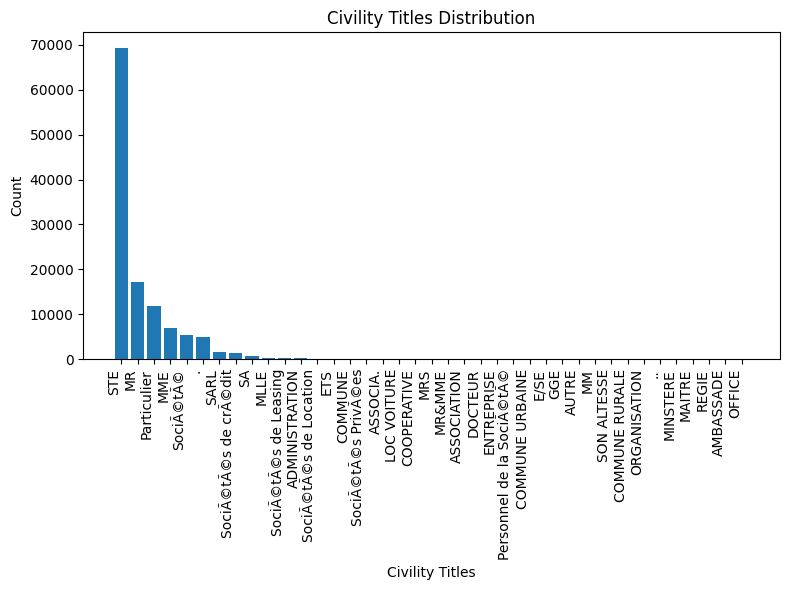

In [226]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(civility_count.index, civility_count.values)
plt.xlabel('Civility Titles')
plt.ylabel('Count')
plt.title('Civility Titles Distribution')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [227]:
grouped_data = merged_df.groupby('CUSTNO')[['CIVILITY', 'TypePro']].first()
grouped_data

,CIVILITY,TypePro
CUSTNO,,
1000016,STE,Sociétés Privées
1000036,MR,Particuliers
1000081,STE,Sociétés Privées
1000265,STE,Sociétés de Leasing
1000327,.,Particuliers
...,...,...
89000137,MR,None
89000138,MME,None
89000144,MME,None


In [228]:
civility_category_mapping = {
    "Individual": ["MR", "MME","Individual","Particulier", "MLLE", "MRS", "DOCTEUR", "MR&MME", "MM", "PHARMACIE", "MAITRE", "PHARMACIEN", "PROFESSEUR", "Particuliers"],
    "Companies and Organizations": ["STE","SARL","Companies and Organizations", "SociÃ©tÃ©", "GGE", "ETS", "SA", "COMMUNE", "LOC VOITURE", "ASSOCIA.", "COOPERATIVE", "ADMINISTRATION", "COMMUNE RURALE",
                                   "ASSOCIATION", "MINISTERE", "OFFICE", "COMMUNE URBAINE", "ESE", "E/SE", "MINSTERE", "ENTREPRISE", "AMBASSADE", "REGIE", "ORGANISATION",
                                   "M/BAIL P/C DE", "TRSP TOURIST", "SON ALTESSE", "SociÃ©tÃ©s de crÃ©dit", "SociÃ©tÃ©s PrivÃ©es", "Personnel de la SociÃ©tÃ©", "SALAFIN P/C DE",
                                   "Assurances", "SOGELEASE P/C", "SociÃ©tÃ©s de Leasing", "SociÃ©tÃ©s de Location", "W.BAIL P/C DE"],
    "Other Categories": ["AUTRE", ".", ".."]
}

def categorize_civility(civility):
    for category, civilities in civility_category_mapping.items():
        if civility in civilities:
            return category
    return "Other Categories"
merged_df['CIVILITY_GROUP'] = merged_df['CIVILITY'].apply(categorize_civility)

In [229]:

ind = [1000327,1001561,1014472,5001933,1009994,3000069,3005062,8001554,8001554,34002173,34002226,34002271,34002283,34002290,34002321,34002416]  # List of individual customer IDs
soc = [1001826,1002823,1004183,10299310,3000076,3000336,3000611,3001681,8000178,8000237,8000969,8001363,8001373,8001564,8001566,8001567,8001668,8001967,8002902,8002947,8003005,8003009,10000007,10000011,10000074,12000241,12002373,12002814,12002887,12003174,12003212,12003734,120026596,19001957,19001978,25000379,26000037,34002444]  # List of company/organization customer IDs

# Loop through the DataFrame to replace civility values
for customer_id in ind:
    mask = (merged_df['CUSTNO'] == customer_id) & (merged_df['CIVILITY'] == '.')
    merged_df.loc[mask, 'CIVILITY'] = 'Individual'

for customer_id in soc:
    mask = (merged_df['CUSTNO'] == customer_id) & (merged_df['CIVILITY'] == '.')
    merged_df.loc[mask, 'CIVILITY'] = 'Companies and Organizations'


In [230]:
merged_df.loc[merged_df['CUSTNO']==12002887]

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur,CIVILITY_GROUP
70424,12002887,Andrews,Adam,20000,CASABLANCA,Maroc,+1-526-372-8916x24360,2005-10-03,Companies and Organizations,Grand Casablanca,...,VUL,VAN,FORD,TRANSIT,NaN,1,250449.996,NaN,BLANC,Other Categories


In [231]:
merged_df

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur,CIVILITY_GROUP
0,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations
1,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations
2,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VUL,PICK UP,MITSUBISHI,L200,COMPTANT,1,294999.996,COMPTANT,"White pearl ""W54""",Companies and Organizations
3,40000455,Rogers,Alejandro,60300,BERKANE,Maroc,243.927.8042x79028,2016-02-24,STE,l'Oriental,...,VP,CITADINES,FORD,FIESTA,WAFASALAF,1,164000.004,Crédit Classique,CHROME COPPER,Companies and Organizations
4,12015740,Anderson,Robert,NaN,NaN,Maroc,+1-345-638-1141,2016-02-24,.,NaN,...,VP,SUV (4x4),OPEL,CROSSLAND X,NaN,1,229000.008,COMPTANT,Blanc glacier GAZ,Other Categories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120390,32005024,Tucker,Eric,70000,LAAYOUNE,Maroc,+1-952-331-7118x34278,2012-08-29,MR,Laayoune- Boujdour - Sakia AlHamra,...,VUL,MINI PICK UP,DFSK,K01,SOFAC,1,89000.004,Crédit Classique,NaN,Individual
120391,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,190700.000,Crédit Classique,Titanium Gray,Companies and Organizations
120392,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,Poids lourds FUSO,14T à 15T,MITSUBISHI FUSO,FK,CONVENTION,1,495000.000,Crédit Classique,Z2835 - Blanc Mitsubishi,Companies and Organizations
120393,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,204000.000,Crédit Classique,Titanium Gray,Companies and Organizations


In [232]:
merged_df.loc[merged_df['CIVILITY_GROUP']=='Individual']

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur,CIVILITY_GROUP
5,52000833,Edwards,Curtis,NaN,NaN,Maroc,+1-664-716-4716,2016-02-25,MR,NaN,...,VP,CITADINES,OPEL,ASTRA,NaN,1,144999.996,NaN,NaN,Individual
6,52000842,Taylor,Caleb,20001,CASA,Maroc,(557)322-2952,2016-02-26,MME,Sous - Massa - Draa,...,VP,SUV (4x4),NISSAN,NEW QASHQAI MC,NaN,1,279000.000,COMPTANT,Gris Squale,Individual
7,15007656,Berry,Daniel,14000,SIDI SLIMANE,Maroc,001-710-980-5819x2444,2016-02-26,MR,Gharb - Chrarda - Beni Hssen,...,VP,SUV (4x4),NISSAN,NEW QASHQAI MC,WAFASALAF,1,234000.000,Crédit Classique,Noir Diamant,Individual
8,38008747,Dudley,Alicia,NaN,INEZGANE,MA-MAROC,+1-496-318-5033,2021-06-08,Particulier,Sous - Massa - Draa,...,VP,CITADINES,FORD,FIESTA,NaN,1,189000.000,COMPTANT,NOIR,Individual
9,20006690,Brown,Tamara,60000,OUJDA,MA-MAROC,238.838.3496x389,2021-06-08,Particulier,l'Oriental,...,VP,CITADINES,OPEL,NEW CORSA,NaN,1,167000.000,COMPTANT,Blanc Jade G2O,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120380,1032622,Smith,Jeremy,NaN,NaN,Maroc,521.206.6786,2012-08-24,MR,NaN,...,Poids lourds FUSO,14T à 15T,MITSUBISHI FUSO,FK,124,1,492999.996,Crédit Classique,Z2835 - Blanc Mitsubishi,Individual
120381,27001280,Johnson,Kevin,40000,MARRAKECH PRINCIPALE,Maroc,3328473540,2012-08-24,MR,Marrakech - Tensift - Al Haouz,...,VP,SUV (4x4),NISSAN,NEW QASHQAI MC,NaN,1,225695.004,NaN,Blanc Trois couches,Individual
120382,26000762,Bailey,Alexander,NaN,NaN,Maroc,492-949-5299x50134,2012-08-24,MR,NaN,...,VUL,PICK UP,MITSUBISHI,L200,COMPTANT,1,190695.000,COMPTANT,Grayish Brown Metallic -C06 -,Individual
120389,27001286,Mann,Jessica,26000,SETTAT,Maroc,(383)629-7055,2012-08-29,MR,Chaouia - Ourdigha,...,VP,COMPACTE,OPEL,NEW ASTRA,NaN,1,228999.996,COMPTANT,Hot red,Individual


In [233]:
merged_df.loc[merged_df['CIVILITY_GROUP']=='Other Categories']

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur,CIVILITY_GROUP
4,12015740,Anderson,Robert,NaN,NaN,Maroc,+1-345-638-1141,2016-02-24,.,NaN,...,VP,SUV (4x4),OPEL,CROSSLAND X,NaN,1,229000.008,COMPTANT,Blanc glacier GAZ,Other Categories
21,52012568,Mann,Christopher,NaN,NaN,MA-MAROC,690.468.9604x12355,2021-06-09,.,NaN,...,VUL,MINI PICK UP,DFSK,K01,NaN,1,90000.000,COMPTANT,GRIS,Other Categories
30,71001422,Curry,Daniel,NaN,NaN,MA-MAROC,815.867.0843x13245,2021-06-09,.,NaN,...,VP,COMPACTE,FORD,FOCUS IV,NaN,1,236495.004,NaN,NOIR,Other Categories
38,41001528,Le,Danielle,50000,MEKNES,MA-MAROC,898.315.6234,2021-06-09,.,MeknÃ¨s - Tafilalet,...,VP,SUV (4x4),NISSAN,NEW QASHQAI MC,NaN,1,244373.004,COMPTANT,Noir Diamant,Other Categories
67,23009053,Drake,Jerry,41050,IMINTANOUTE,MA-MAROC,508-400-0602,2021-06-10,.,Marrakech - Tensift - Al Haouz,...,VP,CITADINES,FORD,FIESTA,SOFAC,1,127595.000,Crédit,GRIS ONYX,Other Categories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120373,8002826,Vega,Marcus,20190,CASABLANCA 20190 MAROC,Maroc,001-762-633-9700,2012-08-22,.,Grand Casablanca,...,Equipements industriels,Groupes électrogènes,CUMMINS POWER GENERATION,C150-D5,NaN,1,186002.556,NaN,NaN,Other Categories
120374,8002826,Vega,Marcus,20190,CASABLANCA 20190 MAROC,Maroc,001-762-633-9700,2012-08-22,.,Grand Casablanca,...,Equipements industriels,Groupes électrogènes,CUMMINS POWER GENERATION,C110-D5,NaN,1,145339.728,NaN,NaN,Other Categories
120375,8002826,Vega,Marcus,20190,CASABLANCA 20190 MAROC,Maroc,001-762-633-9700,2012-08-22,.,Grand Casablanca,...,Equipements industriels,Groupes électrogènes,CUMMINS POWER GENERATION,C250D5,NaN,1,284873.808,NaN,NaN,Other Categories
120376,8002826,Vega,Marcus,20190,CASABLANCA 20190 MAROC,Maroc,001-762-633-9700,2012-08-22,.,Grand Casablanca,...,Equipements industriels,Groupes électrogènes,CUMMINS POWER GENERATION,C250D5,NaN,1,284873.808,NaN,NaN,Other Categories


In [234]:
merged_df.loc[merged_df['CIVILITY_GROUP']=='Companies and Organizations']

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur,CIVILITY_GROUP
0,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations
1,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations
2,31000822,Reid,Gregory,45122,OUARZAZATE,Maroc,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VUL,PICK UP,MITSUBISHI,L200,COMPTANT,1,294999.996,COMPTANT,"White pearl ""W54""",Companies and Organizations
3,40000455,Rogers,Alejandro,60300,BERKANE,Maroc,243.927.8042x79028,2016-02-24,STE,l'Oriental,...,VP,CITADINES,FORD,FIESTA,WAFASALAF,1,164000.004,Crédit Classique,CHROME COPPER,Companies and Organizations
13,1045916,Morrison,Shawn,20000,CASABLANCA,MA-MAROC,952.903.7044,2021-06-09,SociÃ©tÃ©,Grand Casablanca,...,VP,CITADINES,FORD,FIESTA,SOFAC,1,157999.992,Crédit,GRIS ARGENT,Companies and Organizations
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120388,12007860,Jackson,Joel,12050,SKHIRATE,Maroc,334.958.6374,2012-08-28,STE,Rabat - SalÃ© - Zemmour - Zaer,...,VUL,PICK UP,MITSUBISHI,L200,VIVALIS,1,191694.996,Crédit Classique,Earth Green Metallic -F27-,Companies and Organizations
120391,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,190700.000,Crédit Classique,Titanium Gray,Companies and Organizations
120392,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,Poids lourds FUSO,14T à 15T,MITSUBISHI FUSO,FK,CONVENTION,1,495000.000,Crédit Classique,Z2835 - Blanc Mitsubishi,Companies and Organizations
120393,26000776,Miller,Warren,46000,SAFI,Maroc,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,204000.000,Crédit Classique,Titanium Gray,Companies and Organizations


In [235]:
civility_counts=merged_df['CIVILITY_GROUP'].value_counts()
civility_counts

CIVILITY_GROUP
Companies and Organizations    79279
Individual                     36235
Other Categories                4881
Name: count, dtype: int64

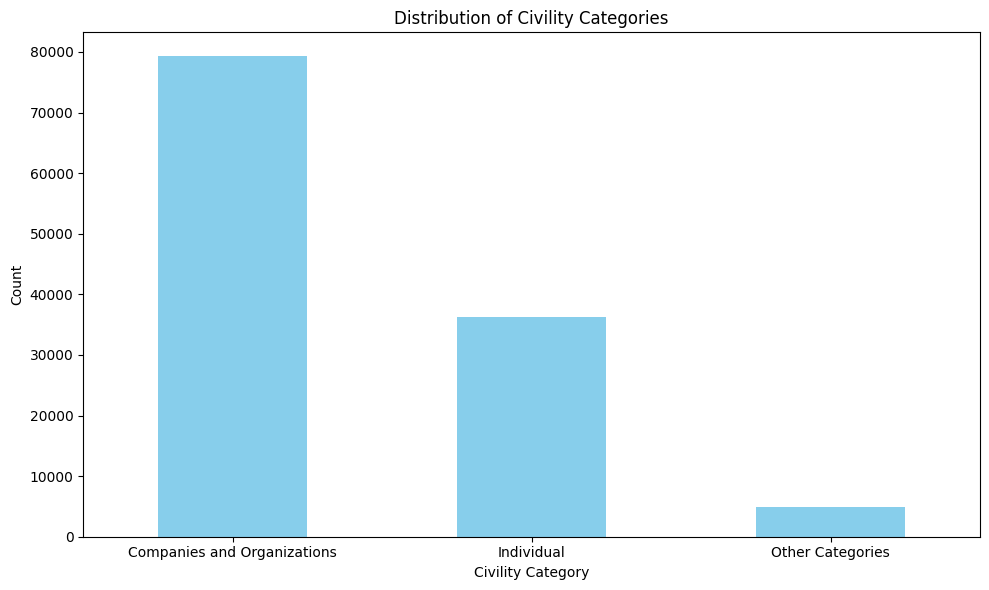

In [236]:
plt.figure(figsize=(10, 6))
civility_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Civility Categories')
plt.xlabel('Civility Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [237]:
total_rows = len(merged_df)
civility_percentages = (civility_counts / total_rows) * 100
civility_percentages

CIVILITY_GROUP
Companies and Organizations    65.849080
Individual                     30.096765
Other Categories                4.054155
Name: count, dtype: float64

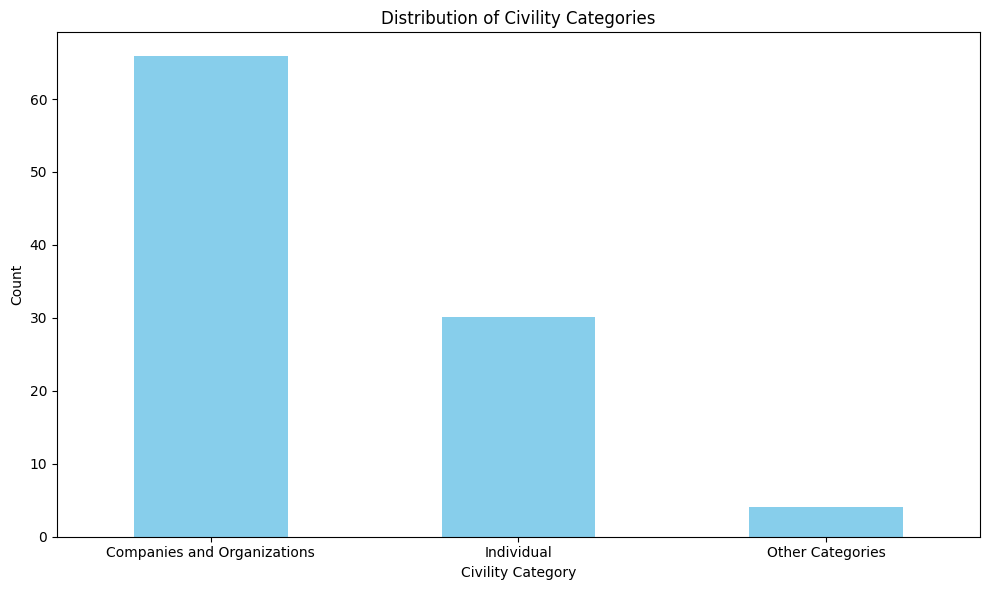

In [238]:
plt.figure(figsize=(10, 6))
civility_percentages.plot(kind='bar', color='skyblue')
plt.title('Distribution of Civility Categories')
plt.xlabel('Civility Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [239]:
merged_df.drop('TypePro',axis=1,inplace=True)

# COUNTRY EXPLORATORY

In [240]:
count_country=merged_df['COUNTRY'].value_counts()
count_country

COUNTRY
Maroc                          76647
MA-MAROC                       43523
AT-AUTRICHE                      107
France                            75
FR-FRANCE                         23
MAROC                              4
US-UNITED STATES OF AMERICA        3
GB-UNITED KINGDOM                  3
AE-UNITED ARAB EMIRATES            2
DE-ALLEMAGNE                       1
Netherlands                        1
UNITED ARAB EMIRATES               1
NL-NETHERLANDS                     1
SUISSE                             1
NG-NIGERIA                         1
ES-ESPAGNE                         1
Nederland                          1
Name: count, dtype: int64

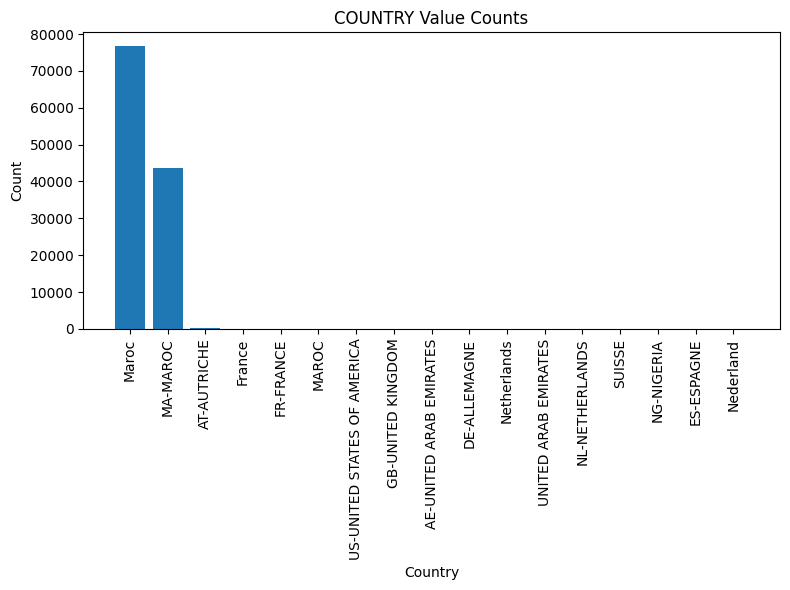

In [241]:
# Plot the value counts as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(count_country.index, count_country.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('COUNTRY Value Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [242]:
total_rows = len(merged_df)

# Calculate the percentage of each country
country_percentagess = (count_country / total_rows) * 100
country_percentagess

COUNTRY
Maroc                          63.662943
MA-MAROC                       36.150172
AT-AUTRICHE                     0.088874
France                          0.062295
FR-FRANCE                       0.019104
MAROC                           0.003322
US-UNITED STATES OF AMERICA     0.002492
GB-UNITED KINGDOM               0.002492
AE-UNITED ARAB EMIRATES         0.001661
DE-ALLEMAGNE                    0.000831
Netherlands                     0.000831
UNITED ARAB EMIRATES            0.000831
NL-NETHERLANDS                  0.000831
SUISSE                          0.000831
NG-NIGERIA                      0.000831
ES-ESPAGNE                      0.000831
Nederland                       0.000831
Name: count, dtype: float64

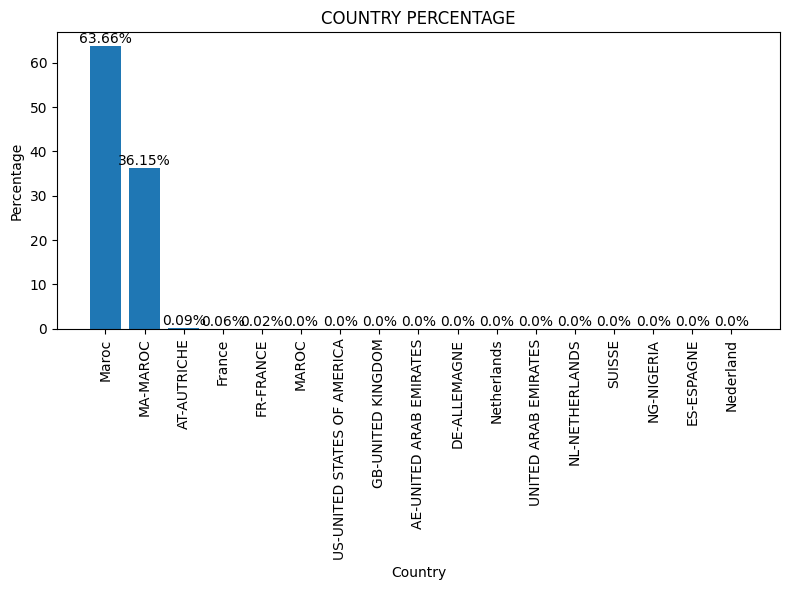

In [319]:
plt.figure(figsize=(8, 6))
bars = plt.bar(country_percentagess.index, country_percentagess.values)

plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('COUNTRY PERCENTAGE')
plt.xticks(rotation=90)
plt.tight_layout()

# Adding rounded percentage values on top of the bars
for bar in bars:
    yval = bar.get_height()
    rounded_percentage = round(yval, 2)  # Round to 2 decimal places
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{rounded_percentage}%', ha='center', va='bottom')

plt.show()

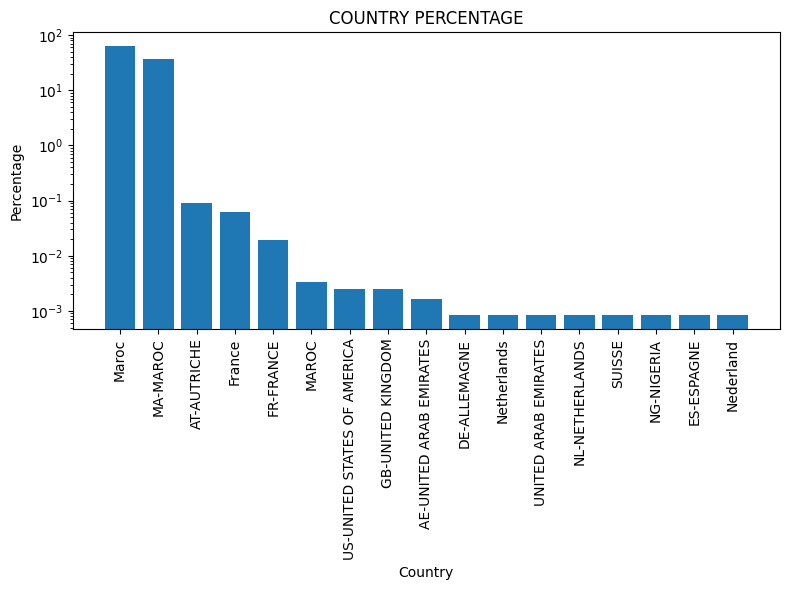

In [244]:
plt.figure(figsize=(8, 6))
plt.bar(country_percentagess.index, country_percentagess.values)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('COUNTRY PERCENTAGE')
plt.xticks(rotation=90)
plt.yscale('log')  # Utilisation de l'échelle logarithmique sur l'axe des y
plt.tight_layout()
plt.show()

In [245]:
def replace_country_names(COUNTRY):
    
    if COUNTRY=='MA-MAROC' or COUNTRY=='Maroc':
        return 'MAROC'
    elif COUNTRY=='FR-FRANCE' or COUNTRY=='France':
        return 'FRANCE'
    elif COUNTRY=='Espagne' or COUNTRY=='ES-ESPAGNE' :
        return 'ESPAGNE'
    elif COUNTRY=='Italie' or COUNTRY=='IT-ITALIE' or COUNTRY=='ITALIA' :
        return 'ITALIE'
    elif COUNTRY=='Belgique'  :
        return 'BELGIQUE'
    elif COUNTRY=='Nederland' or COUNTRY=='NL-NETHERLANDS' or COUNTRY=='Netherlands' or COUNTRY=='Pays-Bas' :
        return 'NETHERLANDS'
    elif COUNTRY=='Allemagne' or COUNTRY=='DE-ALLEMAGNE'  :
        return 'ALLEMAGNE'

    elif COUNTRY=='Angleterre' or COUNTRY=='GB-Angleterre' :
        return 'ANGLETERRE'  
    elif COUNTRY=='Portugal' or COUNTRY=='PT-PORTUGAL' :
        return 'PORTUGAL'
    elif COUNTRY=='Suisse' or COUNTRY=='CH-SUISSE' :
        return 'SUISSE'
    elif COUNTRY=='United States of America' or COUNTRY=='IS-UNITED STATES OF AMERICA' or COUNTRY=="Etats Unis d'Amerique":
        return 'UNITED STATES OF AMERICA'
    elif COUNTRY=='United Kingdom' or COUNTRY=='GB-UNITED KINGDOM' or COUNTRY=='GRANDE BRETAGNE' :
        return 'UNITED KINGDOM'
    elif COUNTRY=='Mauritanie' or COUNTRY=='MR-MAURITANIE' :
        return 'MAURITANIE'
    elif COUNTRY=='United Arab Emirates' or COUNTRY=='AE-UNITED ARAB EMIRATES' :
        return 'UNITED ARAB EMIRATES'
    elif COUNTRY=='Japon' or COUNTRY=='JP-JAPON' :
        return 'JAPON'
    elif COUNTRY=='Nigeria' or COUNTRY=='NG-NIGERIA' :
        return 'NIGERIA'  
    elif COUNTRY=='Turquie' or COUNTRY=='TR-TURQUIE' :
        return 'TURQUIE' 
    elif COUNTRY=='Russia' or COUNTRY=='RU-RUSSIA' :
        return 'NIGERIA' 
    elif COUNTRY=='Autriche' or COUNTRY=='AT-AUTRICHE' :
        return 'AUTRICHE' 
    elif COUNTRY=='GuinÃ©e'  :
        return 'GUINEA' 
    elif COUNTRY=='Chine'  :
        return 'CHINE' 
    elif COUNTRY=='Libye'  :
        return 'LIBYE' 
    elif COUNTRY=='Ceuta'  :
        return 'CEUTA' 
    elif COUNTRY=='Andorra'  :
        return 'ANDORRA'      
    elif COUNTRY=='Danemark'  :
        return 'DANEMARK'   
    elif COUNTRY=='Norvege'  :
        return 'NOREVEGE'   
    elif COUNTRY=='Arabie Saoudite'  :
        return 'ARABIE SAOUDITE'
    elif COUNTRY=='Senegal'  :
        return 'SENEGAL' 
    elif COUNTRY=='Suede'  :
        return 'SUEDE' 
    else :
        return COUNTRY

merged_df['COUNTRY'] = merged_df['COUNTRY'].apply(replace_country_names)


In [246]:
c=merged_df['COUNTRY'].value_counts()
c

COUNTRY
MAROC                          120174
AUTRICHE                          107
FRANCE                             98
NETHERLANDS                         3
UNITED ARAB EMIRATES                3
UNITED KINGDOM                      3
US-UNITED STATES OF AMERICA         3
ESPAGNE                             1
NIGERIA                             1
SUISSE                              1
ALLEMAGNE                           1
Name: count, dtype: int64

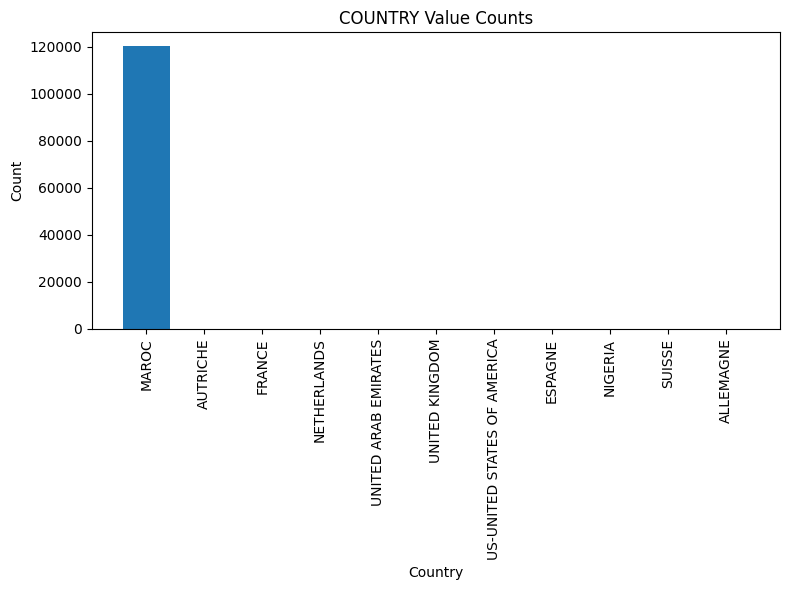

In [247]:
plt.figure(figsize=(8, 6))
plt.bar(c.index, c.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('COUNTRY Value Counts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [248]:
# Calculate the total number of rows in the DataFrame
total_rows = len(merged_df)

# Calculate the percentage of each country
country_percentages = (c / total_rows) * 100
country_percentages

COUNTRY
MAROC                          99.816438
AUTRICHE                        0.088874
FRANCE                          0.081399
NETHERLANDS                     0.002492
UNITED ARAB EMIRATES            0.002492
UNITED KINGDOM                  0.002492
US-UNITED STATES OF AMERICA     0.002492
ESPAGNE                         0.000831
NIGERIA                         0.000831
SUISSE                          0.000831
ALLEMAGNE                       0.000831
Name: count, dtype: float64

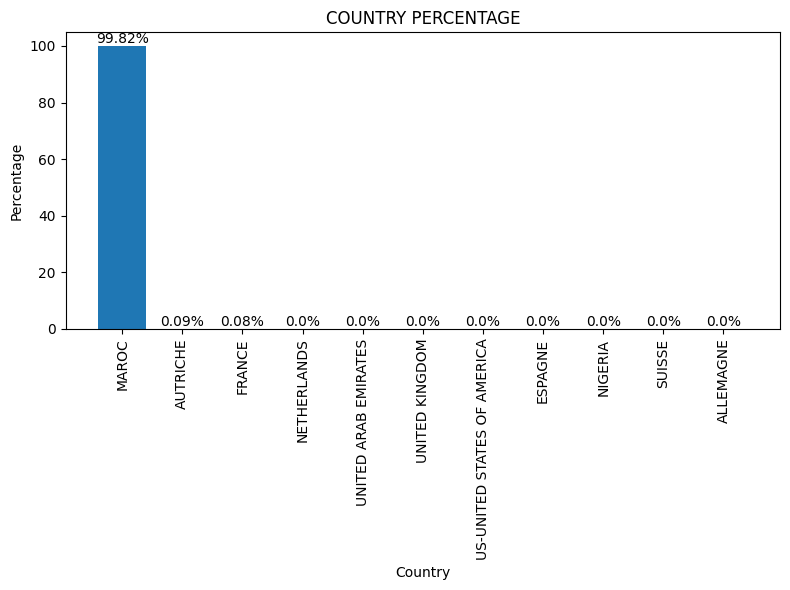

In [317]:
plt.figure(figsize=(8, 6))
bars = plt.bar(country_percentages.index, country_percentages.values)

plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('COUNTRY PERCENTAGE')
plt.xticks(rotation=90)
plt.tight_layout()

# Adding rounded percentage values on top of the bars
for bar in bars:
    yval = bar.get_height()
    rounded_percentage = round(yval, 2)  # Round to 2 decimal places
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{rounded_percentage}%', ha='center', va='bottom')

plt.show()

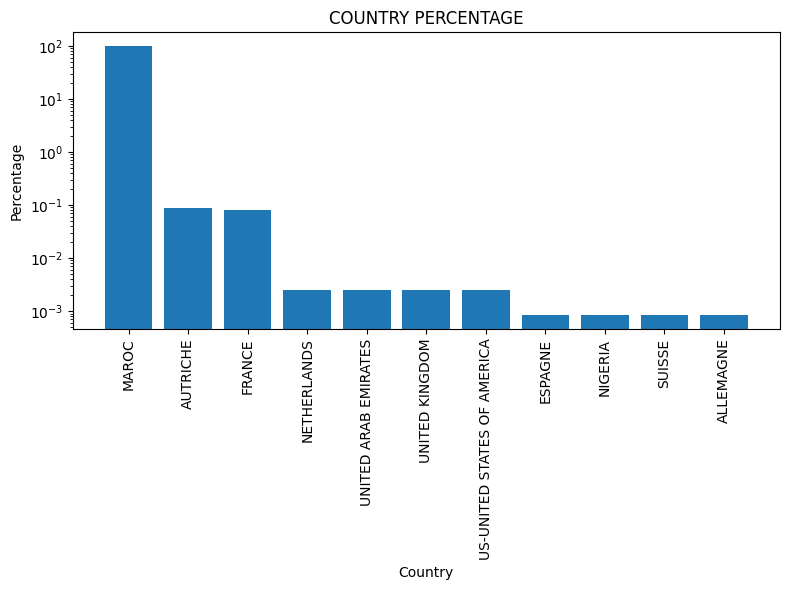

In [250]:
plt.figure(figsize=(8, 6))
plt.bar(country_percentages.index, country_percentages.values)
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('COUNTRY PERCENTAGE')
plt.xticks(rotation=90)
plt.yscale('log')  # Utilisation de l'échelle logarithmique sur l'axe des y
plt.tight_layout()
plt.show()

# CITIES EXPLORATORY

In [251]:
vc=merged_df['CITY'].value_counts()
vc

CITY
CASABLANCA               59261
CASABLANCA PRINCIPALE     7521
RABAT                     3361
MARRAKECH                 2244
FES                       1967
                         ...  
SIDI YAHYA DU RAGHB          1
JEMAA MOUL BLAD              1
SIDI MOUSSA                  1
TAMSENA                      1
ZAIOU                        1
Name: count, Length: 784, dtype: int64

In [252]:
def replace_city_names1(CITY):
    
    # Making Gender as Male and Female as standards
    if CITY=='AIN SEBAA' or CITY=='20000SA' or CITY=='Dar Bouazza' or CITY=='BOUSEKOURA' or CITY=='LA VILETTE CASABLANCA' or CITY=='CASA BLANCA 'or CITY== ' CASA' or CITY=='ROCHE NOIR' or CITY=='BD DE LA RESISTANCE' or CITY=='CALIFORNIA' or CITY=='BOURGOGNE' or CITY==' DAR BOUAZZA CASABLANCA' or CITY=='NOUACEUR CASA ' or CITY=='CASA ' or CITY==200000 or CITY=='125 CASA SIDI BERNOUSSI' or CITY=='HAY BERNOUSSI CASABLANCA' or CITY=='CASABIANCA' or CITY=='CACABLANCA' or CITY=='BEAUSEJOUR .  CASABLANCA' or CITY=='CASABLA?CA' or CITY=='MERS SULTAN' or CITY=='NOUACCEUR' or CITY=='ASPHODELES CASA' or CITY==' 20270 CASABLANCA' or CITY==20300 or CITY=='casablanca ' or CITY=='APT  NÂ° 9  CASABLANCA' or CITY=='casablanca ' or CITY==5199 or CITY=='CASABLNCA ' or CITY=='BELVEDERE' or CITY==20000 or CITY=='ASABLANCA' or CITY=='LISSASFA LOT NASSIM' or CITY=='NOUACEUR - CASABLANCA' or CITY=='NOUACER' or CITY==' CASABLANCA' or CITY==' CASABLANCA' or CITY==' CASABLANCA' or CITY=='casablanca' or CITY==' CASABLANCA' or CITY=='CASABLANCA ' or CITY=='CASA BLANC ' or CITY=='Casablanca' or CITY=='casa blanc' or CITY=='nouacceur' or CITY=='nouaceur casa' or CITY=='NOUACEUR ' or CITY=='bourgogne' or CITY=='nouaceur - casablanca' or CITY=='beausejour .  casablanca' or CITY=='bd  bir anzarane  maarif' or CITY=='dar bouazza casablanca' or CITY=='125 casa sidi bernoussi' or CITY=='bd de la resistance' or CITY=='casabianca' or CITY=='hay bernoussi casablanca' or CITY=='casabianca' or CITY=='california' or CITY=='cacablanca' or CITY=='nouacer' or CITY=='casa blanc' or CITY=='nouacer casablanca' or CITY=='NOUACER CASABLANCA' or CITY=='casbalnca' or CITY=='CASBALNCA' or CITY=='casa ain chok' or CITY=='CASA AIN CHOK' or CITY=='20270 casablanca' or CITY=='20270 CASABLANCA' or CITY=='casablanca bouskoura' or CITY=='apt  nâ° 9  casablanca' or CITY=='CASABLANCA BOUSKOURA' or CITY=='csablanca' or CITY=='CSABLANCA' or CITY=='.casa' or CITY=='mers sultan' or CITY=='casaablanca' or CITY=='roche noir' or CITY=='CASAABLANCA' or CITY=='dar bouazza' or CITY=='bousekoura' or CITY=='casablance' or CITY=='CASABLANCE' or CITY=='.CASA' or CITY=='casablabca'or CITY=='ain harouda' or CITY=='AIN HAROUDA' or CITY=='sidi bernoussi' or CITY=='SIDI BERNOUSSI' or CITY=='CASABLABCA' or CITY=='ain chok' or CITY=='AIN CHOK' or CITY=='casanlanca' or CITY=='CASANLANCA' or CITY=='lissasfa lot nassim' or CITY=='ahl loghlam' or CITY=='AHL LOGHLAM' or CITY=='bousskoura' or CITY=='casablana' or CITY=='CASABLANA' or CITY=='bernoussi' or CITY=='BERNOUSSI' or CITY=='BOUSSKOURA' or CITY=='roche noire' or CITY=='ROCHE NOIRE' or CITY=='casablaca' or CITY=='CASABLACA' or CITY=='ain harrouda' or CITY=='AIN HARROUDA' or CITY=='sidi bernoussi casablanca' or CITY=='casasablanca' or CITY=='CASASABLANCA' or CITY=='SIDI BERNOUSSI CASABLANCA' or CITY=='AIN HERROUDA' or CITY=='ain herrouda' or CITY=='ain diab' or CITY=='CASABALANCA' or CITY=='casabalanca' or CITY=='AIN DIAB' or CITY=='CAABLANCA' or CITY=='casalanca' or CITY=='CASALANCA' or CITY=='casblanca' or CITY=='casablanca bousmara' or CITY=='casabanca' or CITY=='CASABANCA'or CITY=='casabnca' or CITY=='oulfa' or CITY=='CASABNCA' or CITY=='CASABLANCA BOUSMARA' or CITY=='casablnca' or CITY=='CASABLNCA' or  CITY=='CASBLANCA' or CITY=='casa blanca' or CITY=='CASA BLANCA' or CITY=='CASABLANACA' or CITY=='casablanaca' or CITY=='CASABALNCA' or CITY=='casabalnca' or CITY=='DAR BOUAZZA' or CITY=='CASA' or CITY=='CASABLANCA EL FIDA' or CITY=='CASABLANCA 20190 MAROC' or CITY=='casabla?ca' or CITY=='CASABLANCA BUSINESS CENTER' or CITY=='MAARIF' or CITY=='BNOU NOUSSAIR CASA BLANCA' or CITY=='DERB GHALLEF' or CITY=='SIDI MAAROUF' or CITY=='CASA' or CITY=='casa' or CITY=='casablanca' or CITY=='CASABLANCA PRINCIPAL' or CITY=='CASABLANCA PRINCIPALE' or CITY=='HAY HASSANI' or CITY=='HAY MOHAMEDI' or CITY=='BOUSKOURA' or CITY=='HAY MLY RACHID' or CITY=='NOUACEUR CASA' or CITY=='NOUACEUR' or CITY=='nouaceur' or CITY=='NOUACEUR BOUSKOURA CASABLANCA' or CITY=='CASA BLANC' or CITY=='Casablanca	' or CITY=='BOUAZZA' or CITY==' CASABLANCA BOUSMARA' or CITY=='CASABLANC':
        return 'CASABLANCA'
    elif CITY=='AIT HADDOU HAMMOU AGUELMOUS':
        return 'AGUELMOUS'
   
    elif CITY=='ghefsai':
        return 'GHEFSAI'
    elif CITY=='BNI DRAR':
        return 'BENI DRAR'
    elif CITY=='imintanoute' or CITY=='IMI N TANOUTE' or CITY==' IMINTANOUTE' or CITY=='IMINTANOUT' or CITY=='CHICHAOUA IMINTANOUT' or CITY=='imintanout' or CITY=='imi n tanoute' or CITY=='tanout':
        return  'IMINTANOUTE'
    elif CITY=='FES SAIS' or CITY=='FÃ¨s' or CITY=='fes ' or CITY=='HAY AMAL CHAMPS DE COURSE FES' or CITY=='HAJJAJ FES' or CITY=='AV IBNO KHATIB FES' or CITY=='AIN HAROUNE' or CITY=='MOULAY YAACOUB' or CITY=='FES  BIE' or CITY==30000 or CITY==' FES' or CITY=='FES ' or CITY=='fes  bie' or CITY=='outabouban taounate  fes' or CITY=='fes' or CITY=='res' or CITY=='ain haroune fes' or CITY=='ain haroune' or CITY=='fes bie' or CITY=='AIN HAROUNE FES' or CITY=='MY YAAKOUB' or CITY=='FES BLIE' or CITY=='VN FES' :
        return 'FES'

    elif CITY=='AOUT RICH':
        return 'RICH'
    elif CITY=='jemaa mellila' or CITY=='JEMAA MELLILA' or CITY=='MELILLA' or CITY=='mellila' or CITY=='melilla':
        return 'MELLILA'
    elif CITY=='BNI TAJJITE CENTRE' or CITY=='BENI TAJJIT' or CITY=='BENI TYAJJITE CENTRE':
        return 'BENI TAJJITE'
    elif CITY=='KR DOUIRA AOUFOUS' or CITY=='AOUFOUSS':
        return 'AOUFOUS'
    elif  CITY=='MARRAKECH PRINCIPAL' or CITY=='CLE MARRAKECH' or CITY=='MARRAOC' or CITY=='JBAL AIT OURIR MARRAKECH' or CITY=='MARRAKCHE ' or CITY=='BAB DOUKKALA MARRAKECH' or CITY=='DB AIT OUAARAB NÂ° 46 MARRAKECH' or CITY=='LOUDAYA CENTRE MARRAKECH' or CITY=='DB AYADA NÂ° 2 MARRAKECH' or CITY=='GUELIZ MARRAKECH' or CITY=='GHMAT' or CITY=='SIDI ELMOKHTAR' or CITY=='EL KHAYAT' or CITY=='MATTAKECH' or CITY=='LYCEE ZAHRA MARRAKECH' or CITY=='MARRAKECH GUELIZ' or CITY=='AOURIR' or CITY=='MARRKECH' or CITY==40000  or CITY=='loudaya centre marrakech' or CITY=='jbal ait ourir marrakech' or CITY=='kennaria, marrakechor' or CITY=='db ayada nâ° 2 marrakech' or CITY=='mattakech' or CITY=='gueliz marrakech' or CITY=='cle marrakech' or CITY=='marrakache' or CITY=='MARRAKECH ' or CITY=='MARRAKACHE' or CITY=='marraekch' or CITY=='marrakch' or CITY=='MARRAKCH' or CITY=='gueliz' or CITY=='GUELIZ' or CITY=='MARRAEKCH' or CITY=='MARRAKESH'  or CITY=='mkch' or CITY=='MKCH' or CITY=='marrakesh' or CITY=='mrkch' or CITY=='MRKCH' or CITY=='marrahech' or CITY=='MARRAHECH' or CITY=='MARRAKACH' or CITY=='marrachek' or CITY=='MARRACHEK' or CITY=='marrakach'or CITY=='Marrakech' or CITY=="db ait ouaarab nâ° 46 marrakech" or CITY=='MARRAKECH MEDINA' or CITY=='bab doukkala marrakech' or CITY=='NORD  MARRAKECH' or CITY=='MARRAKECH-GUELIZ' or CITY=='MARAKECH' or CITY=='SAADA , MARRAKECH' or CITY=='GUELIZ,  MARRAKECH' or CITY=="GUELIZ'	MARRAKACH" or CITY=='OLD NSAR CAIDAT HAOUAFATE' or CITY=='CAIDAT HAOUAFATE' or CITY=='MARRAKECH PRINCIPALE' or CITY=='MARKCH' or CITY=='MARRAKECH PRINCIPAL' or CITY=='MARRAKECH 1' or CITY=='marrakech 1':
        return 'MARRAKECH'
    elif CITY=='SHOULE' or CITY=='SEHOUL SALE' or CITY=='SAE':
        return 'SEHOUL'
    elif CITY=='NY NEW YORK' or CITY=='NC':
        return 'NEW YORK'
    elif  CITY=='EL JADIDA PRINCIPAL' or CITY=='ELJADIDIA' or CITY=='AL JADIDA' or CITY==' EL JADIDA' or CITY=='EL JADIDA ' or CITY==24000 or CITY=='ELJADIDA' or CITY=='EL  JADIDA' or CITY=='eljadida' or CITY=='el jhabdida' or CITY=='AOUNAT' or CITY=='aounat' or CITY=='eljadidia' or CITY=='al jadida' or CITY=='EL JADIDA PRINCIPALE' or CITY=='El jadida' or CITY=='oujda' or CITY==' ELJADIDA' or CITY=='eljadida' or CITY=='el jadida' or CITY=='jadida' or CITY=='JADIDA' or CITY=='GUELIZ	MARRAKACH' or CITY=='OLD NSAR CAIDAT HAOUAFATE' or CITY=='CAIDAT HAOUAFATE' or CITY=='MARRAKECH PRINCIPALE' or CITY=='MARKCH' or CITY=='MARRAKECH PRINCIPAL':
        return 'EL JADIDA'
    elif CITY=='OUJDA PRINCIPALE' or CITY=='DU GHARB' or CITY=='  OUJDA' or CITY==60000 or CITY=='   OUJDA' or CITY=='60000' or CITY=='OUJDA ' or CITY=='oujda principale' or CITY=='OUJDA PRINCIPAL' or CITY=='oujda pricipal' or CITY=='OUJDA PRICIPAL' or CITY=='oujda principal' or CITY=='oujda principale' or CITY=='aroui' or CITY=='AIN JEMAA' or CITY=='oujda' :
        return 'OUJDA'
    elif CITY=='AGADIR IDAOUTANANE' or CITY=='AGADI' or CITY=='TIKIOUIN AGADIR' or CITY=='AGADRI' or CITY=='AGADOIR' or CITY=='A1GADIR' or CITY==' AGADIR' or CITY=='AGAIDR' or CITY=='CITE AL HOUDA AGADIR' or CITY=='AGADIR0661281231' or CITY=='ICE NÂ° : 000009124000032' or CITY=='REGION SOUSS MASSA ' or CITY=='AGAIR ' or CITY==80000 or CITY=='AGADIR0' or CITY=='AGADIR TALBORJT' or CITY=='Agadir' or CITY=='AGADIR ' or CITY=='agadir '  or CITY=='agadir' or CITY=='AGADIR' or CITY=='agadri' or CITY=='agadir idaoutanane' or CITY=='ã„gadir' or CITY=='a1gadir' or CITY=='agaidr' or CITY=='agadir0661281231' or CITY=='tikiouin agadir'  or CITY=='agadoir' or CITY=='tikiwine' or CITY=='tikiouin' or CITY=='tikiouine' or CITY=='cite al houda agadir' or CITY=='agadir0' or CITY=='agadie' or CITY=='AGADIE' or CITY=='aghadir' or CITY=='AGHADIR' or CITY=='agadir talborjt' or CITY=='agadir anza' or CITY=='AGADIR ANZA' or CITY=='ice 002220118000001' or CITY=='ICE 002220118000001' or CITY=='dcheira' or CITY=='DCHEIRA' or CITY=='agadir idaoutanane' or CITY=='region souss massa' or CITY=='REGION SOUSS MASSA' or CITY=='agadir'   :
        return 'AGADIR'
    elif CITY=='TANGER I' or CITY=='FAHS,  TANGER' or CITY=='NÂ° 8 TANGER' or CITY=='TANGER 11' or CITY=='MOUKRI NÂ° 14 TANGER' or CITY=='ETAGE 3 APT 9 TANGER' or CITY=='BIE' or CITY=='NÂ° 16 TANGER' or CITY=='TANGEER' or CITY=='tanger ' or CITY=='TANER' or CITY=='tanget ' or CITY==90000 or CITY=='TANGER ' or CITY=='TENGER' or CITY=='tanger' or CITY=='Tangier' or CITY=='tangeer' or CITY=='tanger 11' or CITY=='fahs anjra tanger' or CITY=='GZENAYA' or  CITY=='gzenaya' or CITY=='beni yakhlef' or CITY=='tenger' or CITY=='prefecture fahs bni-makada' or CITY=='etage 3 apt 9 tanger' or CITY=='nâ° 8 tanger' or CITY=='nâ° 16 tanger' or CITY=='moukri nâ° 14 tanger' or CITY=='taner' or CITY=='tanget' or CITY=='tanger gueznaya' or CITY=='TANGER GUEZNAYA' or CITY=='TANGER PRINC' or CITY=='FAHS ANJRA' or CITY=='tanger 1' or CITY=='TANGER 1' or CITY=='Tanger' or CITY=='GUEZNAYA' :
        return 'TANGER'
    elif CITY=='AIN EL AOUDA' or CITY=='AIN EL ALOUDA' or CITY=='ain el alouda' or CITY=='benaouda' or CITY=='ain el aouda' or CITY=='ain el aouda' or CITY=='aroui' or CITY=='AIN JEMAA'  :
        return 'AIN AOUDA'
    elif CITY=='tahanaoute' or CITY=='TAHANAOUTE CENTRE' or CITY=='TAHANAOUT EL HAOUZ'   or CITY=='TAHNAOUTE' or CITY=='TAHANAOUTE' or CITY=='TAHANAOUT' or CITY=='tahannaoute' or CITY=='tahanaoute' or CITY=='tahanaout el haouz' or CITY=='tahanaoute centre':
        return 'TAHANNAOUTE'
    elif CITY=='bouznika' or CITY=='BOUZZNIKA' or CITY=='Bouznika' or CITY=='BOUZINKA' or CITY=='BOUZNIKA ' or CITY=='bouznika ben slimane ' or CITY=='bouzinka' or CITY=='BOUZNIKA BEN SLIMANE' or CITY=='sidisliman' or CITY=='bouzznika':
        return 'BOUZNIKA'
    elif CITY=='DRIOUECH' or CITY=='driouch':
        return 'DRIOUCH'
    elif CITY=='boujdor' or CITY=='bojdour' or CITY=='BOUJDOR' or CITY=='BOJDOUR' or CITY=='boujdour':
        return 'BOUJDOUR'
    elif CITY=='Tamesna' or CITY=='TAMESNA ':
        return 'TAMESNA'
    elif CITY=='MY BENMANSOUR' or CITY=='BENI MANSOUR' or CITY=='CT BENMANSOUR':
        return 'CAIDAT BENMANSOUR'
    elif CITY=='OUED AMLIL':
        return 'AMLIL'
    elif CITY=='TAFRAOUT':
        return 'TAFRAOUTE'
    elif CITY=='Sidi Allal Tazi':
        return 'SIDI ALLAL TAZI'
    elif CITY=='BEN MELLAL' or CITY=='BENIMELLALI' or CITY==' BENI MELLAL' or CITY=='BENO MELLAL' or CITY=='BENIMELLAL ' or CITY=='TG' or CITY=='BENIMELLEL' or CITY=='BENI MELLAL ' or CITY==23000 or CITY=='benimelal' or CITY=='BANI MELLAL' or CITY=='benimellali' or CITY=='beno mellal' or CITY=='benimellal' or CITY=='BENIMELLAL' or CITY=='benimellal' or CITY=='beni-  mellal' or CITY=='beni  mellal' or CITY=='BENI  MELLAL' or CITY=='BENI-  MELLAL' or CITY=='ben mellal' or CITY=='BENI- MELLAL' or CITY=='BENI-MELLAL' or CITY=='beni- mellal' or CITY=='BENI-MELLAL' or CITY=='BENIMELLAL' or CITY=='BENI  -MELLAL' or CITY=='BENI- MELLAL	' or CITY=='BENI-MELLAL' or CITY=='BENIMELLAL' or CITY=='SIDI YAHIA OU SAID':
        return 'BENI MELLAL'  
    elif CITY=='rabat' or CITY=='RABA' or CITY=='AV HASSAN II C Y M RABAT' or CITY=='CHENGHITTI KBIBBAT RABAT' or CITY=='RABAT CENTRE' or CITY=='HAD BRACHOUA  RABAT' or CITY==10000 or CITY=='SAHEL' or CITY=='SOUISSI RABAT' or CITY=='SOUISSI - RABAT'  or CITY=='RAART' or CITY==' RABAT' or CITY=='rabat ' or CITY=='RABVAT' or CITY=='RABAT ' or CITY=='Rabat' or CITY=='OCEAN RABAT' or CITY=='RABAT LES TROIS SEIGNEURS' or CITY=='SIDI ALLAL  EL BEHRAOUI' or CITY=='sidi allal bahraoui' or CITY==' SIDI ALLAL EL BAHRAOUI' or CITY=='souissi - rabat' or CITY=='sidi allal el bahraoui' or CITY=='av hassan ii c y m rabat' or CITY=='rabart' or CITY=='souissi rabat' or CITY=='sidi allal  el behraoui' or CITY=='CYM RABAT' or CITY=='had brachoua  rabat' or CITY=='rabat centre' or CITY=='rabvat' or CITY=='ocean rabat' or CITY=='OCEAON RABAT' or CITY=='allal el bahraoui' or CITY=='ALLAL EL BAHRAOUI' or CITY=='rabar' or CITY=='RABAR' or CITY=='raat' or CITY=='RAAT' or CITY=='rabat les trois seigneurs' or CITY=='ra' or CITY=='RA' or CITY=='rabat ennahda' or CITY=='el bahraoui' or CITY=='EL BAHRAOUI' or CITY=='RABAT ENNAHDA'  or CITY=='chenghitti kbibbat rabat' or CITY=='rabt' or CITY=='RABT' or CITY=='souissi ' or CITY=='SOUISSI' or CITY=='rabbat' or CITY=='RABBAT' or CITY=='rabat souissi' or CITY=='RABAT SOUISSI' or CITY=='RABAT PRINCIPAL' or CITY=='agdal' or CITY=='AGDAL' or CITY=='HASSAN' or CITY=='RABAT PRINCIPALE' or CITY=='RABAT -AGDAL' or CITY=='RABAT RYAD	' or CITY=='HAD BRACHOUA' or CITY=='HAY RIAD RABAT' or CITY=='RABAT AGDAL' or CITY=='rabat ryad' or CITY=='RABAT RYAD' or CITY=='RABAT LES TROIS SEIGNEURS	' or CITY=='HAD BRACHOUA' or CITY=='ZAIR' or CITY=='AKKARI RABAT' or CITY=='RABAT -AGDAL	' or CITY=='BAHRAOUI' or CITY=='SIDI ALLAL EL BAHRAOUI':
        return 'RABAT'
    elif CITY=='YOUSSOFIA' or CITY=='NÂ° 16 YOUSSOUFIA' or CITY=='NR 33 YOUSSOUFIA' or CITY=='YOUSSUFIA' or CITY==46300 or CITY=='YOUSSEFIA ' or CITY=='youssufia' or CITY=='youssofia' or CITY=='nâ° 16 youssoufia' or CITY=='nr 33 youssoufia' or CITY=='nâ° 35 youssoufia' or CITY=='youssefia' or CITY=='yousoufia' or CITY=='YOUSOUFIA' or CITY=='youssofia' or CITY=='el youssoufia' or CITY=='EL YOUSSOUFIA' or CITY=='P/CE YOUSSOUFIA' or CITY=='PCE YOUSSOUFIA' or CITY=='AXE DE YOUSSOUFIA'  :
        return 'YOUSSOUFIA'
    elif  CITY=='CLE LARACHE' or CITY=='RAISSANA' or CITY=='PCE DE LARACHE' or CITY=='RAISSANA LARACHE' or CITY=='LA RACHE' or CITY=='LARRACHE' or CITY=='LA RACHE ' or CITY=='LARACHE ' or CITY=='LARACH' or CITY=='larache' or CITY=='sidi bebker haj' or CITY=='raissana larache' or CITY=='pce de larache' or CITY=='larrache' or CITY=='sd boubker lhaj' or CITY=='SD BOUBKER LHAJ' or CITY=='SIDI BOUBKER LHAJ' or CITY=='SIDI BEBKER HAJ' or CITY=='SIDI  BOUBKER  ELHADJ' or CITY=='sidi boubker lhadj' or CITY=='sidi boubker haj' or CITY=='SIDI BOUBKER HAJ' or CITY=='cle larache' or CITY=='cercle larache' or CITY=='laarach' or CITY=='LAARACH' or CITY=='CERCLE LARACHE' or CITY=='sidi  boubker  elhadj' or CITY=='SIDI BOUBKER ELHADJ' or CITY=='lrache' or CITY=='LRACHE' or CITY=='larache' or CITY=='RAISSANA CERCLE LARACHE' or CITY=='SIDI BOUBKER EL HAJ' or CITY=='SIDI  BOUBKER  ELHADJ	' :
        return 'LARACHE'
    elif CITY=='Temara' or CITY=='temara ' or CITY=='TEMRA' or CITY=='NÂ° 79 TEMARA' or CITY==12150 or CITY=='TEAMRA' or CITY=='sidi yahya des zeares' or CITY=='nâ° 79 temara' or CITY=='TEMARA ' or CITY=='temra' or CITY=='bp78 route sidi yahya du gharb' or CITY=='sidi yahia des zaers' or CITY=='Sidi Yahya Zaer' or CITY=='SIDI YAHYA DES ZEARES' or CITY=='SIDI YAHIA DES ZAERS ' or CITY=='sidi yahya des zaeres' or CITY=='temera' or CITY=='TEMERA' or CITY=='sidi yahya zaer' or CITY=='SIDI Yahya zaer' or CITY=='SIDI YAHYA DES ZAERES' or CITY=='harhoura' or CITY=='HARHOURA' or CITY=='TAMARA' or CITY=='tamara' or CITY=='SIDI YAHYA ZAERS' or CITY=='temara' or CITY=='SIDI YAHIA DES ZAERS' or CITY=='SIDI YAHIA ZAER' or CITY=='SIDI YAHIA ZAERS' or CITY=='SIDI YAHYA ZAERS'  :
        return 'TEMARA'  
    elif CITY=='JOURF EL MELHA' or CITY=='JORF' or CITY=='JORF EL MELIHA' or CITY=='JORF EL MELHA ' or CITY=='LAMRABIH JORF EL MELHA' or CITY=='JORF EL MLHA' or CITY=='JORF EL MALHA CENTRE' or CITY=='JORF EL MELHA CENTRE' or CITY=='JORF ELMALHA' or CITY=='LOT MARNISSI JORF MALHA' or CITY=='JORF  ELMELHA' or CITY=='JORF  EL MELHA' or CITY=='jorf elmalha' or CITY=='lot marnissi jorf malha' or CITY=='Lamrabih, JORF EL MALHA' or CITY=='jerf lmalha' or CITY=='jorf' or CITY=='jorf malha' or CITY=='jorf el melha centre' or CITY=='jorf el mlha' or CITY=='el jorf' or CITY=='lamrabih jorf el melha' or CITY=='jorf el malha centre' or CITY=='jorf elmelh' or CITY=='JORF ELMELH' or CITY=='jorf el  melha' or CITY=='JORF EL  MELHA' or CITY=='jorf  elmelha' or CITY=='JORF ELMELHA' or CITY=='jorf melha' or CITY=='JORF MELHA' or CITY=='jorf el melha' or CITY=='ALLAL LAMRABIH' or CITY=='LAMRABIH'  or CITY=='lamrabih, jorf el malha' or CITY=='jorf el melha' or CITY=='jourf el melha' or CITY=='jorf el malha' or CITY=='JARF EL MALH' or CITY=='Lamrabih' or CITY=='JORF EL MALHA' :
        return 'JORF EL MELHA'
    elif  CITY=='KENITRA BLIE' or CITY=='CAIDAT AMEUR KENITRA' or CITY=='KENETRA' or CITY=='KENIRA' or CITY=='KINTRA' or CITY=='Pce de KENITRA' or CITY=='RES ABRAR NÂ° 7 KENITRA' or CITY=='R 183 NÂ° 4513 H OUAHDA KENITRA' or CITY=='KENITERA' or CITY=='LAABABDA KENITRA' or CITY==14000 or CITY=='KENTRA' or CITY=='kenitra' or CITY=='KÃ‰NITRA' or CITY=='KENTITRA' or CITY==' KENITRA' or CITY=='kenitera' or CITY=='KENITRA ' or CITY=='hmar' or CITY=='maghreb arabi   khenitra' or CITY=='kintra' or CITY=='kenira' or CITY=='res abrar nâ° 7 kenitra' or CITY=='r 183 nâ° 4513 h ouahda kenitra' or CITY=='lalla mimouna centre' or CITY=='laababda kenitra' or CITY=='pce de kenitra' or CITY=='kentra' or CITY=='SIDI MOHAMED BEN LAHMAR' or CITY=='NED LAHMAR' or CITY=='med lahmar' or CITY=='SIDI MED LAHMAR' or CITY=='MED LAHMAR' or CITY=='lalla  mimouna' or CITY=='ahmar' or CITY=='AHMAR' or CITY=='LALLA  MIMOUNA' or CITY=='knitra' or CITY=='KNITRA' or CITY=='s med lahmar' or CITY=='S MED LAHMAR' or CITY=='lahmar' or CITY=='LAHMAR' or CITY=='kinetra' or CITY=='KINETRA' or CITY=='sidi mohamed lahmer' or CITY=='SIDI MOHAMED LAHMER' or CITY=='kanitra' or CITY=='KANITRA' or CITY=='kenita' or CITY=='KENITA' or CITY=='ke' or CITY=='KE' or CITY=='kã‰nitra' or CITY=='kenitra1' or CITY=='KENITRA1' or CITY=='sidi mohamed lahmar' or CITY=='SIDI MOHAMED LAHMAR' or CITY=='ARBAOUA' or CITY=='Lamrabih' or CITY=='BEN MANSOUR' or CITY=='SIDI MED LAHMAR	' or CITY=='SIDI MOHAMED LAHMAR	' or CITY=='BLIE' or CITY=='sidi med lahmar' or CITY=='S MED LAHMAR	' or CITY=='SIDI MOHAMED LAHMAR	' or CITY=='AMEUR SEFLIA' or CITY=='LALLA MIMOUNA' or CITY=='Dr Dlalha, LALLA MIMOUNA'  :
        return 'KENITRA'
    elif CITY=='ERRISSANI' or CITY=='rissani':
        return 'RISSANI'
    elif CITY=='Goulmima' or CITY=='GOLMIMA':
        return 'GOULMIMA'
    elif CITY=='   BNI DRAR' or CITY=='BEN DRAR':
        return 'BENI DRAR'
    
    elif CITY=='OUALIDIA':
        return 'EL OUALIDIA'
    elif CITY=='qu kabilia  martil' or CITY=='QU KABILIA  MARTIL' or CITY=='martil' or CITY=='MARTIL ' or CITY=='MARTIEL':
        return 'MARTIL' 
    elif CITY=='MEKNES PRINCIPAL' or CITY=='MENKESS' or CITY=='MEKKES' or CITY=='MEKNEES' or CITY=='MEKKES FES' or CITY=='MEKNS' or CITY=='MEKNED' or CITY=='meknÃ¨s' or CITY=='MY IDRISS' or CITY=='Meknes' or CITY==50000 or CITY=='mekned' or CITY=='MEKNES ' or CITY=='ned lahmar' or CITY=='mekns' or CITY=='mekkes' or CITY=='mekkes fes' or CITY=='borj moulay omar meknes' or CITY=='meknees' or CITY=='me' or CITY=='ME' or CITY=='meknã¨s' or CITY=='menes' or CITY=='MENES' or CITY=='BORJ MOULAY OMAR MEKNES' or CITY=='meknes oujeh arouss' or CITY=='MEKNES OUJEH AROUSS' or CITY=='meknas' or CITY=='MEKNAS' or CITY=='mekness' or CITY=='MEKNESS' or CITY=='zerhoune' or CITY=='MY DRISS ZERHOUNE' or CITY=='ZERHOUNE' or CITY=='meknes principal' or CITY=='MEKENES' or CITY=='mekenes' or CITY=='MEKNES PRINCIPALE	' or CITY=='meknes' or CITY=='BOUED ROUMAN' or CITY=='OUED ROUMAN' or CITY=='BENI AMAR	'  or CITY=='OUED JDIDA' or CITY=='BOUED ROUMAN' or CITY=='ZERHOUNE	':
        return 'MEKNES'
    elif CITY=='sidislimane' or CITY=='SIDI SLIMAN MOUL KIFANE'or CITY=='SLIMANE' or CITY=='SIDISLIMANE' or CITY=='SIDI SLIMAN' or CITY=='SIDI  SLIMANE' or CITY=='SIDISLIMAN' or CITY=='sidi sliman moul kifane' or CITY=="M'SAADA SIDI SLIMANE" or CITY=='SIDI SLIAMNE' or CITY=="m'saada sidi slimane" or CITY=='sidi sliman' or CITY=='sidi slimane' or CITY=='sidi sliamne' or CITY=='slimane':
        return 'SIDI SLIMANE'
    elif CITY=='ouled berhil' or CITY=='OULAD BERHIL' or CITY=='oulad berhil' or CITY=='OULED BARHIL' or CITY=='OULAD BARHIL':
        return 'OULED BERHIL'
    elif CITY=='bouknadel' or CITY=='Usine bouknadel' or CITY=='BOUKNADEL' or CITY=='sidi bouknadel' or CITY=='usine bouknadel' or CITY=='bouknadel safi':
        return 'SIDI BOUKNADEL'
    elif CITY=='tit mellil' or CITY=='TIT MELLIL '  or CITY=='tit melil' or CITY=='TIT MELIL':
        return 'TIT MELLIL'
    elif CITY=='lagouira' or CITY=='gouira' or CITY=='la gouira':
        return 'LAGOUIRA'
    elif CITY=='Tetouan' or CITY=='JBEL HBIB TETOUAN' or CITY=='TETOUN' or CITY=='tetouan' or CITY=='TÃ‰TOUAN' or CITY=='SAKIA FOUKIA NÂ° 46 TETOUAN' or CITY==93000 or CITY=='TETOUAN ' or CITY==' TETOUAN'  or CITY=='tetoun' or CITY=='jbel hbib tetouan' or CITY=='teouan' or CITY=='tetoua' or CITY=='TETOUA' or CITY=='TEOUAN' or CITY=='tã‰touan' or CITY=='tetouane'  or CITY=='tetouen' or CITY=='TETOUEN' or CITY=='teteouan' or CITY=='TETEOUAN' or CITY=='TETOUANE' or CITY=='tetuan' or CITY=='TETUAN' or CITY=='BOUANANE' or CITY=='SAKIA FOUKIA N° 46 TETOUAN'  :
        return 'TETOUAN'  
    elif CITY=='SIDIKACEM' or CITY=='CAIDAT HAD KOURT' or CITY=='P/CE DE SIDI KACEM' or CITY==' SIDI KACEM' or CITY=='PROVINCE DE SIDI KACEM' or CITY=='SIID KACEM' or CITY=='SIDI  KACEM' or CITY=='SIDI KAACEM' or CITY=='SIDI KACEM ' or CITY==' SIDI KACEM ' or CITY=='sidi kacem' or CITY=='had kourte' or CITY=='cdt haouafate' or CITY=='haoufate' or CITY=='haouafat e' or CITY=='sidi kaacem' or CITY=='p/ce sidi kacem' or CITY=='siid kacem' or CITY=='p/ce de sidi kacem' or CITY=='khnichet sidi kacem' or CITY=='KHNICHET SIDI KACEM' or CITY=='had kort' or CITY=='HAD KORT' or CITY=='hadkourt' or CITY=='HADKOURT' or CITY=='haouafat' or CITY=='HAOUAFAT' or CITY=='sidi kasam' or CITY=='OD AGUIL HAD KOURT' or CITY=='CERCLE HAD KOURT' or CITY=='had  kourt' or CITY=='HAD  KOURT' or CITY=='SIDI KASAM' or  CITY=='haouafate' or CITY=='HAOUAFATE' or CITY=='sidikacem' or CITY=='HAOUAFATE	' or CITY=='houafate' or CITY=='NOUIRATE' or CITY=='SIDI KASEM'  or CITY=='AIN ED DEFFALI' or CITY=='HAD KOURTE' or CITY=='HAD KOURT' or CITY=='CLE DE SIDI KACEM' or CITY=='CERCLE SIDI KACEM' :
        return 'SIDI KACEM' 
    elif CITY=='SIDI BETTACHE' or CITY=='SIDI BATTACHE' or CITY=='SIDI BATTACH':
        return 'SIDI BETTACH'
    elif  CITY=='MOUL BERGUI SAFI' or CITY=='HMAR' or CITY=='RAS EL AIN PCE SAFI' or CITY=='QU JERIFAT SAFI' or CITY=='OUED EL BACHA NÂ°3 SAFI' or CITY=='LAGHIAT SAFI' or CITY=='DR DRAOUCH JLIDATE BHATRA SAFI' or CITY=='RAS EL AINE SAFI' or CITY=='SIDI CHIKER SAFI' or CITY=='EL AMIR  SAFI' or CITY=='SAFI ' or CITY==46000 or CITY=='el ameur safi' or CITY=='P/ce de SAFI' or CITY=='cne lakhoualka safi' or CITY=='rbia safi'  or CITY=='vn safi' or CITY=='jemaat shaim safi' or CITY=='EL AMEUR SAFI' or CITY=='had hrara - safi' or CITY=='sidi chiker safi' or CITY=='CNE LAKHOUALKA SAFI' or CITY=='el amir  safi' or CITY=='RASEL AIN' or CITY=='ras el aine safi' or CITY=='p/ce de safi' or CITY=='laghiat safi' or CITY=='dr draouch jlidate bhatra safi' or CITY=='oued el bacha nâ°3 safi' or CITY=='pr safi' or CITY=='PR SAFI' or CITY=='safi lafarge' or CITY=='safi 2' or CITY=='SAFI LAFARGE' or CITY=='p/ce safi' or CITY=='P/CE SAFI' or CITY=='jemaa shaim safi' or CITY=='JEMAA SHAIM SAFI' or CITY=='AMER SEFLIA' or CITY=='amer seflia' or CITY=='pce safi' or CITY=='PCE SAFI' or CITY=='safi 1' or CITY=='SAFI 1' or CITY=='asfi' or CITY=='ASFI' or CITY=='jemaa shaim' or CITY=='JEMAA SHAIM' or CITY=='ras el ain chemaia' or CITY=='RAS EL AIN CHEMAIA' or CITY=='RAS EL MA' or CITY=='CHEMAMIA' or CITY=='CHEMAIA' or CITY=='chemaia' or CITY=='HAOUAFATE	' or CITY=='PCE SAFI	' or CITY=='safi' or CITY=='NOUIRATE' or CITY=='CHEMAIA SAFI'  or CITY=='CHEMAIA	' or CITY=='CHEMMAIA' or CITY=='PCE DE SAFI' or CITY=='SHAIM' or CITY=='JEMAA SHAIM SAFI	' or CITY=='JEMAA SHAIM 	' or CITY=='P/CE DE SAFI' or CITY=='BHATRA NORD SAFI'  :
        return 'SAFI' 
    elif CITY=='M DIQ' or CITY=='MADIAQ' or CITY=="M' DIQ" or CITY=="M'DIK" or CITY=='SADINA M DIQ' or CITY=='MDIQ ' or CITY=="m' diq" or CITY=='madiaq' or CITY=='sadina m diq' or CITY=='m diq' or CITY=='MADIAK' or CITY=="m'dik" or CITY=="M'DIQ"	 :
        return 'MDIQ' 
    elif CITY=='SIDI ALLLAL TAZI':
        return 'SIDI ALLAL TAZI'
    elif CITY=='BENI SMIH JEBHA':
        return 'JEBHA'
    elif CITY=='sefrou' or CITY=='SEFROU ' or CITY=='sefrou ' or CITY=='SAFROU' or CITY=='SEFRO' or CITY=='seferou' or CITY=='SEFEROU' or CITY=='SEFOU' or CITY=="sefou" or CITY=='sfrou'	 :
        return 'SEFROU'  
    elif CITY=='essaouira' or CITY=='OUAKKASSE LOT 5 ESSAOUIRA' or CITY=='ESSAOUIRRA' or CITY==' ESSAOUIRA' or CITY=='essouira	' or CITY=='ESSAOUIRA ' or CITY=='essaouirra' or CITY=='pr essaouira' or CITY=='ouakkasse lot 5 essaouira' or CITY=='PR ESSAOUIRA' or CITY=="essaouira al jadida" or CITY=='ESSAOUIRA AL JADIDA'	 :
        return 'ESSAOUIRA' 
    elif CITY=='BAB BERRED CHEFCHAOUEN' or CITY=='BAB TAZA CENTRE' or CITY=='CHEFCHAEOUEN' or CITY=='CHAECHOUEN' or CITY=='P/CE CHEFCHAOUEN' or CITY=='BAB BERRAT P/ CHEFCHAOUEN' or CITY=='CENTRE CHEFCHAOUEN' or CITY=='MOKRISSET CHEFCHAOUEN' or CITY=='Pce de CHEFCHAOUEN' or CITY=='BAB BERRED CHAOUEN' or CITY=='P/CE DE CHEFCHAOUEN' or CITY=='BAB TAZA CHEFCHAOUEN' or CITY=='P/ CHEFCHAOUEN' or CITY==91000 or CITY=='TIMATIN BAB TAZA -CHEFCHAOUEN' or CITY=='CHAFCHAOUAN' or CITY=='CHEFCHAOUNE ' or CITY=='CENTRE ZOUMI CHEFCHAOUEN' or CITY=='CHEFCHOUEN' or CITY=='CHEFCHAOUN' or CITY=='BAB BARRAD' or CITY=='CHEFCHACHAOUEN' or CITY=='MTIOUA CHEFCHAOUEN' or CITY=='JEBHA CHEFCHAOUEN' or CITY=='CHEFCHAOUEN ' or CITY=='BAB BERRED ' or CITY=='bab berrada' or CITY=='bab barrad' or CITY=='p/ce de chefchaouen' or CITY=='centre zoumi chefchaouen' or CITY=='chefchaeouen' or CITY=='bab berred chaouen' or CITY=='bab taza centre' or CITY=='igarroumene' or CITY=='pce de chefchaouen' or CITY=='p/taza' or CITY=='timatin bab taza -chefchaouen' or CITY=='bab taza chefchaouen' or CITY=='bab taza' or CITY=='chefchachaouen' or CITY=='p/ce chefchaouen'  or CITY=='bab berrat p/ chefchaouen' or CITY=='p/ chefchaouen' or CITY=='chafchaouan' or CITY=='centre chefchaouen' or CITY=='bab berred chefchaouen' or CITY=='BAB BERRED CHEFCHAOUEN' or CITY=='chefchaouan' or CITY=='CHEFCHAOUAN' or CITY=='chefchaouane' or CITY=='CHEFCHAOUANE' or CITY=='chefchaoune' or CITY=='CHEFCHAOUNE' or CITY=='chefchaoen' or CITY=='chaechouen' or CITY=='CHEFCHAOEN' or CITY=='chafchaouen' or CITY=='CHAFCHAOUEN' or CITY=='bab bered' or CITY=='BAB BERED' or CITY=='bab berred' or CITY=='BAB BERRED' or CITY=='bab barred' or CITY=='chefchouen' or CITY=='CHEFCHAOUEN' or CITY=='BAB BARRED' or CITY=='chaouen' or CITY=='CHAOUEN' or CITY=='chefchaouene' or CITY=='chefchaoun' or CITY=='CHEFCHAOUEN' or CITY=='CHEFCHAOUENE' or CITY=='chaouan' or CITY=='CHAOUAN' or CITY=='MTIOUA CHEFCHAOUEN	' or CITY=="JEBHA CHEFCHAOUEN " or CITY=='P/ce de CHAOUEN':
        return 'CHEFCHAOUEN' 
    elif CITY=='Oulmes' or CITY=='VGE OULMES' or CITY=='OULMES' or CITY=='oulmes' or CITY=='oulmas' or CITY=='vge oulmes':
        return 'OULMES'
    elif CITY=='SALE MEDINA' or CITY=='SALA ALJADIDA ' or CITY=='PREFECTURE DE SALE MEDINA' or CITY=='SALA AL JADID' or CITY=='salE' or CITY=='HAY ESSALAM' or CITY==11005 or CITY=='EL QUARIA' or CITY=='ENNAHDA ROUTE DE KENITRA SALE' or CITY==' SALA AL JADIDA ' or CITY=='TABRIQUET' or CITY=='SALÃ‰' or CITY=='sale' or CITY=='salÃ©' or CITY=='Sale' or CITY=='SALA ELJADIDA' or CITY=='SALE AL JADIDA' or CITY=='SALE AL JADIDA' or CITY=='SALE ELAYAYDA' or CITY=='SALE ' or CITY=='el quaria' or CITY=='sale al jadida' or CITY=='salae' or CITY=='sala aljadida' or CITY=='salaaljadida' or CITY=='prefecture de sale medina' or CITY=='sala al jadida' or CITY=='sala eljadida' or CITY=='sala al jadid' or CITY=='sehoul sale' or CITY=='tabriquet' or CITY=='sala jadida' or CITY=='SALA JADIDA' or CITY=='el karia' or CITY=='EL KARIA' or CITY=='sale ' or CITY=='salã©' or CITY=='sale bettana' or CITY=='SALE BETTANA' or CITY=='sale elayayda' or CITY=='SALE ELAYAYDA ' or CITY=='sala el jadida' or CITY=='karia' or CITY=='KARIA' or CITY=='sale al jadida' or CITY=='salã‰' or CITY=='SALA EL JADIDA' or CITY=='ELKARIA' or CITY=='SALÉ' or CITY=="SALA AL JADIDA " or CITY=='JIAHNA SHOUL SALE' or CITY=='SALA ALJADIDA' or CITY=='MANSOUR AIN EL AOUDA' or CITY=='kt ben aouda' or CITY=='KARIA BENAOUDA' or CITY=='KARIAT BENAOUDA' or CITY=='BENAOUDA' or CITY=='KARIAT BENAOUDA	'or CITY=='DEL BENAOUDA' or CITY=='SALA AL JADIDA' or CITY=='sale 	'or CITY=='SALA AL JADIDA, SALE' or CITY==' Sale' or CITY==' SALE AL JADIDA' or CITY=='KARIA ' or CITY =='SALA':
        return 'SALE' 
    elif CITY=='P/CE DE CHICHAOUA' or CITY=='CLE CHICHAOUA' or CITY=='CHICHAOIUA' or CITY==0 or CITY=='kariat al krimate mokhtar' or CITY=='cle chichaoua' or CITY=='KARIAT AL KRIMATE MOKHTAR' or CITY=='mejjat chichaoua' or CITY=='MEJJAT CHICHAOUA' or CITY=='chichaoiua' or CITY=='CHICHAIUA' or CITY=='chchaoua' or CITY=='CHCHAOUA' or CITY=='MOKHTAR' or CITY=='mokhtar' or CITY=='KARIAT KRAIMAT MOKHTAR' or CITY=="KARIAT KRAIMAT MOKHTAR	"  or CITY=='KARIAT KRIMATE MOKHTAR' :
        return 'CHICHAOUA' 
    elif CITY=='imouzzer kandar' or CITY=='IMOUZER MARMOUCHA' or CITY=='IMOUZER' or CITY=='IMMOUZER KANDAR' or CITY=='IMMMOUZER' or CITY=='IMOUZZER KANDAR' or CITY=='imouzzer' or CITY=='AIT BOUAZA, IMOUZZER' or CITY=='imouzer marmoucha':
        return 'IMOUZZER'
    elif CITY=='LMZOUDIA' or CITY=='MZIOUDA':
        return 'MZOUDIA'
    elif CITY=='MOHAMMEDIA' or CITY=='MEHAMMMEDIA' or CITY=='MOUHAMADIA' or CITY=='MOHAMMDIA ' or CITY=='MAHAMMEDIA' or CITY=='MOHAMMED' or CITY=='MOHAMMADIEA' or CITY=='EL MOHAMMEDIA' or CITY=='MOHEMMEDIA' or CITY=='MOHAMEDIA ' or CITY==' MOHAMMEDIA' or CITY=='MOHAMMEDIE' or CITY=='mohamadia ' or CITY==28810 or CITY=='mohammedia' or CITY=='MOHAMMADIA ' or CITY=='media' or CITY=='mohammadiea' or CITY=='mehammmedia' or CITY=='MIHAMMEDIA' or CITY=='mohamadia' or CITY=='MOHAMADIA' or CITY=='mohamedia' or CITY=='MOHAMEDIA' or CITY=='el mohammedia' or CITY=='mouhamadia' or CITY=='MEDIA' or CITY=='mohemmedia' or CITY=='mohemmadia' or CITY=='MOHEMMADIA' or CITY=='mohammedia el alia' or CITY=='mohmmedia' or CITY=='MOHMMEDIA' or CITY=='MOHAMMEDIA EL ALIA' or CITY=='MOHAMMEDIA PRINCIPALE' or CITY=='mohammdia' or CITY=='MOHAMMDIA' or CITY=='MOHAMMEDIA PRINCIPAL' or CITY=="MOHAMMADIA PRINCIPALE	"  or CITY=='MOHAMMADIA PRINCIPAL' or CITY=='MOHAMEDIA PRINCIPAL' or  CITY=='mohammadia' or CITY=='MOHAMMADIA' or CITY=="MOHAMEDIA PRINCIPALE"  or CITY=='MOHAMADIA PRINCIPAL' or CITY=='MOHAMADIA PRINCIPALE' or CITY=="MOHEMADIA"  or CITY=='Mohammedia' or CITY==' MOHAMMADIA' or CITY=='MOHAMADIA ' or CITY==' mohammedia' or CITY=='mohammadia ' or CITY== 'mohamedia' or CITY=='mohamadia':
        return 'MOHAMMEDIA ' 
    elif CITY=='HOUCAIMA' or CITY=='TARGUIST AL HOUCEIMA' or CITY=='ALHOCEIMA ' or CITY=='ELHOCIAMA' or CITY=='HOCIEMA' or CITY=='AL HOCEIMA ' or CITY=='AL HOCEIMA' or CITY=='al houceima' or CITY=='al hocima' or CITY==' HOCEIMA' or CITY=='targuist al houceima' or CITY=='AL HOCIMA' or CITY=='hoceima' or CITY=='HOCEIMA' or CITY=='elhociama' or CITY=='el houciema' or CITY=='EL HOUCIEMA' or CITY=='el hoceima' or CITY=='hociema' or CITY=='HOUCIEMA' or CITY=='el hociema' or CITY=='EL HOCIEMA' or CITY=='EL HOCEIMA' or CITY=='alhoceima' or CITY=='al houceima' or CITY=='al houciema' or CITY=='AL HOUCIMA' or CITY=='al houcima' or CITY=='AL HOUCEIMA' or   CITY=='al houcima' or CITY=='AL HOUCIMA' or CITY=='houcima' or CITY=='el houceima' or CITY=='EL HOUCEIMA' or  CITY=='HOUCIMA' or CITY=='AL HOCEIMA PRINCIPALE' or CITY=='AL HOCEIMA PRINCIPAL' or CITY=='ketama' or CITY=='KETAMA' or CITY=='HOCEIMA PRINCIPAL' or CITY=='HOCEIMA PRINCIPALE' or CITY=='HOCAIMA PRINCIPAL' or CITY=='HOCAIMA PRINCIPALE' or CITY=='AL HOCEIMA PRINCIPAL' or CITY=='AL HOCEIMA PRINCIPALE' or CITY=='AL HOCAIMA PRINCIPAL' or CITY=='AL HOCAIMA PRINCIPALE ' or CITY=='Targuist, AL HOCEIMA' or CITY=='ALHOCEIMA' or CITY=='EL HOUCIMA':
        return 'AL HOUCEIMA'      
    elif CITY=='SK TLAT GHARB' or CITY=='TLET GHARB' or CITY=='SOUK TLAT' or CITY=='TLET DU GHARB' or CITY=='SOUK TLATA GHARB' or CITY=='EL GHARB' or CITY=='souk tlata gharb' or CITY=='souk tlat' or CITY=='tlet du gharb' or CITY=='souk tlate' or CITY=='SOUK TLATE' or CITY=='tlet du rharb' or CITY=='tlet gharb' or CITY=='souk tlat gharb' or CITY=='souk tleta el gharb' or CITY=='SOUK TLETA EL GHARB' or CITY=='souk tlet gharb' or CITY=='souk tlet du gharb' or CITY=='SOUK TLET DU GHARB' or CITY=='souk tlet' or CITY=='SK TLET DU GHARB' or CITY=='SOUK TLET' or CITY=='sk tlat gharb' or CITY=='sk tlet gharb' or CITY=='souk tlat du gharb' or CITY=='souk tlet du gharb' or CITY=='sk tlat du gharb' or CITY=='sk tlet du gharb' or CITY=='SOUK TLET GHARB'  or CITY=='SOUK TLAT GHARB' or CITY=='SK TLET GHARB' or CITY=='SOUK TLAT DU GHARB'  :
        return 'SOUK TLET DU GHARB'   
    elif CITY=='ifrane' or CITY=='oued ifrane' :
        return 'IFRANE'
    elif CITY=='EL JHABDIDA' or CITY=='EL JIHADIYA' or CITY=='EL JIHADIYA':
        return 'EL JIHADIYA'
    elif CITY=='saaidia' or CITY=='    SAIDIA' or CITY=='saidia' or CITY=='SAIDIA' or CITY=='SAIDAIA' or CITY=='SAAYDIA' or CITY=='saaidia' or CITY=='sadia':
        return 'SAAIDIA'   
    elif CITY=='taza' or CITY=='P/TAZA' or CITY=='Taza' or CITY=='PROVINCE DE TAZA' or CITY=='TAZA PRINCIPALE' or CITY=='TAZA ' or CITY=='centre taza' or CITY=='province de taza'  or CITY=='bab taza centre' or CITY=='CENTRE TAZA' or CITY=='EL GHARBIA' or CITY=='bab taza' or CITY=='BAB TAZA'   :
        return 'TAZA'
    elif CITY=='MADAGH CENTRE' or CITY=='LAATAMNA' or CITY=='LAATAMNA MADAGH' or CITY=='LAATAMINA':
        return 'MADAGH'
    elif CITY=='SEBAA AYOUNE':
        return 'SEBAA AIOUNE'
    elif CITY=='TIKIOUIN':
        return 'TIKIOUINE'
    elif CITY=='LALLA MIMOUNA CENTRE' or CITY=='LALA MIMOUNA' or CITY=='MLY BOUSSELHAM LALLA MIMOUNA':
        return 'LALLA MIMOUNA'
    elif CITY=='bouarfa' or CITY=='BOUANANE  BOUARFA' or CITY=='BOUARFA ' or CITY=='bouaefa ' or CITY=='bouaarfa' or CITY=='BOUAARFA' or CITY=='boarfa' or CITY=='BOARFA' or CITY=='bouanane  bouarfa' or CITY=='bouarfa.' or CITY=='BOUARFA.'   :
        return 'BOUARFA'
    elif CITY=='TAFOURHALT':
        return 'TAFOUGHALT'
    elif CITY=='ITALIE IW' or CITY=='ITALY':
        return 'ITALIE'
    elif CITY=='SIDIAYACHE' or CITY=='SIDI AYACHE' or CITY=='AIT AYACHE':
        return 'SIDI AYACH'
    elif CITY=='AZROU ' or CITY=='ARROU' or CITY=='azrou' or CITY==53105:
        return 'AZROU'
    elif CITY=='EL AIOUNE' or CITY=='LAAYOOUNE' or CITY=='YOUNE' or CITY=='LAYOUN' or CITY=='LAAYON' or CITY==70001 or CITY=='Laayoune' or CITY==' LAAYOUNE' or CITY=='HAY EL WAHDA 2 LAAYOUNE' or CITY=='LAAYOUNE ' or CITY=='laayoune' or CITY=='elaayoun' or  CITY=='layoune' or CITY=='hay el wahda 2 laayoune' or CITY=='laayon' or CITY=='layoun' or  CITY=='LAYOUNE' or CITY=='EL AIOUN' or CITY=='LAAYOUNE VILLE' or CITY=='LAAYOUN' or CITY=='laayooune'  :
        return 'LAAYOUNE' 
    elif CITY=='OD SI BEN DAOUD' or CITY=='OLD SIDI BENDAOUD':
        return 'OULED SIDI BEN DAOUD'
    elif CITY=='TR BENI HILAL CLE SIDI BENNOUR' or CITY=='DIDI BENNOUR' or CITY=='AMRANE CERCLE SIDI BENNOUR' or CITY=='Sidi Bennour Centre' or CITY=='SISI BENNOUR' or CITY=='S/BENNOUR'  or CITY=='CLE  SIDI BENNOUR' or CITY=='FDILAT SIDI BENNOUR' or CITY=='SIDI ENNOUR' or CITY=='OULED AMRANE SIDI BENNOUR' or CITY=='SCAD  (SIDI BENNOUR )' or CITY=='SCAD' or CITY==24350 or CITY=='SIDI BENNOUR ' or CITY=='ouled amrane sidi bennour' or CITY=='sidi banour' or CITY=='sidi bennour centre' or CITY=='cne de sidi bennour' or CITY=='scad  (sidi bennour )' or CITY=='scad' or CITY=='cle  sidi bennour' or CITY=='didi bennour' or CITY=='fdilat sidi bennour' or CITY=='sidi ennour' or CITY=='sisi bennour' or CITY=='s/bennour' or CITY=='sud sidi bennour' or CITY=='od amrane sidi bennour' or CITY=='OD AMRANE SIDI BENNOUR' or CITY=='cle sidi bennour' or CITY=='sidibennour' or CITY=='sidibanour' or CITY=='cercle de sidi bennour' or CITY=='CERCLE DE SIDI BENNOUR' or CITY=='SIDIBANOUR' or CITY=='SIDIBENNOUR' or CITY=='sidi benour' or CITY=='SIDI BENOUR' or CITY=='sid bennour' or CITY=='SID BENNOUR' or CITY=='CLE SIDI BENNOUR' or CITY=='cercle sidi bennour' or CITY=='CERCLE SIDI BENNOUR' or CITY=='sdi bennour' or CITY=='SDI BENNOUR' or CITY=='SIDI BENNOPUR' or CITY=='sidi bennour' or CITY=='SIDI BANNOUR' or CITY=='SUD CLE SIDI BENNOUR' or CITY=='SUD CERCLE SIDI BENNOUR' or CITY=='CLE DE SIDI BENNOUR' or CITY=='sidi bannour' :
        return 'SIDI BENNOUR'
    elif CITY=='SIDI ABDELLAH':
        return 'MOULALY ABDELLAH' 
    elif CITY=='marseille 11eme arrondiss' or CITY=='marseille' or CITY=='marseille 13eme arrondiss' or CITY=='marseille 10eme arrondiss':
        return 'MARSEILLE'
    elif  CITY=='el kbab' or CITY=='el kbeb' or CITY=='EL KBAB' or CITY=='igarroumene' or CITY=='IGARROUMENE - EL KBAB':
        return 'EL KBEB'
    elif CITY=='OLD SAID' or CITY=='settat ' or CITY=='TR ET DES OLD SAID' or CITY=='PROVINCE DE SETTAT' or CITY=='OLD SALEM OLS SAID SETTAT' or CITY=='OULED SAID' or CITY=='OULAD SAID  SETTAT' or CITY==26000 or CITY=='settat' or CITY=='SIDI RAHAL' or CITY=='OULAD SAID' or CITY=='SIDI RAHAL' or CITY=='old salem ols said settat' or CITY=='tr et des old said' or CITY=='SETTAT ' or CITY=='sttat' or CITY=='oulad said  settat' or CITY=='SETTTAT' or CITY=='province de settat' or CITY=='OULAD SAID SETTAT' or CITY=='ras el ain' or CITY=='RAS EL AIN' or CITY=='SIDI RAHAL SETTAT' or CITY=='SIDI RAHAL	' or CITY=="OULED SAID " or CITY=='TR OLD SAID' or CITY=='OULAD SAID SETTAT' or CITY=='OLD SAID SETTAT':
        return 'SETTAT' 
    elif CITY=='KDT MY ABDELKADER' or CITY=='My ABDELKADER' or CITY=='MLY ABDELKADER' or CITY=='MY ABDELKADER':
        return 'KDT MOULAY ABDELKADER'
    elif CITY=='Taroudannt' or CITY=='RGAIG EL KOUDIA - TAROUDANT' or CITY=='Pce de TAROUDANT' or CITY=='TARUDANNT' or CITY==83000 or CITY=='P/CE DE TAROUDANT' or CITY=='TARODANNT ' or CITY=='TAROUDANN' or CITY=='Taroudant' or CITY==86000 or CITY=='TAROUDANT' or CITY=='TAROUDANT ' or CITY=='TAROUDANNT' or CITY=='TAROUDANNT' or CITY=='taroudann' or CITY=='TAROUDANTE' or CITY=='taroudante ' or CITY=='Taroudante' or CITY=='mhhaita taroudant' or CITY=='p/ce de taroudant' or CITY=='tarudannt' or CITY=='rgaig el koudia - taroudant' or CITY=='pce de taroudant' or CITY=='tarodannt' or CITY=='tarouydant ' or CITY=='TAROUYDANT' or CITY=='taroudant aoulouz' or CITY=='TAROUDANT AOULOUZ' or CITY=='taroudant ouled berhil' or CITY=='taroudant aoulouz ' or CITY=='TAROUDANT AOULOUZ'  or CITY=='TAROUDANT OULED BERHIL' or CITY=='taroudant' or CITY=='taroudannt' or CITY=="TAROUDANNT " or CITY=='OULED AISSA TAROUDANT' or CITY=='TAROUDANT OULED TEIMA' or CITY=='ould taima' or CITY=='ouled teaima' or CITY=='ouled teim0666258410' or CITY=='el koudia old teima' or CITY=='OLD TEIMA':
        return 'TAROUDANTE' 
    elif CITY=='BEN SLIMANE' or CITY=='DR OD CHAIB AHLAF BEN SLIMANE' or CITY=='P/CE BEN SLIMANE' or CITY=='EL GARA BENSLIMANE' or CITY=='Ben Slimane' or CITY=='CADRES FA BEN SLIMANE' or CITY=='BENSLIMANE '  or CITY=='el gara benslimane' or CITY=='MELLILA BENSLIMANE' or CITY=='p/ce ben slimane' or CITY=="CADRES FA BEN SLIMANE	"  or CITY=='Ouled Rami Benslimane' or CITY=='ben slimane' or CITY=='benslimane':
        return 'BENSLIMANE' 
    elif CITY=='HOUARA ':
        return 'HOUARA'
    elif CITY=='berechid' or CITY=='HAMDOUNE' or CITY=='SIDI B HAMDOUN BERRECHID' or CITY=='CLE BERRECHID' or CITY=='CERCLE BERRECHID' or CITY=='BERCRECHID'  or CITY==' BERRECHID' or CITY=='Berrechid' or CITY=='berrechid' or CITY=='BERRECHID' or CITY=='berrchid' or CITY=='BERRCHID' or CITY=='sidi b hamdoun berrechid' or CITY=='cle berrechid' or CITY=='bercrechid' or CITY=='berrechhid' or CITY=='cercle berrechid' or CITY=='BERRECHID PRINCIPAL' or CITY=='BERRECHID PRINCIPALE' or CITY=='berrechid' or CITY=='BERCHID	' or CITY=='CLE DE BERRECHID' or CITY=='SIDI EL MAKKI' or CITY=='OLD ABBOU' or CITY=="YACOUB EL MANSOUR	"  or CITY=='BERRECHID PRINCIPAL' or CITY=='BERCHID' or CITY=="SIDI BEN HAMDOUN" or CITY=='berrchid':
        return 'BERRECHID ' 
    elif CITY=='IFRANE ' or CITY=='OUED IFRANE':
        return 'IFRANE'
    elif CITY=='HAD BRACHOUA' or CITY=='SFASSIF KHEMISSET' or CITY=='HAY EL OUAHDA KHEMISSET' or CITY=='KHEMISSAET' or CITY=='KHEMISAT' or CITY=='Khemisset' or CITY=='KHÃ‰MISSET' or CITY=='khemisset' or CITY=='KHEMSSET' or CITY=='KHEMISSET CENTRE' or CITY=='ait yadine khemisset' or CITY=='KHEMISSET ' or CITY=='khemiset' or CITY=='khemisset centre' or CITY=='khemisat' or CITY=='khemissaet' or CITY=='khã‰misset' or CITY=='khmisset' or CITY=='khedmisset' or CITY=='KHEDMISSET' or CITY=='khermisset' or CITY=='KHERMISSET' or CITY=='KHMISSET' or CITY=='khemmissat' or CITY=='KHEMMISSAT' or CITY=='khemissat' or CITY=='KHEMISSAT' or CITY=='khemiiset' or CITY=='KHEMIISET' or CITY=='brachoua' or CITY=='BRACHOUA' or CITY=='OLD BOUZIRI' or CITY=='EZZHILIGA' :
        return 'KHEMISSET'    
    elif CITY=='CANANDA':
        return 'CANADA'
    elif CITY=='had soualem' or CITY=='had soualem ' or CITY=='HED SOUALEM' or CITY=='CENTRE HAD SOUALEM' or CITY=='hadsoualem'or CITY=='centre had soualem' or CITY=='had soualeme' or CITY=='hed soualem':
        return 'HAD SOUALEM'
    elif CITY=='HAOUAFAT E' or CITY=='ALLAG HAOUAFATE' or CITY=='HAOUFATE' or CITY=='CDT HAOUAFATE':
        return 'HAOUAFATE'
    elif CITY=='TISSA , P/TAOUNATE' or CITY=='OLD ALIANE TISSA' or CITY=='bouchabel TAOUNATE' or CITY=='taounatE' or CITY=='old Jemaa Taounat' or CITY=='PCE DE TAOUNATE' or CITY=='Pce DE TAOUNATE' or CITY=='Pce de TAOUNATE' or CITY=='TISSA, TAOUNATE' or CITY=='TISSA ,  TAOUNATE' or CITY=='BOUAROUSS TAOUNATE' or CITY=='BOUAROUSS' or CITY=='Taounate' or CITY=='EL KARIA TAOUNATE' or CITY=='TAOUNET' or CITY=='OUTABOUBAN TAOUNATE  FES' or CITY=='KARIA  TAOUNATE' or CITY=='SOUK TAOUNATE' or CITY=='P/CE DE TAOUNATE' or CITY==34050 or CITY=='TAOUANATE' or CITY=='souk taounate' or CITY=='pce de taounate' or CITY=='taounnat' or CITY=='karia  taounate' or CITY=='tissa, taounate' or CITY=='el karia taounate' or CITY=='tissa ,  taounate' or CITY=='old jemaa taounat' or CITY=='taounet' or CITY=='bouarouss taounate' or CITY=='p/ce de taounate' or CITY=='tissa , taounate' or CITY=='TISSA , TAOUNATE' or CITY=='taounte' or CITY=='TAOUNTE' or CITY=='KARIA TAOUNATE' or CITY=='BOUAROUSSE TAOUNATE' or CITY=='TISSA TAOUNATE' or CITY=='TISSA' or CITY=='TISSA - TAOUNATE' or CITY=='TAOUNAT' or CITY=='taounat' :
        return 'TAOUNATE'   
    elif CITY=='AIT AYACH MIDELT' or CITY=='midelt' or CITY=='MIDELT ' or CITY=='boumia	' or CITY=='BOUMIA CENTRE' or CITY=='midelt-boumia' or CITY=='MIDELT-BOUMIA' :
        return 'MIDELT'   
    elif CITY=='OD BOUZIRI':
        return 'OULED BOUZIRI'
    elif CITY=='ain atig' or CITY=='ain  atig' or CITY=='AIN  ATIG' or CITY=='LOT EL JAD NR 132 AIN ATIQ' or CITY=='AIN ATIG'   :
        return 'AIN ATIQ'
    elif CITY=='MOULAY BOUAZA' :
        return 'MOULAY BOUAZZA'
    elif CITY=='CERCLE ZEMAMRA' or CITY=='GHARBIA ZEMAMRA' or CITY=='GHENADRA' or CITY=='Ghenadra cercle Zemamra' or CITY=='GHENADRA' or CITY=='KHMIS ZEMAMRA' or CITY=='KHMIS ZEMAMRA' or CITY=='ghenadra' or CITY=='ghenadra cercle zemamra' or CITY=='ezmamra' or CITY=='gharbia zemamra' or CITY=='khmis zemamra' or CITY=='khemis zemamra' or CITY=='khmiss zemamra' or CITY=='KHMISS ZEMAMRA'  or CITY=='KHEMISS ZEMAMRA' or CITY=='gharbia cercle zemamra' or CITY=='GHARBIA CERCLE ZEMAMRA' or CITY=='laghnadra zemamra' or  CITY=='zmemra' or CITY=='ZMEMRA' or CITY=='LAGHNADRA ZEMAMRA' or CITY=='ZMAMRA' or CITY=='zemamra' or CITY=='zmamra'  :
        return 'ZEMAMRA' 
    elif CITY=='MEJAT' or CITY=='MEJJET' or CITY=='EL HOUSSAINE MEJJAT' or CITY=='JETTE':
        return 'MEJJAT'
    elif CITY=='SKHOR RHAMNA':
        return 'SKHOUR RHAMNA'
   
    elif CITY=='bzou azilal' or CITY=='OUAOUIZERTHJ AZILAL' or CITY=='MOULAY IDRISS' or CITY=='CLE AZILAL' or CITY=='CERCLE BZOU AZILAL' or CITY=='BZOU AZILAL' or CITY=='azilal' or CITY=='cle azilal' or CITY=='cercle bzou azilal':
        return 'AZILAL'
    elif CITY=='HAJEB' or CITY==51000 or CITY=='HAJJEB' or CITY=='EL HAJEB06' or CITY=='ELHAJEB ' or CITY=='el hajeb ' or CITY=='EL HAJAB' or CITY=='AIT AZEM EL HAJEB' or CITY=='EL HAJEB ' or CITY=='ait azem el hajeb' or CITY=='IKKADAR SUD EL HAJEB' or CITY=='el hajab' or CITY=='hajjeb' or CITY=='ELHAJEB' or CITY=='HAJEB' or CITY=='AGOURAI	IKKADAR SUD EL HAJEB' or CITY=='AL HAJEB' or CITY=='ALHAJEB' or CITY=='el hajeb' or CITY=='elhajeb' or CITY=='al hajeb' or CITY=='alhajeb'  :
        return 'EL HAJEB' 
    elif CITY=='BEN GUERIR' or CITY=='BEN GRIR ' or CITY=='SKHOUR BEN GUERIR' or CITY=='OLD TMIME BEN GUERIR' or CITY==' BENGRIR' or CITY=='Benguerir' or CITY=='ben guerir ' or CITY=='BEN GUERIR ' or CITY=='old tmime ben guerir' or CITY=='bengrir' or CITY=='bneguerir' or CITY=='BNEGUERIR' or CITY=='benguirir' or CITY=='BENGUIRIR' or CITY=='ben guerir' or CITY=='BEN GUERIE' or CITY=='bengurir' or CITY=='BENGURIR' or CITY=='BOUCHANE BEN GUERIR'   :
        return 'BENGUERIR'
    elif CITY=='Khenifra' or CITY=='KHENIFRA ' or CITY=='KHÃ‰NIFRA' or CITY=='khã‰nifra' or CITY=='kenifra' or CITY=='KENIFRA' or CITY=='KHOUNIFRA' or CITY=='Khounifra' or CITY=='khounifra' or CITY=='khnefra' or CITY=='Khenifra' or CITY=='KHNIFRA' or CITY=='khnifra'  :
        return 'KHENIFRA'
    elif CITY=='AMEZMIZ' or CITY=='AMZMIZE' or CITY=='AMIZMIZ' or CITY=='AMZMIZ':
        return 'AMIZMIZ '
    elif CITY=='LAOUAMRA' or CITY=='SOUK TOULBA KSAR LKBIR' or CITY=='CERCLE KSAR EL KBIR' or CITY=='KSAR LAKBIR ' or CITY=='KSA EL KEBIR' or CITY=='TOLBA  KSAR KEBIR' or CITY=='KSR EL KEBIR' or CITY=='LKSAR EL KEBIR' or CITY=='AOUAMRA' or CITY=='KSAR EL KEBIR ' or CITY==' KSAR EL KEBIR' or CITY=='KSER EL KEBIR ' or CITY=='cercle ksar el kbir' or CITY=='LAKSAR LAKBIR ' or CITY=='RUE 15 NÂ° 2 KSAR EL KEBIR' or CITY=='souk toulba ksar lkbir' or CITY=='el ksar lakbir' or CITY=='el kasr kbir' or CITY=='lksar el kebir' or CITY=='k.kebir' or CITY=='ksr el kebir' or CITY=='tolba  ksar kebir'  or CITY=='aouamra' or CITY=='ksar lakbir' or CITY=='KSAR LAKBIR' or CITY=='EL KASR KBIR ' or CITY=='kesar el kebir' or CITY=='KESAR EL KEBIR' or CITY=='laksar lakbir' or CITY=='el ksser lkbir' or CITY=='EL KSSER LKBIR' or CITY=='kser el kbir' or CITY=='KSER EL KBIR' or CITY=='LAKSAR LAKBIR' or CITY=='EL KSAR LAKBIR' or CITY=='ksar lekbir' or CITY=='KSAR LEKBIR' or CITY=='kser el kebir' or CITY=='KSER EL KEBIR' or CITY=='CDT LAAOUAMRA' or CITY=='EL KASR LAKBIR' or CITY=='KSAR KBIR' or CITY=='ksar el  kebir' or CITY=='KSAR EL KEBIR' or CITY=='ksar  el kebir' or CITY=='KSAR  EL KEBIR' or CITY=='ksar el  kebir' or CITY=='KSAR EL  KEBIR' or CITY=='KSAR EL KBIR' or CITY=='KSAR EL KEBIR' or CITY=='KSAR EL KABIR' or CITY=='LAKSAR LAKBIR' or CITY=='KSAR ELKEBIR'  or CITY=='KSAR KEBIR' or CITY=='KSAR KBIR' or CITY=='RUE 15 N° 2 KSAR EL KEBIR' or CITY=='ksar elkbir' or CITY=='ksar el kebir'  or CITY=='ksar elkebir' or CITY=='ksar elkabir' or CITY=='ksar el kabir' or CITY=='ksar kbir ' or CITY=='ksar kabir' or CITY=='ksar kebir':
        return 'KSAR EL KEBIR' 
    elif CITY=='INEZGANEE' or CITY=='ISSEGANE KETAMA' or CITY=='INEZEGANE' or CITY=='Inezgane' or CITY=='inzegane' or CITY=='INZGANE ' or CITY==' INZGANE' or CITY=='INZGAN' or CITY=='INZEGANE '  or CITY=='INEZGNE' or CITY=='INZGANE ' or CITY=='INEZGANE ' or CITY=='INZEZGANE' or CITY=='INZEGANE' or CITY=='inezgaine' or CITY=='inegane' or CITY=='INEGANE' or CITY=='inezgan' or CITY=='INEZGAN' or CITY=='inzegan' or CITY=='INZEGAN' or CITY=='INEZGAINE' or CITY=='inzgane' or CITY=='INZGANE' or CITY=='inezagane' or CITY=='DCHEIRA INZEGANE AIT MELLOUL' or CITY=='AIT MELLOUL ' or CITY=='inezganee' or CITY=='inezgane' or CITY=='INEZGANEE' or CITY=='inezegane' or CITY=='dchieira inezgane' or CITY=='inzgan' or CITY=='DCHEIRA INZEGANE AIT MELLOUL' or CITY=='Ait Melloul'   :
        return 'INEZGANE'
    elif CITY=='ES SEMARA' or CITY=='ES SEMARA ' or CITY=='ES-SMARA' or CITY=='ESSEMARA ' or CITY=='ESMARA' or CITY=='samaran' or CITY=='essemara' or CITY=='samara' or CITY=='es-semara' or CITY=='ES-SEMARA' or CITY=='ES SMARA' or CITY=='  SAMARA' or CITY=='SAMARAN' or CITY=='' or CITY=='ESSEMARA' or CITY=='ESSMARA' or CITY=='ESSMARA	' or CITY=='SEMARA' or CITY=='es-smara' or CITY=='ASSA' or CITY=='essemara' or CITY=='essmara' or CITY=='es smara' or CITY=='smara'  or CITY=='esmara' or CITY=='Esmara'or CITY=='es semara':
        return 'SMARA'
    elif CITY=='TANTAN' or CITY=='TANTTAN' or CITY=='tanatan' or CITY=='TANATAN' or CITY=='TANTANE'or  CITY=='tanttan' or CITY=='TAN TAN'  or CITY=='TANE TANE' or CITY=='tan tan' or CITY=='tantan' or CITY=='tantane' or CITY=='tane tane':
        return 'TAN-TAN'
    elif CITY=='SIDI YAHYA GHARB' or CITY=='BP78 ROUTE SIDI YAHYA DU GHARB' or CITY=='SID YAHIYA DU GHARB' or CITY=='SIDI  YHIA' or CITY=='SIDI YAHAYA' or CITY=='SIDI YAHYA DU RAGHB' or CITY=='sidi  yhia' or CITY=='sid yahiya du gharb' or CITY=='sid yahaya  du gharb' or CITY=='SID YAHAYA  DU GHARB' or CITY=='sidi  yahia  du  gharb' or CITY=='SIDI  YAHIA  DU  GHARB' or CITY=='sidiyahya' or CITY=='SIDIYAHYA' or CITY=='SIDI YAHYA' or CITY=='sidi yahia du rharb' or CITY=='SIDI YAHIA DU RHARB' or CITY=='SIDI GHARB' or CITY=='SIDI YAHIA DU GHARB' or CITY=='sidi yahya' or CITY=='sidi yahia gharb' or CITY=='SIDI YAHIA GHARB' or CITY=='sidi yahya el gharb' or CITY=='SIDI YAHYA EL GHARB' or CITY=='sidi yahia' or CITY=='SIDI YAHIA' or CITY=='SIDI YAHIA DU GHARB' or CITY=='sidi yahia du gharb' or CITY=='sidi yahia  du gharb' or CITY=='SIDI YAHIA  DU GHARB':
        return 'SIDI YAHYA DU GHARB'
    elif CITY=='K TADLA' or CITY=='QU PAM NÂ° 252 KASBA TADLA' or CITY=='KASBA TADLA' or CITY=='KASBA TADLA' or CITY=='kasba tadla' or CITY=='qu pam nâ° 252 kasba tadla' or CITY=='k. tadla' or CITY=='cercle kasba tadla' or CITY=='K. TADLA' or CITY=='kassbat tadla' or CITY=='KASSBAT TADLA' or CITY=='kasba centre od said' or CITY=='KASBA CENTRE OD SAID' or CITY=='tg' or CITY=='k.tadla' or CITY=='K.TADLA' or CITY=='kasbet tadla' or CITY=='KASBET TADLA' or CITY=='kasba tadla ppal' or CITY=='KASBA TADLA PPAL' or CITY=='TADLA' or CITY=='KASBA TADLA ' or CITY=='k tadla	' or CITY=='kasba tadla' or CITY=='kasbat tadla' or CITY=='KASBAT TADLA' or CITY=='tadla':
        return 'KASBAH TADLA'
    elif CITY=='bir jdid' or CITY=='SAHEL BIR JDID' or CITY=='BIR JDID ' or CITY=='sahel bir jdidm':
        return 'BIR JDID'
    elif CITY=='TNINE EL GHARBIA':
        return 'TNIN EL GHARBIA'
    elif CITY=='belgique':
        return 'BELGIQUE'
    elif CITY=='AIT HADDOU OU ALI AIN LEUH' or CITY=='ain leuh':
        return 'AIN LEUH'
    elif CITY=='TAMSENA' or CITY=='tamesna' or CITY=='TAMESN':
        return 'TAMESNA'
    elif CITY=='EL KELAA DU SRAGHNA' or CITY=='KHALAA SERAGHNA' or CITY=='ELKELAA' or CITY=='EL KELAA DES SRARHNA' or CITY=='KELAA SRAGHRA' or CITY=='K. SRAGHNA' or CITY=='KELAA DES SRAGHNA ' or CITY=='EL KELAA DES SRAGHNA' or CITY=='KELAA DES SGHARNA' or CITY=='el kelaa des srarhna' or CITY=='el kalaa' or CITY=='khalaa seraghna' or CITY=='kelaat sraghna' or CITY=='el kelaa seraghnas'  or CITY=='KELAAT SRAGHNA' or CITY=='el kelaa des segnaa' or CITY=='EL KELAA DES SEGNAA' or CITY=='kalaa des sraghna' or CITY=='el kelaa des raghna' or CITY=='EL KELAA DES RAGHNA' or CITY=='KALAA DES SRAGHNA' or CITY=='elkelaa des sraghna' or CITY=='kelaa sraghnas' or CITY=='kelaa des sgharna' or CITY=='KELAA DES SGAHRNA' or CITY=='KELAA SRAGHNAS' or CITY=='kalaat segharna' or CITY=='KALAAT SEGHARNA' or CITY=='ELKELAA DES SRAGHNA' or CITY=='el kalaa des sraghna' or CITY=='el kelaa sraghnas' or CITY=='EL KELAA SRAGHNAS' or CITY=='EL KALAA DES SRAGHNA' or CITY=='kelaa sraghna' or CITY=='KELAA SRAGHNA' or CITY=='elkalaa' or CITY=='ELKALAA' or CITY=='elkalaa des sraghna' or CITY=='ELKALAA DES SRAGHNA' or CITY=='KELAA DES SRAGHNAS' or CITY=='kelaa des sraghnas' or CITY=='el kelaa sraghna' or CITY=='EL KELAA SRAGHNA' or CITY=='EL KELAA DES SRAGHNAS' or CITY=='el kelaa' or CITY=='KELAA SRAGHNA	' or CITY=='EL KELAA' or CITY=='KELAA DES SRAGHNA' or CITY=='EL KELAA DES SERAGHNA' or CITY=='el kelaa des sraghna' or CITY=='el kelaa des sraghnas' or CITY=='kelaa des sraghna' or CITY=='kelaa des sraghnas' or CITY=='el kelaa' or CITY=='kelaa' or CITY=='sraghna' or CITY=='sraghnas' or CITY=='SRAGHNAS' or CITY=='el kelaa du sraghna' or CITY=='kelaa du sraghna':
        return 'KELAA DES SRAGHNAS'
    elif CITY=='OULED NEMMA' or CITY=='SOUK SEBNT' or CITY=='OLD NEMMA' or CITY=='SIDI AISSA SOUK SEBT OD NEMMA' or CITY=='S SEBT' or CITY=='CLE SOUK SEBT' or CITY=='NAIMA' or CITY=='SK SEBT OD NEMMA' or CITY=='souk sebte' or CITY=='sidi aissa souk sebt od nemma' or CITY=='souk sept ouled nemma' or CITY=='cle souk sebt' or CITY=='souk sept' or CITY=='s sebt' or CITY=='souk sebnt' or CITY=='souq asabte' or CITY=='SOUQ ASABTE' or CITY=='SOUK SEBTE' or CITY=='SOUK SEBT' or CITY=='SK SEBT OD NEMMA	' or CITY=='souk sebt oulad nemma' or CITY=='souk sebt old nemma' or CITY=='SOUK SEBT OLD NEMMA' or CITY=='sk sebt' or CITY=='sk sebt oulad nemma' or CITY=='souk sebt ouled nemma' or CITY=='sk sebt ouled nemma' or CITY=='sk sebt od nemma' or CITY=='souk sebt' or CITY=='sk sebt' or CITY=='ouled nemma' or CITY=='oulad nemma' or CITY=='OULED NEMMA' or CITY=='OULAD NEMMA' or CITY=='nemma' or CITY=='NEMMA':
        return 'SOUK SEBT OULED NEMMA'
    elif CITY=='BEL KSIRI' or CITY=='BELKASIRI' or CITY=='BEL KSEIRI' or CITY=='BEL  KSIRI' or CITY=='machraa belkssiri'or CITY=='MACHRAA BELKSSIRI' or CITY=='belksiri.' or CITY=='belkasiri' or CITY=='bel kseiri' or CITY=='bel  ksiri' or CITY=='BELKSIRI.' or CITY=='belaksiri' or CITY=='laqsir' or CITY=='LAQSIR' or CITY=='BELAKSIRI' or CITY=='mechraa bel ksiri' or CITY=='MECHRAA BEL KSIRI' or CITY=='machraa bel ksiri' or CITY=='belkssiri' or CITY=='BELKSSIRI' or CITY=='MACHRAA BEL KSIRI' or CITY=='BELKSIRI' or CITY=='mechraa belksiri' or CITY=='MECHRAA BELKSIRI' or CITY=='MECHRA BEL KSIRI'  or CITY=='MECHRAA BEL  KSIRI' or CITY=='MECHRAA BELKSIRI ' or CITY=='M BEL KSIRI' or CITY==' machraa belksiri' or CITY=='MACHRAA BELKSIRI' or CITY=='BELKSIRI' or CITY=='BEL KSIRI':
        return 'MECHRA BELKSIRI'
    elif CITY=='FKIH BENSALEH' or CITY=='FQUIH BEN SALAH ' or CITY=='BENI SALAH' or CITY=='CERCLE FQUIH BEN SALAH' or CITY=='CLE FKIH BEN SALAH' or CITY=='F.B.SALEH' or CITY=='beni salah' or CITY=='cle fkih ben salah' or CITY=='fkih  ben  saleh' or CITY=='f.b.saleh' or CITY=='fkih bensalah' or CITY=='FKIH BENSALAH' or CITY=='fkih  ben  salah' or CITY=='f. ben  salah' or CITY=='F. BEN  SALAH' or CITY=='FKIH  BEN  SALAH' or CITY=='fquih ben saleh' or CITY=='fquih ben salah' or CITY=='FQUIH BEN SALAH' or CITY=='fkih  ben  salah' or CITY=='FKIH BEN SALAH' or CITY=='f . b salah' or CITY=='F . B SALAH' or CITY=='FQUIH BEN SALEH' or CITY=='fkih ben salh' or CITY=='FQUIH BEN SALEH ' or CITY=='FKIH BEN SALH' or CITY=='FKIH BEN SALAH' or CITY=='FKIH BENSALAH	' or CITY=='FQUIH BEN SALAH' or CITY=='BENI AMEUR' or CITY=='AMER' or CITY=='amer' or CITY=='CT AMEUR' or CITY=='F B SALAH':
        return 'FKIH BEN SALEH'
    elif CITY=='SK ARBAA DU GHARB' or CITY=='SK LARBAA' or CITY=='SK LARBAA DU GHARB' or CITY=='SOUQ LARBAE' or CITY=='LHAJ SOUK ARBAA EL GHARB' or CITY=='SOUK EL ARBAA DU GHRAB ' or CITY=='Souk larbaa du gharb' or CITY=='LARBAA' or CITY=='SOUK LARBAA  DU  GHARB' or CITY=='SOUK LARBA' or CITY=='S/LAARBA DU GHARB' or CITY=='SOUK LARBAA  DU  GHARB' or CITY=='SOUK LARBAA ' or CITY=='souq larbae' or CITY=='SOUK AL ARBAA DU GHARB' or CITY=='souk larbaa gharb' or CITY=='s/laarba du gharb' or CITY=='nâ° 47 sk el arbaa du gharb' or CITY=='souk elarbaa du charb' or CITY=='souk larba' or CITY=='lhaj souk arbaa el gharb' or CITY=='souk el arbaa' or CITY=='SOUK LARBAA GHARB' or CITY=='larbaa' or CITY=='sk larbaa du gharb' or CITY=='souk el arbaa du ghrab' or CITY=='souk al arbaa du gharb' or CITY=='s/ laarba du gharb' or CITY=='S/ LAARBA DU GHARB' or CITY=='sk el arbaa gharb' or CITY=='SK EL ARBAA GHARB' or CITY=='souk larbaa  du  gharb' or CITY=='souk  larba  du gharb' or CITY=='souk el arbaa rharb' or CITY=='SOUK EL ARBAA RHARB' or CITY=='el arbaa du gharb' or CITY=='EL ARBAA DU GHARB' or CITY=='SOUK  LARBA  DU GHARB' or CITY=='souk el arbaa gharb' or CITY=='SOUK EL ARBAA GHARB' or CITY=='souk el arbia' or CITY=='SOUK EL ARBIA' or CITY=='SOUK LARBAA DU GHARB' or CITY=='souk el arbaa du charb' or CITY=='SOUK EL ARBAA DU CHARB' or CITY=='souk laarba du gharb' or CITY=='SOUK LAARBA DU GHARB' or CITY=='souk el arba ghjarb' or CITY=='SOUK EL ARBA GHJARB' or CITY=='souk arbaa du gharb' or CITY=='SOUK ARBAA DU GHARB' or CITY=='sk el arbaa du gharb ' or CITY=='SK EL ARBAA DU GHARB' or CITY=='souk larbaa du gharb' or CITY=='SOUK LARBAA DU GHARB' or CITY=='souk el arbaa du rharb' or CITY=='SOUK EL ARBAA DU RHARB' or CITY=='souk larbaa du gharb' or CITY=='SOUK LARBAA DU GHARB' or CITY=='SK ARBAA' or CITY=='SOUK EL ARBAA DU RHARB ' or CITY=='SOUK EL ARBIA	' or CITY=='SOUK LARBAA' or CITY=='SOUK ELARBAA DU GHARB' or CITY=='SOUK EL ARBA' or CITY=='SOUK EL ARBAA' or CITY=='SOUK LARBAA DUGHARB':
        return 'SOUK EL ARBAA DU GHARB'
   
    elif CITY=='EL HOURRA MRIRT	' or CITY=='MRIRT ' or CITY=='MRIRT CENTRE' or CITY=='mrirt' or CITY=='EL HOURRA MRIRT':
        return 'MRIRT'
    elif CITY=='boulmane' or CITY=='Boulemane' or CITY=='LHAJ BOULMANE' or CITY=='BOULMANE ERRACHIDIA' or CITY=='outat el haj boulmane' or CITY=='OUTAT ELHAJ' or CITY=='OUTAT EL HAJ' or CITY=='OUTAT EL HAJJ' or CITY=='OUTAT EL HAJ BOULMANE' or CITY=='lhaj boulmane'  or CITY=='boulemane' or CITY=='BOULMANE' or CITY== 'boumalne' or CITY=='boulman' or CITY=='boulmane' or CITY=='BOUMALNE':
        return 'BOULEMANE'
    
    elif CITY=='karia ba mohamed	' or CITY=='karia ba mohamed' or CITY=='KARIA BA MOHAMED' or CITY=='karia ba mohame' or CITY=='KARIA BA MOHAME' or CITY=='KARIA B M HAMED OLD SAID' or CITY=='karia bamohammed'or CITY=='KARIA BAMOHAMMED' or CITY=='KARIA BA MOHAMED' or CITY=='karia ba mohammed' :
        return 'KARIA BA MOHAMMED'
    elif CITY=='KHERIBGA' or CITY=='HAY EL QODS 2 P2 KHOURIBGA' or CITY=='KHORIBGA' or CITY=='Khouribga' or CITY=='KHOURIBGA ' or CITY=='BOUJNIBA KHOURIBGA' or CITY=='khribga ' or CITY=='KHOURIBGUA' or CITY==25000 or CITY=='khouribgua' or CITY=='boujniba khouribga' or CITY=='KHOURIBGHA' or CITY=='khouribga' or CITY=='khoribga' or CITY=='khribga' or CITY=='KHRIBGA' or CITY=='kheribga' or CITY=='khouribha' or CITY=='KHOURIBHA' or CITY=='khouribgha' or CITY=='kheribgha':
        return 'KHOURIBGA'
    elif CITY=='AIT BAHA' or CITY=='PROVINCE CHTOUKA AIT BAHA' or CITY=='CHTOUKA A BAHA' or CITY=='CHT AIT BHA'  or CITY=='CHOUKA AIT BAHA' or CITY=='VHTOUKA AIT BAHA' or CITY=='CHT AIT BAHA ' or CITY=='CHTOUKA AIT BAHA ' or CITY=='CHTOUKA AIT BAHA ' or CITY=='chtouka a baha' or CITY=='province chtouka ait baha' or CITY=='CHTOUKA ' or CITY=='chouka ait baha' or CITY=='cht ait bha' or CITY=='chtaouka ait baha' or CITY=='CHTAOUKA AIT BAHA' or CITY=='cht ait baha1' or CITY=='chtoka ait baha' or CITY=='CHTOKA AIT BAHA' or CITY=='CHT AIT BAHA1' or CITY=='AIT BAHA ' or CITY=='cht a baha' or CITY=='CHT A BAHA' or CITY=='cht ait baha' or CITY=='CHTOUKA' or CITY=='chtouka' or CITY=='CHT AIT BAHA'or CITY=='CHTOUKAT AIT BAHA' or CITY=='ait baha' or CITY=='chtouka ait baha' or CITY=='chtouka aitbaha' or CITY=='chtoukat ait baha':
        return 'CHTOUKA AIT BAHA'
    elif CITY=='Guelmim Ouad Noun 	' or CITY=='PROVINCE DE GUELMIM' or CITY==' GUELMIM' or CITY=='GUALMIM' or CITY=='GUELMIM ' or CITY=='GOULIMINE' or CITY=='GUELMIM PORTE DU SAHARA' or CITY=='GULMIM ' or CITY=='gumlim' or CITY=='goulimine' or CITY=='gulelmim' or CITY=='guilmim' or CITY=='GUILMIM' or CITY=='GOULMIMA' or CITY=='GULELMIM' or CITY=='GUMLIM' or CITY=='Guelmim Ouad Noun ' or CITY=='GOULMINE' or CITY=='guelmim porte du sahara'  or CITY=='guelmim' or CITY=='gualmim' or CITY=='gulmim' or CITY=='province de guelmim' or CITY=='GULMIM':
        return 'GUELMIM'
    elif CITY=='SKHIRATE TEMARA 	' or CITY=='skhirat ' or CITY=='SKHIRAT ' or CITY=='SKHIRAT' or CITY=='skhirate temara' or CITY=='SKHIRATE TEMARA' or CITY=='skhiret' or CITY=='skhirate temara' or CITY=='skhirat' or CITY=='skhirate' or CITY=='SKHIRATE':
        return 'SKHIRAT'
    elif CITY=='PROVINCE DE TATA	' or CITY=='Pce de TATA' or CITY=='PROVINCE DE TATA' or CITY=='TATA' or CITY=='pce de tata' or CITY=='OCE DE TATA' or CITY=='tata' or CITY=='TA TA' :
        return 'TATA'
    elif CITY=='errachidia' or CITY=='EL OULIA PROVINCE ERRACHIDIA' or CITY=='AOUFOUS ERRACHIDIA' or CITY=='ERRECHIDIA' or CITY=='Errachidia' or  CITY=='aoufouss' or CITY=='kr douira aoufous' or CITY=='aoufous errachidia' or CITY=='boulmane errachidia' or CITY=='erracchidia' or CITY=='ERRACCHIDIA' or CITY=='errechidia'or CITY=='ERRACHIDIA' or CITY=='errachidiya'  or CITY=='el oulia province errachidia' or CITY=='rachidia' or CITY=='RACHIDIA' or CITY=='erachidia' or CITY=='ERACHIDIA' or CITY=='ERACHIDIYA' or CITY=='erachidiya':
        return 'ERRACHIDIYA'
    elif CITY=='DAR GUEDDARI 	' or CITY=='DAR GUEDDARI CENTRE' or CITY=='DAR  GUEDARI' or CITY=='dar  gueddari' or CITY=='DAR GUEDDARI' or CITY=='dar  guedari' or CITY=='DAR GUEDARI' or CITY=='dar gueddari' or CITY=='dar el gueddari' or CITY=='dar el guedari' or CITY=='dar elguedari' or CITY=='dar elgueddari' or CITY=='DAR EL GUEDARI' or CITY=='DAR ELGUEDARI' :
        return 'DAR EL GUEDDARI'
    elif CITY=='ERFOUD 	' or CITY=='ASZ ERFOUD' or CITY=='JORF ERFOUD' or CITY=='erfoud' or CITY=='arfoud' or CITY=='ERFOUD' :
        return 'ARFOUD'
    elif CITY=='DEMNATE AZILAL 	' or CITY=='demnate' or CITY=='demnate azilal' or CITY=='DEMNATE AZILAL' :
        return 'DEMNATE'
    elif CITY=='AZEMmOUR '  or CITY=="CLE D' AZEMMOUR" or CITY=='AZEMmOUR' or CITY=='AZEMMOUR ' or CITY=='AZEMOUR' or CITY=='AZAMOUR' or CITY=='AZMOUR' or CITY=='ait azem el hajeb' or CITY=="cle d' azemmour" or CITY=='AZEMmOUR' or CITY=='azemmoure'  or CITY=='AZEMMOURE' or CITY=='azamour' or CITY=='cle azemmour' or CITY=='CLE AZEMMOUR' or CITY=='cercle azemmour' or CITY=='CERCLE AZEMMOUR' or CITY=='azemour' or CITY=='azemmour' or CITY=='azzemour' or CITY=='azzemmour' or CITY=='AZZEMMOUR' or CITY=='AZZEMOUR':
        return 'AZEMMOUR'
    elif CITY=='TINERHIR 	' or CITY=='TINEGHIR' or CITY=='tineghir' or CITY=='tinghir' or CITY=='tinrhir' or CITY=='tinerhir' or CITY=='TINERHIR':
        return 'TINGHIR'
    elif CITY=='tifelt' or CITY=='TIFLIT' or CITY=='Tiflet' or CITY==' TIFLET ' or CITY=='TEFLET' or CITY=='TIFALET' or CITY==' TIFLET' or CITY=='TIFLET' or CITY=='TIFLET ' or CITY==' TIFELT' or CITY=='TIFLET' or CITY=='TIFELT' or CITY=='tiflet' or CITY=='ait mimoune m kam tolba tiflet' or CITY=='tflet' or CITY=='teflet' or CITY=='tifalet':
        return 'TIFLET'
    elif CITY=='KHENICHET ' or CITY=='KHENICHETE' or CITY=='KHENICHAT' or CITY=='KHENICHET' or CITY=='KHENICHETTE' or CITY=='CAIDAT KHENICHET'  or CITY=='caidat khenichet' or CITY=='khenichet' or CITY=='khenichete centre' or CITY=='khenichat' or CITY=='khnichet' or CITY=='khnichat' or CITY=='KHNICHAT' or CITY=='khenichete' or CITY=='KHENICHETE' or CITY=='KHNICHET':
        return 'KHENICHETE'
    elif CITY=='ROMMANI KEMISSET ' or CITY=='ROMMANI CENTRE' or CITY=='SUD ROMMANI' or CITY=='ROMMANI KEMISSET' or CITY=='roumani' or CITY=='sud rommani' or CITY=='ROMMANI KEMISSET' or CITY=='romani' or CITY=='ROMANI' or CITY=='rommani kemisset' or CITY=='LAGHOUALEM ROMMANI' or CITY=='CERCLE ROMMANI' or CITY=='rommani' :
        return 'ROMMANI'
    elif CITY=='EL ATTAOUIA 	' or CITY=='ATTAOUIA' or CITY=='ATTAOUIA ECH CHAIBIA' or CITY=='attaouia' or CITY=='al attaouia' or CITY=='el attaouia' or CITY=='EL ATTAOUIA' or CITY=='attaouia ech chaibia':
        return 'ATTAOUIA'
    elif CITY=='CERCLE ASILAH 	' or CITY=='DAR CHAOUI CERCLE ASILAH' or CITY=='SIDI YAMANI ASILAH' or CITY=='SIDI LYAMANI ASILAH' or CITY=='ASILAH ' or CITY=='cercle asilah' or CITY=='sidi yamani asilah' or CITY=='sidi lyamani asilah' or CITY=='CERCLE ASILAH' or CITY=='assilah' or CITY=='ASSILAH' or CITY=='asilah' or CITY=='CLE ASILAH':
        return 'ASILAH'
    elif CITY=='OUARZAZAT  	' or CITY=='A MAGHRANE OUARZAZATE' or CITY=='AMERZAGANE OUARZAZATE' or CITY==45000 or CITY=='OUARZAZATE ' or CITY=='OUARZAZAT' or CITY=='OUARZAZAT ' or CITY=='amerzagane ouarzazate' or CITY=='a maghrane ouarzazate' or CITY=='ourzazate' or CITY=='OURZAZATE' or CITY=='ouarzazat' or CITY=='ouarzazate':
        return 'OUARZAZATE'
    elif CITY=='tiznit' or CITY=='TIZNT' or CITY=='Ttiznit' or CITY=='TIZBNIT' or CITY=='TEZNIT' or CITY==' TIZNIT' or CITY=='teznit' or CITY=='tiznite' or CITY=='tizbnit' or CITY=='TIZNITE' or CITY==85000 or CITY=='TIZNIT ' or CITY=='Tiznite' or CITY=='Tiznit':
        return 'TIZNIT'
    elif CITY=='OUAZZANE' or CITY=='NÂ° 2  OUAZZANE' or CITY=='OUEZZANE  68016' or CITY=='OUAZZEN' or CITY=='MASMOUDA - OUEZZANE' or CITY=='OUZANE ZOUMI' or CITY=='OUZEN' or CITY=='NÂ° 84  OUEZZANE' or CITY=='OUEZANE' or CITY=='WAZZAN' or CITY=='Cercle Ouazzane' or CITY=='NÂ° 55 OUEZZANE' or CITY=='OUEZZANE ' or CITY=='OUAZZANE ' or CITY=='ouezane' or CITY=='cercle ouazzane' or CITY=='ouzane zoumi' or CITY=='ouzen' or CITY=='nâ° 55 ouezzane' or CITY=='NIDARAT DES HABOUS OUAZZANE' or CITY=='ouazzen' or CITY=='ouzane' or CITY=='nâ° 84  ouezzane' or CITY=='nâ° 2  ouazzane' or CITY=='ouezzane  68016' or CITY=='cercle de ouezzane' or CITY=='NÂ° 5  OUAZZANE' or CITY=='masmouda ' or CITY=='CERCLE DE OUEZZANE' or CITY=='ouazane' or CITY=='OUAZANE' or CITY=='cr ouezzane' or CITY=='CR OUEZZANE' or CITY=='ouazzane' or CITY=='ouezzane' or CITY=='ouezzgane' or CITY=='OUEZZGANE' or CITY=='ZOUMI':
        return 'OUEZZANE'
    elif CITY=='CENTRE SIDI SMAIL ' or CITY =='OLD BOUAZIZ  CENTRE SIDI SMAIL' or CITY=='CENTRE SIDI SMAIL' or CITY=='old bouaziz  centre sidi smail' or CITY=='centre sidi smail' or CITY=='sidi smail' or CITY=='cle sidi smail' or CITY=='CLE SIDI SMAIL':
        return 'SIDI SMAIL'
    elif CITY=='boujaad	' or CITY=='CLE BOUJAD' or CITY=='CERCLE DE BOUJAAD' or CITY=='CERCLE DE BOUJAD' or CITY=='BIJAAD' or CITY=='bijaad' or CITY=='cercle de boujad' or CITY=='bejjaad' or CITY=='BEJJAAD' or CITY=='bejaad principal' or CITY=='boujad' or CITY=='BOUJAD' or CITY=='BEJAAD PRINCIPAL' or CITY=='BOUJAAD' or CITY=='Boujaad' or CITY=='Bejaad':
        return 'BEJAAD'
    elif CITY=='RENNES FRANCE':
        return 'RENNES'
    elif CITY=='TNIN GHARBIA':
        return 'TNIN EL GHARBIA'
    elif CITY=='BEN AHMED 	' or CITY=='BENAHMED ' or CITY=='ben ahmed ' or CITY=='KDADRA OD OMER B AHMED' or CITY=='BEN AHMED' or CITY=='BEN AHMED' or CITY=='BENAHMED':
        return 'BENI AHMED'
    elif CITY=='ZAGORA' or CITY=='KR JDID ZAGORA' or CITY=='ZORGANE TINZOULINE ZAGORA' or CITY=='ZAOUITE ELBARAKA ZAGORA' or CITY=='zagora' or CITY=='de los caballeros zaragoza' or CITY=='kr jdid zagora' or CITY=='zorgane tinzouline zagora' or CITY=='zaragoza' or CITY=='ZARAGOZA' or CITY=='zagoura' or CITY=='zagora' or CITY=='zaouite elbaraka zagora' or CITY=='Zagoura' or CITY=='Zagora':
        return 'ZAGOURA'
    elif CITY=='SIDI BOUOTMANE ' or CITY=='SIDI BOU OTHHMANE' or CITY=='BOU OUTHMANE' or CITY=='SIDI BOUTHMANE' or CITY=='SIDI BOUOTHMANE ' or CITY=='SIDI BOUOTMANE' or CITY=='sidi bou othhmane' or CITY=='SIDI BOUOTHMANE ' or CITY=='sidi bouathamne' or CITY=='bou outhmane' or CITY=='sidi bou othmane' or CITY=='SIDI BOU OTHMANE' or CITY=='sidi bouathmane' or CITY=='sidi bouothman' or CITY=='SIDI BOUOTHMAN' or CITY=='SIDI BOUATHMANE' or CITY=='sidi bouothmane' or CITY=='sidi bouotmane' :
        return 'SIDI BOUOTHMANE'
    elif CITY=='TUISSIT' or CITY=='JERDA' or CITY=='Province de JERADA' or CITY=='JRADA' or CITY=='province de jerada' or CITY=='jrada' or CITY=='jerrada' or CITY=='JERRADA' or CITY=='tuissit' or CITY=='jerada' or CITY=='jerda':
        return 'JERADA'
    elif CITY=='NADOUR' or CITY=='NADORRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRRR' or CITY=='Nador' or CITY=='NADOOR ' or CITY==62000 or CITY=='nadoor' or CITY=='nadour' or CITY=='NADOR ET SAFI' or CITY=='nador' or CITY=='beni ansar nador' or CITY=='BENI ANSAR NADOR' or CITY=='nadorrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrrr':
        return 'NADOR'
    elif CITY=='oulad teima' or CITY=='OULD TAIMA' or CITY=='EL KOUDIA OLD TEIMA' or CITY=='OULED TEIM0666258410' or CITY=='OULED TEMA' or CITY==' OLED TEIMA' or CITY=='OULED TEIMA ' or CITY=='oled teima' or CITY=='OLED TEIMA' or CITY=='OULAD TEIMA' or CITY=='ouled tiema' or CITY=='old teima' or CITY=='OLD TEIMA' or CITY=='OULED TIEMA' or CITY=='Oulad teima' or CITY=='Ouled teima' or CITY=='ouled teima' or CITY=='OLD TEIMA ':
        return 'OULED TEIMA'
    elif CITY=='KAF N SOUR' or CITY=='Kaf nsour' or CITY=='AIT BOUHADDOU KAF NSOUR':
        return 'KAF NSOUR'
    elif CITY=='KSAR AIT FDOULI BENI TADJIT ' or CITY=='KSAR AIT FDOULI BENI TADJIT' or CITY=='figuigu' or CITY=='FIGUIGU' or CITY=='figuig' or CITY=='jerada':
        return 'FIGUIG'
    elif CITY=='dubai	' or CITY=='DUBAI,' or CITY=='douai' or CITY=='DOUAI' :
        return 'DUBAI'
    elif CITY=='PARIS 5EME ARRONDISSEMENT' or CITY=='PARIS L HOPITAL' or CITY=='PARIS 17EME ARRONDISSEMENT' or CITY=='PARIS ' or CITY=='PARIS 20EME ARRONDISSEMENT' or CITY=='PARIS 18EME ARRONDISSEMENT' or CITY=='paris 18eme arrondissement' or CITY=='paris 17eme arrondissement' or CITY=='paris l hopital' or CITY=='paris 20eme arrondissement' or CITY=='PARIS 20eme arrondissement' or CITY=='paris' or CITY=='PARIS 10EME ARRONDISSEMENT' :
        return 'PARIS'
    elif CITY=='SKHOUR REHAMNA' or CITY=='SKHOUR RHAMNA' or CITY=='REHAMNA':
        return 'SKHOUR RHAMNA'
    elif CITY=='DEROUA ':
        return 'DEROUA'
    elif CITY=='NOGENT S OISE' :
        return 'NOGENT SUR OISE'
    elif CITY=='TAMASLOUHTE'or CITY=='TAMSLOUHT':
        return 'TAMSLOUHTE'
    elif CITY=='MONS HT' or CITY=='ATHIS MONS' or CITY=='le mans' or CITY=='LE MANS':
        return 'MONS'
    elif CITY=='tarfaya	'  or CITY=='Tarfaya' :
        return 'TARFAYA'
    elif CITY=='an de hattane ' or CITY=='AN DE HATTANE' or CITY=='HATTANE ' :
        return 'HATTANE'
    elif CITY=='OUAD ZEM' or CITY=='CERCLE DE OUED ZEM' or CITY=='OUED ZEM ' or CITY=='oude  zem' or CITY=='o zem' or CITY=='O ZEM' or CITY=='oud zem' or CITY=='OUDE  ZEM' or CITY=='OUD ZEM' or CITY=='cercle de oued zem' or CITY=='OUED ZEM ' or CITY=='Ouad zem' or CITY=='oued zem' or CITY=='Oued zem' :
        return 'OUED ZEM'
    elif CITY=='sefrou' or CITY=='SAFROU' or CITY==31000 or CITY=='Sefrou' or CITY=='safrou' or CITY=='Safrou' :
        return 'SEFROU'
    elif CITY=='Berkane ' or CITY==60300 or CITY=='BEKRANE' or CITY=='BERKANE ' or CITY=='berkane' or CITY=='berkane reggada' or CITY=='BERKANE REGGADA' or CITY=='berkane principal' or CITY=='berkane principale' or CITY=='BERKANE PRINCIPALE' or CITY=='BERKANE PRINCIPAL' :
        return 'BERKANE'
    elif CITY=='guerssif ' or CITY=='DKHISSA GUERCIF' or CITY=='GUERCIF ' or CITY=='dkhissa guercif' or CITY=='gurecif' or CITY=='GURECIF' or CITY=='guercif' or CITY=='GERCIF' or CITY=='GUERSSIF' or CITY=='Guercif' or CITY=='Gerssif' :
        return 'GUERCIF'
    elif CITY=='al haouz ' or CITY=='TAOUZ' or CITY=='EL HAOUZ ' or CITY=='el haouz' or CITY=='Al haouz' or CITY=='El haouz' or CITY=='EL HAOUZ'  :
        return 'AL HAOUZ'
    elif CITY=='ait melloul' or CITY=='AITMELLOUL ' or CITY=='ait melloul ' or CITY=='AIT MELLOL' or CITY==' AIT MELLOUL' or CITY=='AIT MELOUL ' or CITY=='AI MELLOUL' or CITY=='AIT MELOUL' or CITY =='AIT MELLOULE ' or CITY=='AIT MELLOU' or CITY=='AIT MELOUL' or CITY=='aitmelloul' or CITY=='Ait Meloull' or CITY=='ait melloule' or CITY=='ait mzlloul' or CITY=='ait mellou' or CITY=='AIT MELLOULE' or CITY=='aimelloul' or CITY=='AIMELLOUL' or CITY=='ait melol' or CITY=='AIT MELOL'  or CITY=='Ait melloul' or CITY=='ait meloul' or CITY=='ait malloul' or CITY=='AIT MALLOUL' :
        return 'AIT MELLOUL'
    elif CITY=='BENI ENASR':
        return 'BENI ENZAR'
    elif CITY=='ZAOI' or CITY=='ZAIO '  or CITY=='zaoi' or CITY=='zaiou' or CITY=='ZAIO ' or CITY=='ZAIOU' or CITY=='Zaiou' or CITY=='ZAIO ' :
        return 'ZAIO'
    elif CITY=='biougra' or CITY=='BIOUGRA,  AGADIR' or CITY=='BIOUGRA-SIDI BIBI' or CITY=='BIOUGRA ' or CITY=='BIOUGRA AIT BAHA' or CITY=='SIDIBIBI' or CITY=='biougra-sidi bibi' or CITY=='SIDI BIBI' or CITY=='sidibibi' or CITY=='sidi bibi'  or CITY=='biogra' or CITY=='BIOGRA' or CITY=='Biougra' or CITY=='biougra ait baha' :
        return 'BIOUGRA'
    elif CITY=='BOUFEKRANE ' or CITY=='BOUFERKRANE' or CITY=='BOUFEKRAN' or CITY=='boufekrane' or CITY=='BOUFEKRANE':
        return 'BOUFEKRANE'
    elif CITY=='boumia' or CITY=='TOUNFIT BOUMIA'  or CITY=='boumia centre' or CITY=='BOUMIA CENTRE' :
        return 'BOUMIA'
    elif CITY=='ksiba'  or CITY=='elksiba' or CITY=='EL KSIIBA' or CITY=='el ksiba boutfferda ' or CITY=='ELKSIBA' or CITY=='EL KSIBA' or CITY=='AL KSIBA' or CITY=='ALKSIBA' or CITY=='el ksiiba' :
        return 'KSIBA'
    elif CITY=='brouj' or CITY=='EL BROUJ'  or CITY=='el borouj' or CITY=='EL BOROUJ' or CITY=='elbrouj' or CITY=='ELBROUJ' or CITY==' EL BROUJ' or CITY=='BROJ' or CITY=='broj' or CITY=='el brouj':
        return 'BROUJ'
    elif CITY=='ifni' or CITY=='SIDI IFNI '  or CITY=='sidiifni' or CITY=='sidi ifni' or CITY==' SIDIIFNI' or CITY=='IFNI' or CITY=='SIDIIFNI' :
        return 'SIDI IFNI'
    elif CITY=='ksar seghir' or CITY=='LACHACHBA KSAR SGHIR'  or CITY=='KSAR SGHIR' or CITY=='KSARSGHIR' or CITY==' ksar sghir' :
        return 'KSAR SEGHIR'
    elif CITY=='fnidek' or CITY=='FNIDEQ ' or CITY=='FNIDQ' or CITY=='FINEQ' or CITY=='FNIDAQ'  or CITY=='FNIDEK' or CITY=='fnidaq' or CITY=='fnidq' or CITY=='FNIDK' or CITY=='fineq'  :
        return 'FNIDEQ'
    elif CITY=='MISOUR'  or CITY=='missour' or CITY=='missour ' or CITY=='misour'  :
        return 'MISSOUR'
    elif CITY=='mediouna' or CITY=='mediaouna' or CITY=='MEDIOUNA CASA':
        return 'MEDIOUNA'
    elif CITY=='zt cheikh' or CITY=='ZAOUIT  CHEIKH' or CITY=='ZAOUIAT  CHEIKH' or CITY=='ZT CHEIKH' or CITY=='zaouiat  cheikh' or CITY=='zaouit cheikh' or CITY=='zaouit  cheikh' or CITY=='zaouia cheikh' or CITY=='ZAOUIA CHEIKH'  :
        return 'ZAOUIT CHEIKH'
    elif CITY=='ain bni mathar' or CITY=='AIN BNI MATHAR'  :
        return 'AIN BENI MATHAR'
    elif CITY=='cdt ameur' or CITY=='Caidat  AMEUR'  or CITY=='CAIDAT AMER' or CITY=='SIDI AMER EL HADI' or CITY=='sidi ameur hadi' or CITY=='caidat  ameur' or CITY=='caidat amer'or CITY=='ameur' or CITY=='cdt ameur' or CITY=='CDT AMEUR' or CITY=='caidat ameur' or CITY=='AMEUR' :
        return 'CDT AMEUR'
    elif CITY=='L HADI' or CITY=='HADI' or CITY=='SIDI AMAR HADI':
        return 'SIDI AMEUR HADI'
    elif CITY=='LAMGHASIYINE CENTRE':
        return 'LAMGHASIYINE' 
    elif CITY=='taoujdate' or  CITY=='ain taoujdate' or CITY=='TAOUJDAT' or CITY=='AIN TAOUJDATE ' or CITY=='AIN TAOUJDAT' or CITY=='AIN TAOUJDAT' or CITY=='ain taoujtat' or CITY=='ain taoujdat' or CITY=='TAOUJDATE' or CITY=='ain taoujdate el hajeb' or CITY=='taoujdat' or CITY=='AIN TAOUJTAT'or CITY=='ain taoujtat':
        return 'AIN TAOUJDATE'
    elif CITY=='lyon 8eme arrondissement' or CITY=='LYON 8EME ARRONDISSEMENT' or CITY=='LYON 8EME ARRONDISSEMENT '  :
        return 'LYON'
    elif CITY=='aghbala' or CITY=='AGHBALOU' or CITY=='Aghbalou' or CITY=='moulay idriss aghbal':
        return 'AGHBALA'
    elif CITY=='kariat benaouda' or CITY=='KARIAT  BENAOUDA' or CITY=='KT BEN AOUDA' or CITY=='kariat ben aouda' or CITY=='karia benaouda' or CITY=='KARIAT BEN AOUDA' or CITY=='kariat  benaouda' or CITY==' kariat ben aouda':
        return 'KARIA BENAOUDA'
    elif CITY=='malaga espagne' or CITY=='MALAGA ESPAGNA' or CITY=='malaga espagna' or CITY==' malaga' or CITY=='MALAGA ESPAGNE' or CITY=='mijas malaga':
        return 'MALAGA'
    elif CITY=='OLD AMRANE' or CITY=='OULAD AMRAN' or CITY=='OULED AMRANE':
        return 'AIT BAAMRAN'
    elif CITY=='ait ourire' or CITY=='AI OURIR' or CITY=='AIT OURIR ELHAOUZ' or CITY=='AIT OURIR' or CITY=='ait ourir elhaouz' or CITY=='ai aourire' or CITY=='AI AOURIRE' or CITY=='AITOURIRE' or CITY=='aourir':
        return 'AIT OURIRE'
    elif CITY=='elmenzeh' or CITY=='EL MANZAH' or CITY=='el menzeh' or CITY=='menzeh' or CITY=='manzeh' or CITY=='MANZEH' or CITY=='manzah' or CITY=='al menzeh' or CITY=='AL MANZAH' or CITY=='AL MENZEH':
        return 'EL MENZEH'
    elif CITY=='OUEDLAOU':
        return 'OUED LAOU'
    elif CITY=='old freij' or CITY=='OLD FRAJ' or CITY=='old fraj' or CITY=='OLD FREIJ':
        return 'OULED FREIJ'
    elif CITY=='barcelone' or CITY=='BARCALONE' or CITY=='BARCELONA' or CITY=='barcelona' or CITY=='barcalone':
        return 'BARCELONE'
    elif CITY=='lamhaya' or CITY=='MHAYA' or CITY=='el mhaya'or CITY=='EL MHAYA' or CITY=='cne mhaya' or CITY=='CNE MHAYA':
        return 'LAMHAYA'
    elif CITY=='ARBAA TAOURIRT' or CITY=='AXE TAOURIRT' or CITY=='TAOURIRAT':
        return 'TAOURIRT'
    elif CITY=='sidi hajjaj' or CITY=='OLD SIDI HAJJAJ' or CITY=='SIDI HAJAJ' or CITY=='HAJJAJ BEN AHMED' or CITY=='SIDI HAJJAJ BEN AHMED' or CITY=='old sidi hajjaj' or CITY=='hajjaj ben ahmed' or CITY=='sidi hajj' or CITY=='sidi hajaj' :
            return 'SIDI HAJJAJ'
    elif CITY=='dakhla' or CITY==73000 or CITY=='DAKHLA' or CITY=='DAKHLA ':
        return 'DAKHLA'
    elif CITY=='TIONJDAD' or CITY=='tinejdad' or  CITY=='TNEJDAD':
        return 'TINEJDAD'
    elif CITY=='FRANCE ':
        return 'FRANCE'
    elif CITY=="CÃ”TE D'IVOIRE":
        return "COTE D'IVOIRE"

    else :
        return CITY

    
   

merged_df['CITY'] = merged_df['CITY'].apply(replace_city_names1)

In [253]:
# Count the occurrences of each distinct city
city_counts = merged_df['CITY'].value_counts()

print(city_counts)

CITY
CASABLANCA       70636
RABAT             3769
MARRAKECH         2884
FES               2136
KENITRA           1674
                 ...  
ORLEANS              1
ESPAGNE              1
MERS EL KHEIR        1
ALNIF                1
IRLAND               1
Name: count, Length: 237, dtype: int64


In [254]:
total_rows = len(merged_df)

# Calculate the percentage of each city
city_percentages = (city_counts / total_rows) * 100
city_percentages

CITY
CASABLANCA       58.670211
RABAT             3.130529
MARRAKECH         2.395448
FES               1.774160
KENITRA           1.390423
                   ...    
ORLEANS           0.000831
ESPAGNE           0.000831
MERS EL KHEIR     0.000831
ALNIF             0.000831
IRLAND            0.000831
Name: count, Length: 237, dtype: float64

In [255]:
# Count the number of rows with '.' value in the CITY column
count_dot_cities = (merged_df['CITY'] == '.').sum()

print("Number of rows with '.' in CITY column:", count_dot_cities)

Number of rows with '.' in CITY column: 125


In [256]:
perc_dot_cities=(count_dot_cities / total_rows) * 100
perc_dot_cities

0.10382490967232859

In [257]:
#check the zip of the " . " city
city_with_zip = merged_df.loc[merged_df['CITY'] == '.', 'ZIP' ].iloc[0]
city_with_zip

0

In [258]:
# Identify the regions corresponding to '.' cities
dot_city_regions = merged_df[merged_df['CITY'] == '.']['REGION'].unique()
dot_city_regions

array(['Chaouia - Ourdigha'], dtype=object)

In [259]:
city_with_region =merged_df.loc[merged_df['CITY'] == '.', 'REGION' ].iloc[0]
city_with_region

'Chaouia - Ourdigha'

In [260]:
# Filter the DataFrame for Region A = Chaouia - Ourdigha
region_a_df = merged_df[merged_df['REGION'] == 'Chaouia - Ourdigha']

# Find the most frequent city in Region A
most_frequent_city_in_region_a = region_a_df['CITY'].value_counts().idxmax()

print("Most frequent city in Region Chaouia - Ourdigha:", most_frequent_city_in_region_a)

Most frequent city in Region Chaouia - Ourdigha: SETTAT


In [261]:
df_copy=merged_df.copy()
df_copy

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur,CIVILITY_GROUP
0,31000822,Reid,Gregory,45122,OUARZAZATE,MAROC,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations
1,31000822,Reid,Gregory,45122,OUARZAZATE,MAROC,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations
2,31000822,Reid,Gregory,45122,OUARZAZATE,MAROC,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VUL,PICK UP,MITSUBISHI,L200,COMPTANT,1,294999.996,COMPTANT,"White pearl ""W54""",Companies and Organizations
3,40000455,Rogers,Alejandro,60300,BERKANE,MAROC,243.927.8042x79028,2016-02-24,STE,l'Oriental,...,VP,CITADINES,FORD,FIESTA,WAFASALAF,1,164000.004,Crédit Classique,CHROME COPPER,Companies and Organizations
4,12015740,Anderson,Robert,NaN,NaN,MAROC,+1-345-638-1141,2016-02-24,.,NaN,...,VP,SUV (4x4),OPEL,CROSSLAND X,NaN,1,229000.008,COMPTANT,Blanc glacier GAZ,Other Categories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120390,32005024,Tucker,Eric,70000,LAAYOUNE,MAROC,+1-952-331-7118x34278,2012-08-29,MR,Laayoune- Boujdour - Sakia AlHamra,...,VUL,MINI PICK UP,DFSK,K01,SOFAC,1,89000.004,Crédit Classique,NaN,Individual
120391,26000776,Miller,Warren,46000,SAFI,MAROC,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,190700.000,Crédit Classique,Titanium Gray,Companies and Organizations
120392,26000776,Miller,Warren,46000,SAFI,MAROC,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,Poids lourds FUSO,14T à 15T,MITSUBISHI FUSO,FK,CONVENTION,1,495000.000,Crédit Classique,Z2835 - Blanc Mitsubishi,Companies and Organizations
120393,26000776,Miller,Warren,46000,SAFI,MAROC,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,204000.000,Crédit Classique,Titanium Gray,Companies and Organizations


In [262]:

# Remove rows with the '.' city
df_copy = df_copy[df_copy['CITY'] != '.']

# Group by REGION and find the most frequent city in each group
most_frequent_cities = df_copy.groupby('REGION')['CITY'].apply(lambda x: x.value_counts().idxmax())

print(most_frequent_cities)

REGION
Chaouia - Ourdigha                         SETTAT
Doukala - Abda                          EL JADIDA
FÃ¨s - Boulmane                               FES
Gharb - Chrarda - Beni Hssen              KENITRA
Grand Casablanca                       CASABLANCA
Guelmim - Es-smara                        GUELMIM
Laayoune- Boujdour - Sakia AlHamra       LAAYOUNE
Marrakech - Tensift - Al Haouz          MARRAKECH
MeknÃ¨s - Tafilalet                        MEKNES
Oued Ed - dhab - Lagouira                  DAKHLA
Rabat - SalÃ© - Zemmour - Zaer              RABAT
Sous - Massa - Draa                        AGADIR
Tadla - Azilal                        BENI MELLAL
Tanger - Tetouan                           TANGER
Taza Â - Al Hoceima - Taounate        AL HOUCEIMA
l'Oriental                                  OUJDA
Name: CITY, dtype: object


In [263]:
# Replace '.' with 'SETTAT' in the CITY column
merged_df['CITY'] = merged_df['CITY'].replace('.', 'SETTAT')
merged_df

,CUSTNO,NAMECLT,FIRSTNAME,ZIP,CITY,COUNTRY,PHONE,DATECRE,CIVILITY,REGION,...,famille_Vehi,Gam_Vehi,Mrq_Vehi,Model_Vehi,OrgFinanc,Qte,PRIXTTC,TypeFinancement,Couleur,CIVILITY_GROUP
0,31000822,Reid,Gregory,45122,OUARZAZATE,MAROC,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations
1,31000822,Reid,Gregory,45122,OUARZAZATE,MAROC,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VP,SUV (4x4),MITSUBISHI,PAJERO SPORT,COMPTANT,1,340000.008,COMPTANT,"White pearl ""W54""",Companies and Organizations
2,31000822,Reid,Gregory,45122,OUARZAZATE,MAROC,001-771-562-1771,2016-02-24,SARL,Sous - Massa - Draa,...,VUL,PICK UP,MITSUBISHI,L200,COMPTANT,1,294999.996,COMPTANT,"White pearl ""W54""",Companies and Organizations
3,40000455,Rogers,Alejandro,60300,BERKANE,MAROC,243.927.8042x79028,2016-02-24,STE,l'Oriental,...,VP,CITADINES,FORD,FIESTA,WAFASALAF,1,164000.004,Crédit Classique,CHROME COPPER,Companies and Organizations
4,12015740,Anderson,Robert,NaN,NaN,MAROC,+1-345-638-1141,2016-02-24,.,NaN,...,VP,SUV (4x4),OPEL,CROSSLAND X,NaN,1,229000.008,COMPTANT,Blanc glacier GAZ,Other Categories
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120390,32005024,Tucker,Eric,70000,LAAYOUNE,MAROC,+1-952-331-7118x34278,2012-08-29,MR,Laayoune- Boujdour - Sakia AlHamra,...,VUL,MINI PICK UP,DFSK,K01,SOFAC,1,89000.004,Crédit Classique,NaN,Individual
120391,26000776,Miller,Warren,46000,SAFI,MAROC,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,190700.000,Crédit Classique,Titanium Gray,Companies and Organizations
120392,26000776,Miller,Warren,46000,SAFI,MAROC,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,Poids lourds FUSO,14T à 15T,MITSUBISHI FUSO,FK,CONVENTION,1,495000.000,Crédit Classique,Z2835 - Blanc Mitsubishi,Companies and Organizations
120393,26000776,Miller,Warren,46000,SAFI,MAROC,492.657.9579x80340,2012-08-31,COMMUNE,Doukala - Abda,...,VUL,PICK UP,MITSUBISHI,L200,CONVENTION,1,204000.000,Crédit Classique,Titanium Gray,Companies and Organizations


In [264]:

# Count the number of rows with '.' value in the CITY column
count_dot_cities1 = (merged_df['CITY'] == '.').sum()

print("Number of rows with '.' in CITY column:", count_dot_cities1)

Number of rows with '.' in CITY column: 0


for NAN values : there is no way to with a correct value or to impute them using region or zip(bc they have also nan values) So , we gonna fill them with UNKNOWN 


In [265]:
nan_values=merged_df['CITY'].isna().sum()
nan_values

18285

In [266]:
total_rows=len(merged_df)
percent_nan_val=(nan_values / total_rows)*100
percent_nan_val


15.187507786868226

In [267]:
merged_df["CITY"].fillna("UNKNOWN", inplace=True)


In [268]:
merged_df.loc[merged_df['ZIP']==20000 , 'REGION']

13        Grand Casablanca
14        Grand Casablanca
23        Grand Casablanca
54        Grand Casablanca
60        Grand Casablanca
                ...       
120135    Grand Casablanca
120233    Grand Casablanca
120236    Grand Casablanca
120237    Grand Casablanca
120346    Grand Casablanca
Name: REGION, Length: 38333, dtype: object

In [269]:
nan_values1=merged_df['CITY'].isna().sum()
nan_values1

0

In [270]:
mismatch_rows = []

# Iterate over each row in the DataFrame
for index, row in merged_df.iterrows():
    if row['CITY'] != row['Ville_Proprio']:
        mismatch_rows.append({'CUSTNO': row['CUSTNO'],
                            'CITY': row['CITY'],
                            'Ville_Proprio': row['Ville_Proprio'],
                            'COUNTRY': row['COUNTRY']})

# Create a DataFrame from the list of mismatched rows
mismatch_df = pd.DataFrame(mismatch_rows)

# Display the resulting DataFrame with mismatches
mismatch_df

,CUSTNO,CITY,Ville_Proprio,COUNTRY
0,12015740,UNKNOWN,NaN,MAROC
1,52000833,UNKNOWN,NaN,MAROC
2,52000842,CASABLANCA,CASA,MAROC
3,38008747,INEZGANE,NaN,MAROC
4,17002871,KSAR EL KEBIR,NaN,MAROC
...,...,...,...,...
44906,5003996,UNKNOWN,NaN,MAROC
44907,5003996,UNKNOWN,NaN,MAROC
44908,5003996,UNKNOWN,NaN,MAROC
44909,5003996,UNKNOWN,NaN,MAROC


In [271]:
selected_row = merged_df.loc[merged_df['CUSTNO'] == 24007039, ['CITY', 'Ville_Proprio', 'REGION']]
selected_row


,CITY,Ville_Proprio,REGION
3991,UNKNOWN,KHENIFRA,NaN
3992,UNKNOWN,KHENIFRA,NaN
3993,UNKNOWN,NaN,NaN


In [272]:
merged_df.loc[merged_df['CUSTNO'] == 24007039, 'CITY'] = merged_df.loc[merged_df['CUSTNO'] == 24007039, 'CITY'].fillna('KHENIFRA')


In [273]:
selected_row2 = merged_df.loc[merged_df['CUSTNO'] == 24007039, ['CITY', 'Ville_Proprio', 'REGION']]
selected_row2

,CITY,Ville_Proprio,REGION
3991,UNKNOWN,KHENIFRA,NaN
3992,UNKNOWN,KHENIFRA,NaN
3993,UNKNOWN,NaN,NaN


In [274]:
merged_df.loc[merged_df['CUSTNO']==24007039,'REGION']

3991    NaN
3992    NaN
3993    NaN
Name: REGION, dtype: object

In [275]:
merged_df.loc[merged_df['CUSTNO']==23009768,'REGION']

13777    Marrakech - Tensift - Al Haouz
13778    Marrakech - Tensift - Al Haouz
13779    Marrakech - Tensift - Al Haouz
Name: REGION, dtype: object

In [276]:
merged_df.loc[merged_df['CUSTNO']==23010167,'REGION']

48029    Sous - Massa - Draa
48030    Sous - Massa - Draa
48031    Sous - Massa - Draa
Name: REGION, dtype: object

In [277]:
merged_df.loc[merged_df['CUSTNO']==1001454,'REGION']

54840    Marrakech - Tensift - Al Haouz
54841    Marrakech - Tensift - Al Haouz
54842    Marrakech - Tensift - Al Haouz
54843    Marrakech - Tensift - Al Haouz
Name: REGION, dtype: object

In [278]:
merged_df.loc[merged_df['CUSTNO']==1006732,'REGION']

71805    Grand Casablanca
71806    Grand Casablanca
71807    Grand Casablanca
71808    Grand Casablanca
71809    Grand Casablanca
               ...       
74553    Grand Casablanca
74554    Grand Casablanca
74555    Grand Casablanca
74556    Grand Casablanca
74557    Grand Casablanca
Name: REGION, Length: 2753, dtype: object

In [279]:
merged_df.drop('Ville_Proprio',axis=1,inplace=True)

# CUSTOMERS BY REGION

In [280]:
grouped_data = merged_df.groupby('REGION')['CUSTNO'].count()
grouped_data

REGION
Chaouia - Ourdigha                     1243
Doukala - Abda                         2334
FÃ¨s - Boulmane                        2295
Gharb - Chrarda - Beni Hssen           2391
Grand Casablanca                      69523
Guelmim - Es-smara                      333
Laayoune- Boujdour - Sakia AlHamra      345
Marrakech - Tensift - Al Haouz         3430
MeknÃ¨s - Tafilalet                    1849
Oued Ed - dhab - Lagouira               256
Rabat - SalÃ© - Zemmour - Zaer         6051
Sous - Massa - Draa                    2869
Tadla - Azilal                          454
Tanger - Tetouan                       2948
Taza Â - Al Hoceima - Taounate          963
l'Oriental                             3296
Name: CUSTNO, dtype: int64

In [281]:
Sorted_data = grouped_data.sort_values(ascending=False)
Sorted_data

REGION
Grand Casablanca                      69523
Rabat - SalÃ© - Zemmour - Zaer         6051
Marrakech - Tensift - Al Haouz         3430
l'Oriental                             3296
Tanger - Tetouan                       2948
Sous - Massa - Draa                    2869
Gharb - Chrarda - Beni Hssen           2391
Doukala - Abda                         2334
FÃ¨s - Boulmane                        2295
MeknÃ¨s - Tafilalet                    1849
Chaouia - Ourdigha                     1243
Taza Â - Al Hoceima - Taounate          963
Tadla - Azilal                          454
Laayoune- Boujdour - Sakia AlHamra      345
Guelmim - Es-smara                      333
Oued Ed - dhab - Lagouira               256
Name: CUSTNO, dtype: int64

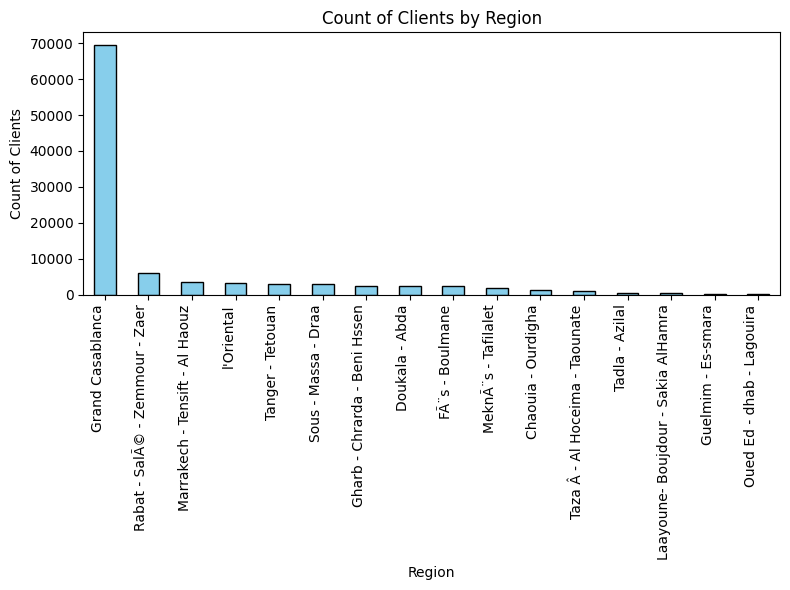

In [282]:
plt.figure(figsize=(8, 6))
Sorted_data.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Region')
plt.ylabel('Count of Clients')
plt.title('Count of Clients by Region')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [283]:
merged_df['REGION'].isna().sum()

19815

In [284]:


# Iterate through rows
for index, row in merged_df.iterrows():
    if pd.isnull(row['REGION']):
        city_to_search = row['CITY']
        corresponding_regions = merged_df.loc[merged_df['CITY'] == city_to_search, 'REGION'].dropna()
        if not corresponding_regions.empty:
            corresponding_region = corresponding_regions.iloc[0]
            merged_df.at[index, 'REGION'] = corresponding_region
        else:
            merged_df.at[index, 'REGION'] = 'UNKNOWN'



# ZIP IMPUTATION 

In [285]:
# Iterate through rows
for index, row in merged_df.iterrows():
    if pd.isnull(row['ZIP']):
        city_to_search = row['CITY']
        corresponding_zips = merged_df.loc[merged_df['CITY'] == city_to_search, 'ZIP'].dropna()
        if not corresponding_zips.empty:
            corresponding_zip = corresponding_zips.iloc[0]
            merged_df.at[index, 'ZIP'] = corresponding_zip
        else:
            merged_df.at[index, 'ZIP'] = 'UNKNOWN'


In [286]:
m=merged_df.isnull().sum()
m

CUSTNO                 0
NAMECLT                0
FIRSTNAME              0
ZIP                    0
CITY                   0
COUNTRY                0
PHONE                  0
DATECRE               20
CIVILITY               0
REGION                 0
GENDER                 0
IDFactMat              0
NomGroupe              0
NomSociete             0
NomSite                0
DateFact               0
NewOccas               0
IdPropr                0
famille_Vehi          16
Gam_Vehi              16
Mrq_Vehi               0
Model_Vehi             0
OrgFinanc          50384
Qte                    0
PRIXTTC                0
TypeFinancement    32148
Couleur             8563
CIVILITY_GROUP         0
dtype: int64

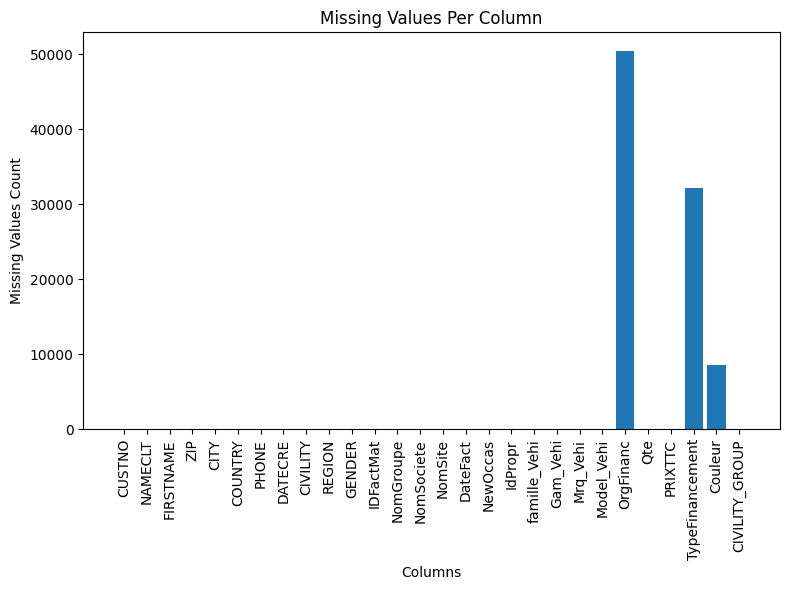

In [287]:
plt.figure(figsize=(8,6))
missVals=m
plt.bar(missVals.index,missVals.values)
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.title('Missing Values Per Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [288]:
merged_df.to_csv('C:/Users/israe/OneDrive/Desktop/stage/cleaned_data2.csv', index=False)
